# Data Mining 2021 Project - Group AD 

## Authors:
#### Débora Santos (m20200748), Diana Furtado (m20200590)
#### Group AD - DD Consulting Services
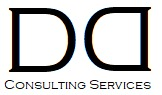

### Installing and import packages

Maybe it will be necessary install some 'special' packages to this notebook works. 

Please follow the next cells and check if it's necessary

In [1]:
#Install package pyreadstat to read files in bdat format
#!pip install pyreadstat

In [2]:
#Install package pandas profiling to the visualizations
#!pip install pandas-profiling

In [3]:
#IMPORT LIBRARIES
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder, RobustScaler
from itertools import product
from math import ceil
from scipy.cluster.hierarchy import dendrogram
%matplotlib inline
import pyreadstat

from pandas_profiling import ProfileReport
%config InlineBackend.figure_format = 'retina'
from scipy.stats import iqr as IQR
from collections import Counter
from sklearn.base import clone
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score

#import phik
import matplotlib.cm as cm
from sklearn.manifold import TSNE

#outliers detection
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier
from os.path import join
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Seeting seaborn style
sns.set()

# Import data

In [4]:
# Read the sas7bdat file
insurance, meta = pyreadstat.read_sas7bdat('a2z_insurance.sas7bdat')
type(insurance)

pandas.core.frame.DataFrame

### Describe, explore and assess data quality

In [5]:
# First look at the dataframe
insurance.head()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,2 - High School,2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,2 - High School,677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,1 - Basic,2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,3 - BSc/MSc,1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,3 - BSc/MSc,1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [6]:
# Data types and null values verification
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10296 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [7]:
# Summary statistics for all variables
insurance.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustID,10296,NaN,NaN,NaN,5148.5,2972.34,1,2574.75,5148.5,7722.25,10296
FirstPolYear,10266,NaN,NaN,NaN,1991.06,511.268,1974,1980,1986,1992,53784
BirthYear,10279,NaN,NaN,NaN,1968.01,19.7095,1028,1953,1968,1983,2001
EducDeg,10296,5,3 - BSc/MSc,4799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthSal,10260,NaN,NaN,NaN,2506.67,1157.45,333,1706,2501.5,3290.25,55215
GeoLivArea,10295,NaN,NaN,NaN,2.70986,1.26629,1,1,3,4,4
Children,10275,NaN,NaN,NaN,0.706764,0.455268,0,0,1,1,1
CustMonVal,10296,NaN,NaN,NaN,177.893,1945.81,-165680,-9.44,186.87,399.778,11875.9
ClaimsRate,10296,NaN,NaN,NaN,0.742772,2.91696,0,0.39,0.72,0.98,256.2
PremMotor,10262,NaN,NaN,NaN,300.47,211.915,-4.11,190.59,298.61,408.3,11604.4


In [8]:
# Replace possible empty values with NaN
insurance.replace("", np.nan, inplace=True)

# Function to show missing values and their percentages
def missing_data(df):
    l = []
    for col in df.columns:
        missing = df[col].isnull().sum(axis=0)
        percentage = missing/df.shape[0]
        l.append([col,missing,percentage*100])
        df_missing = pd.DataFrame(l, columns = ['Feature','missing','percentage'])
        df_missing = df_missing.sort_values('missing',axis=0, ascending = False)    
    return df_missing

# Check the percentage of missing values
insurance_missing = missing_data(insurance)
insurance_missing = insurance_missing[insurance_missing['missing']>0]
insurance_missing

,Feature,missing,percentage
12,PremLife,104,1.010101
13,PremWork,86,0.835276
11,PremHealth,43,0.417638
4,MonthSal,36,0.349650
9,PremMotor,34,0.330225
1,FirstPolYear,30,0.291375
6,Children,21,0.203963
2,BirthYear,17,0.165113
3,EducDeg,17,0.165113
5,GeoLivArea,1,0.009713


In [9]:
# Check duplicated observations
insurance.loc[insurance.duplicated(keep=False), :]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork


In [10]:
# Define non-metric features
non_metric_features = ['EducDeg', 'GeoLivArea', 'Children']

# Make a copy of the dataframe
df = insurance.copy()

# Define metric features
metric_features = df.columns.drop(non_metric_features).to_list()

### Visualization/Correlations

In [11]:
#PANDAS PROFILING.
profile = ProfileReport(df, minimal=True)
profile.to_file("output.html")

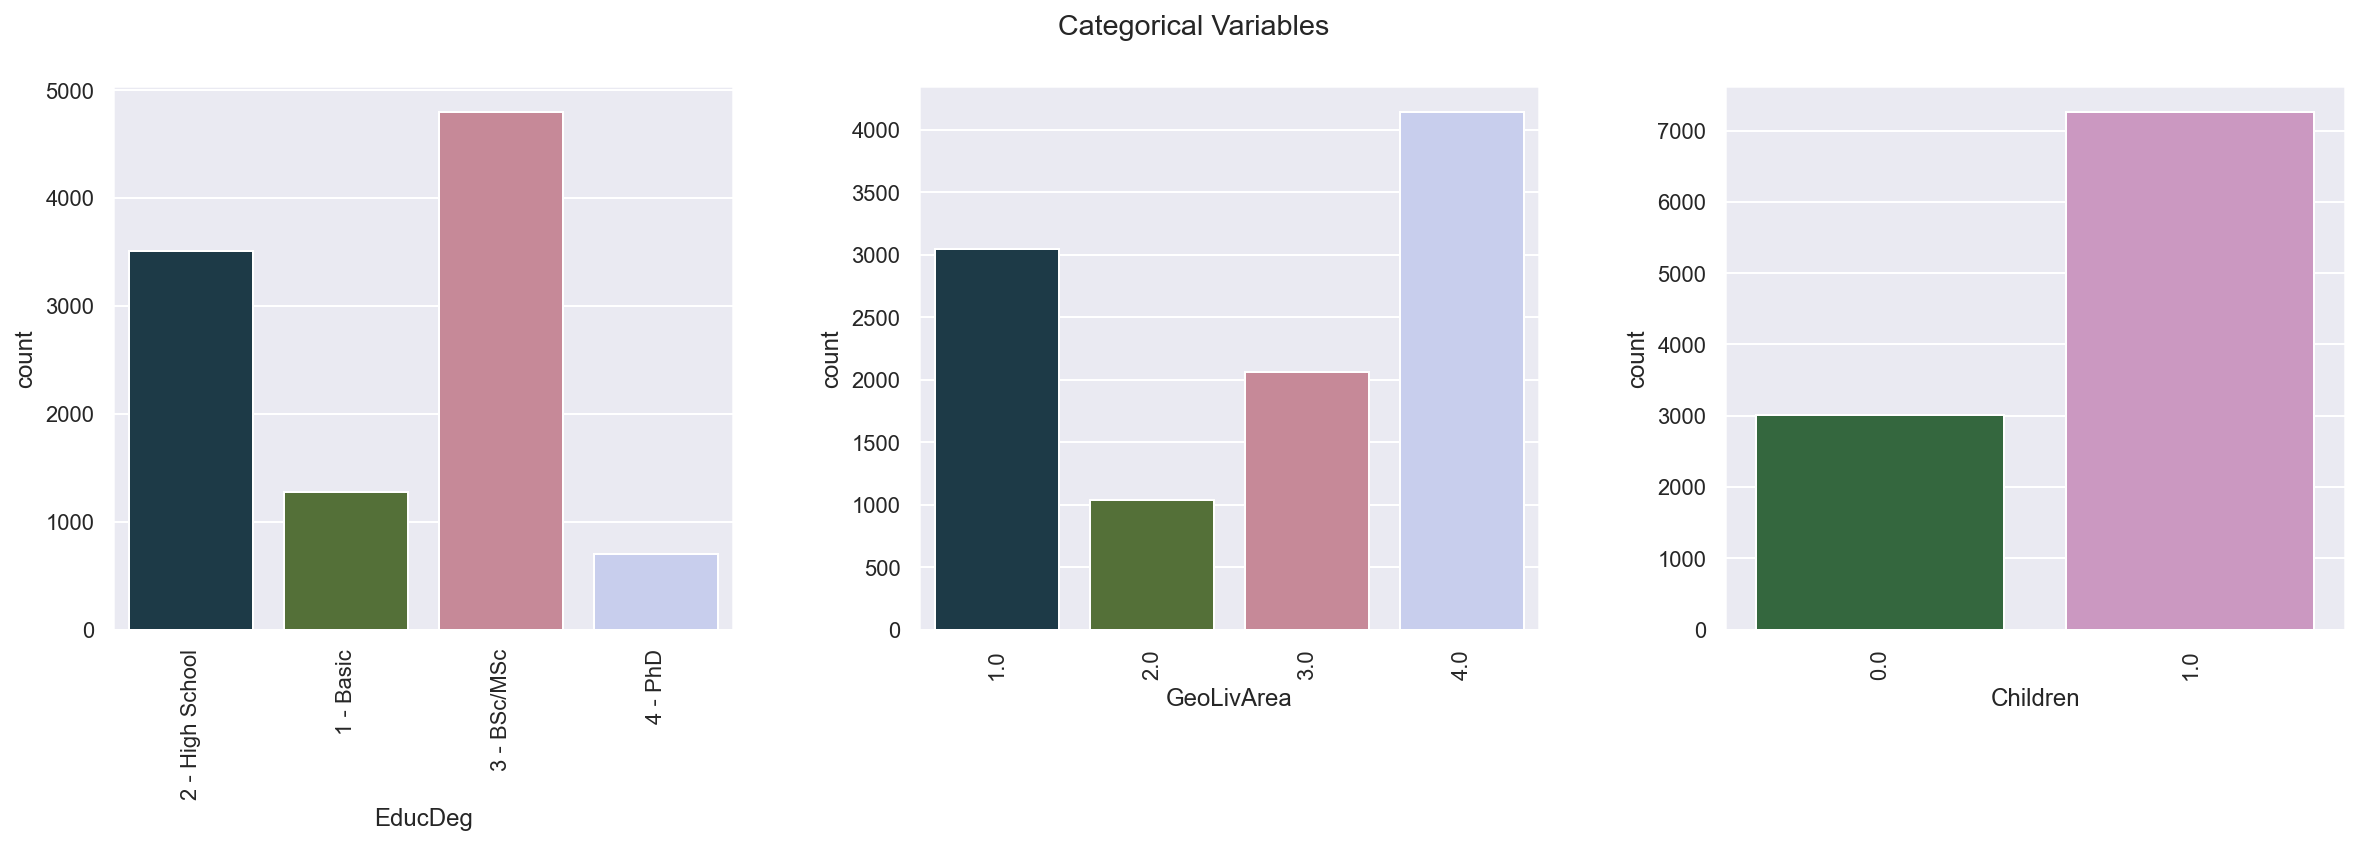

In [12]:
# Absolute frequencies for the non-metric features
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(1, ceil(len(non_metric_features) / 1), figsize=(20, 5))

# Plot data
# Iterate across axes objects and associate each bar plot
for ax, feat in zip(axes.flatten(), non_metric_features):
    g = sns.countplot(df[feat], ax=ax, palette = 'cubehelix')
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

# Layout
# Add a centered title to the figure:
title = "Categorical Variables"
plt.suptitle(title)

#Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

#Show plot

plt.show()

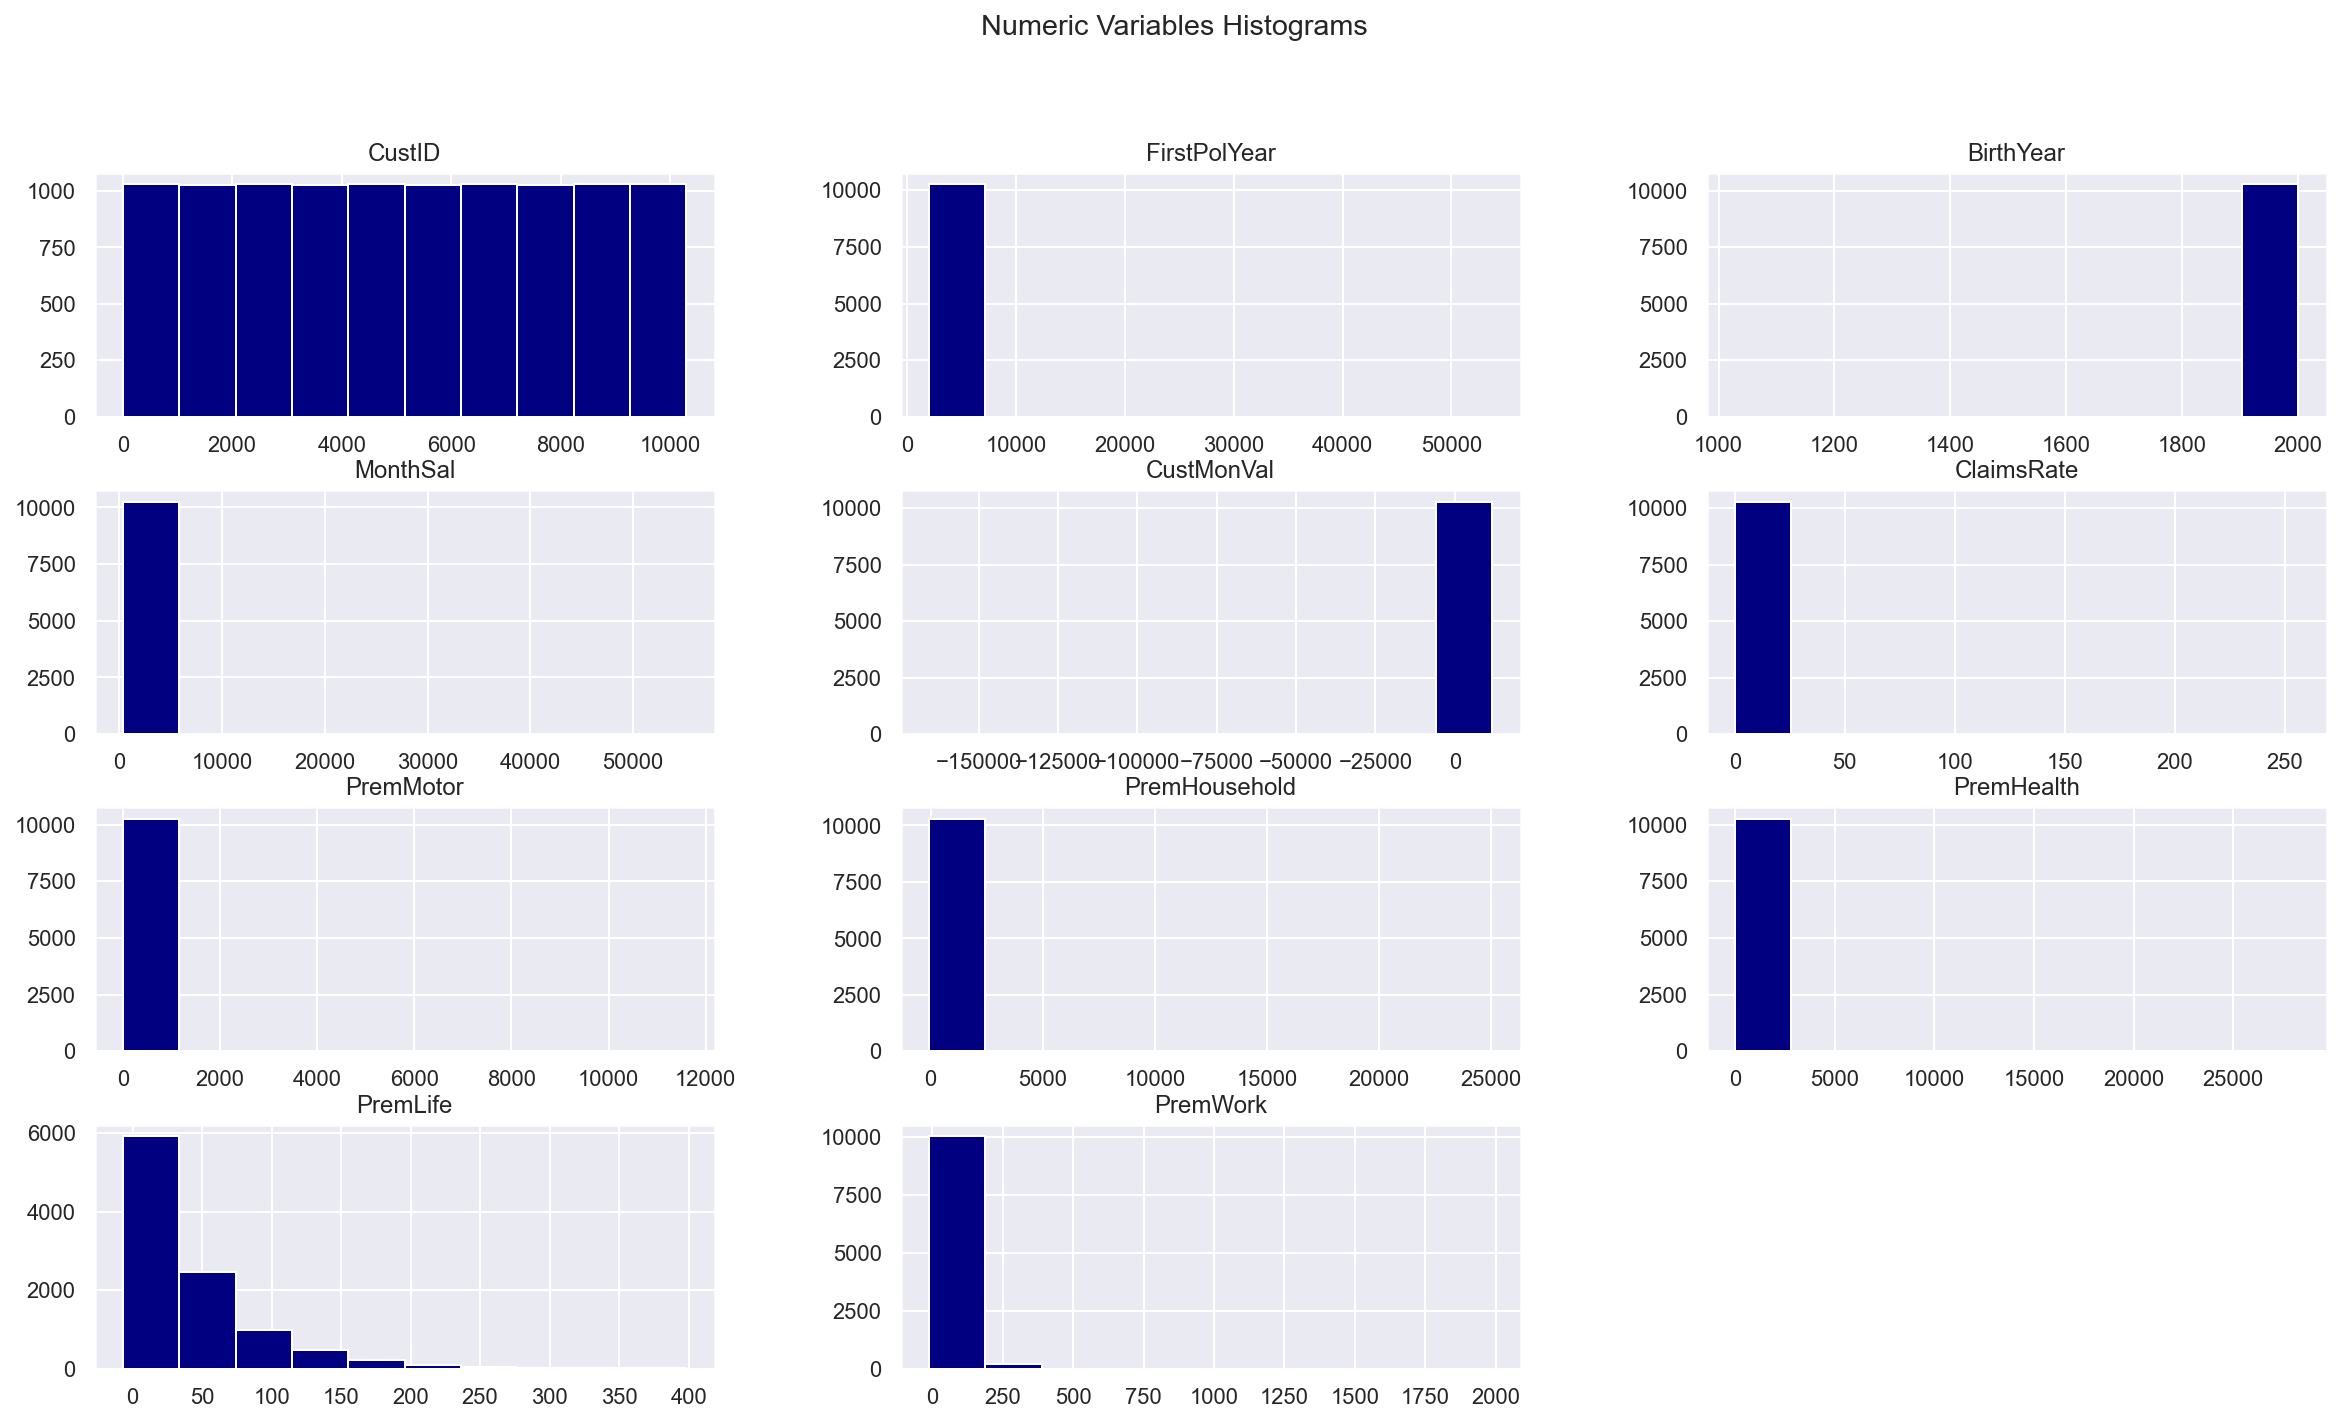

In [13]:
# Histograms for the metric features
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(4, ceil(len(metric_features) / 4), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(df[feat], color = "Navy")
    ax.set_title(feat)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables Histograms"
plt.suptitle(title)

#Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Remove the last plot
axes.flatten()[-1].remove()

#Show Plot
plt.show()

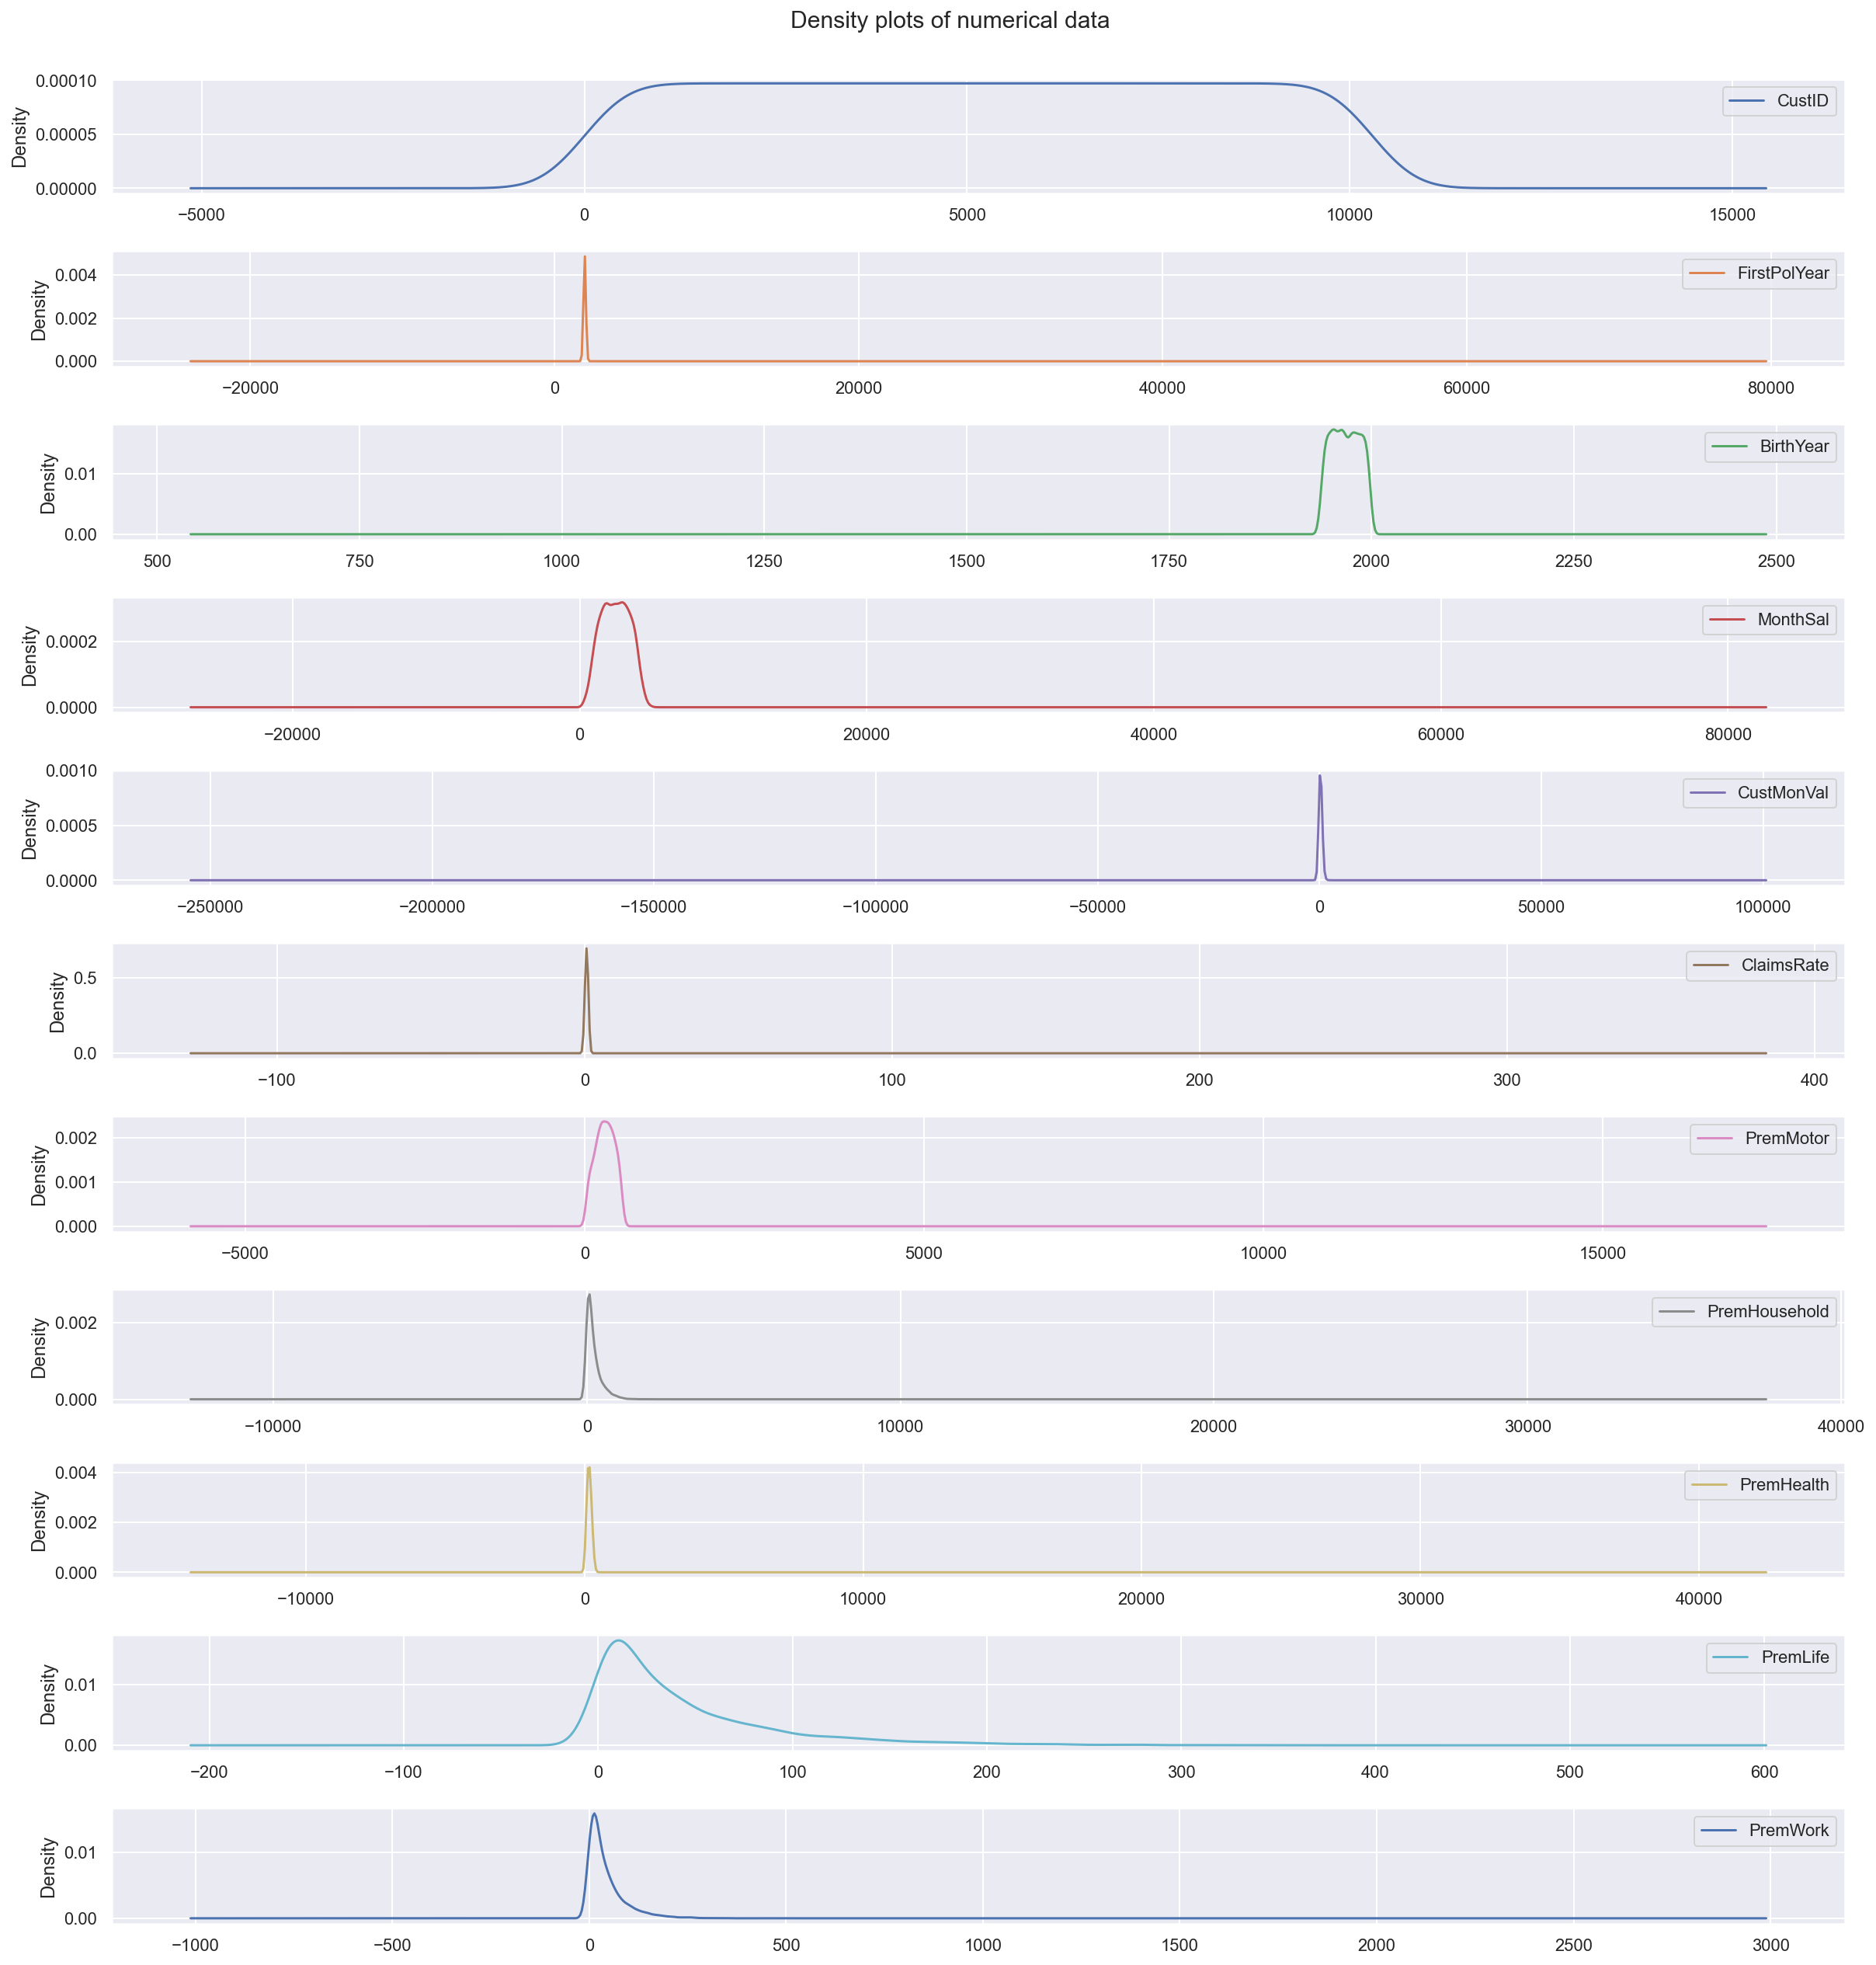

In [14]:
# Density plots for the metric features
sns.set()

# set desity plot and layout
df[metric_features].plot(kind='density', subplots=True, figsize=(20,20),sharex=False)
plt.subplots_adjust(top=0.95)

# Layout
# Add a centered title to the figure:

plt.suptitle("Density plots of numerical data", fontsize=15)

#Adjust the space between plots
plt.subplots_adjust(hspace=0.5)

#Show Plot
plt.show()

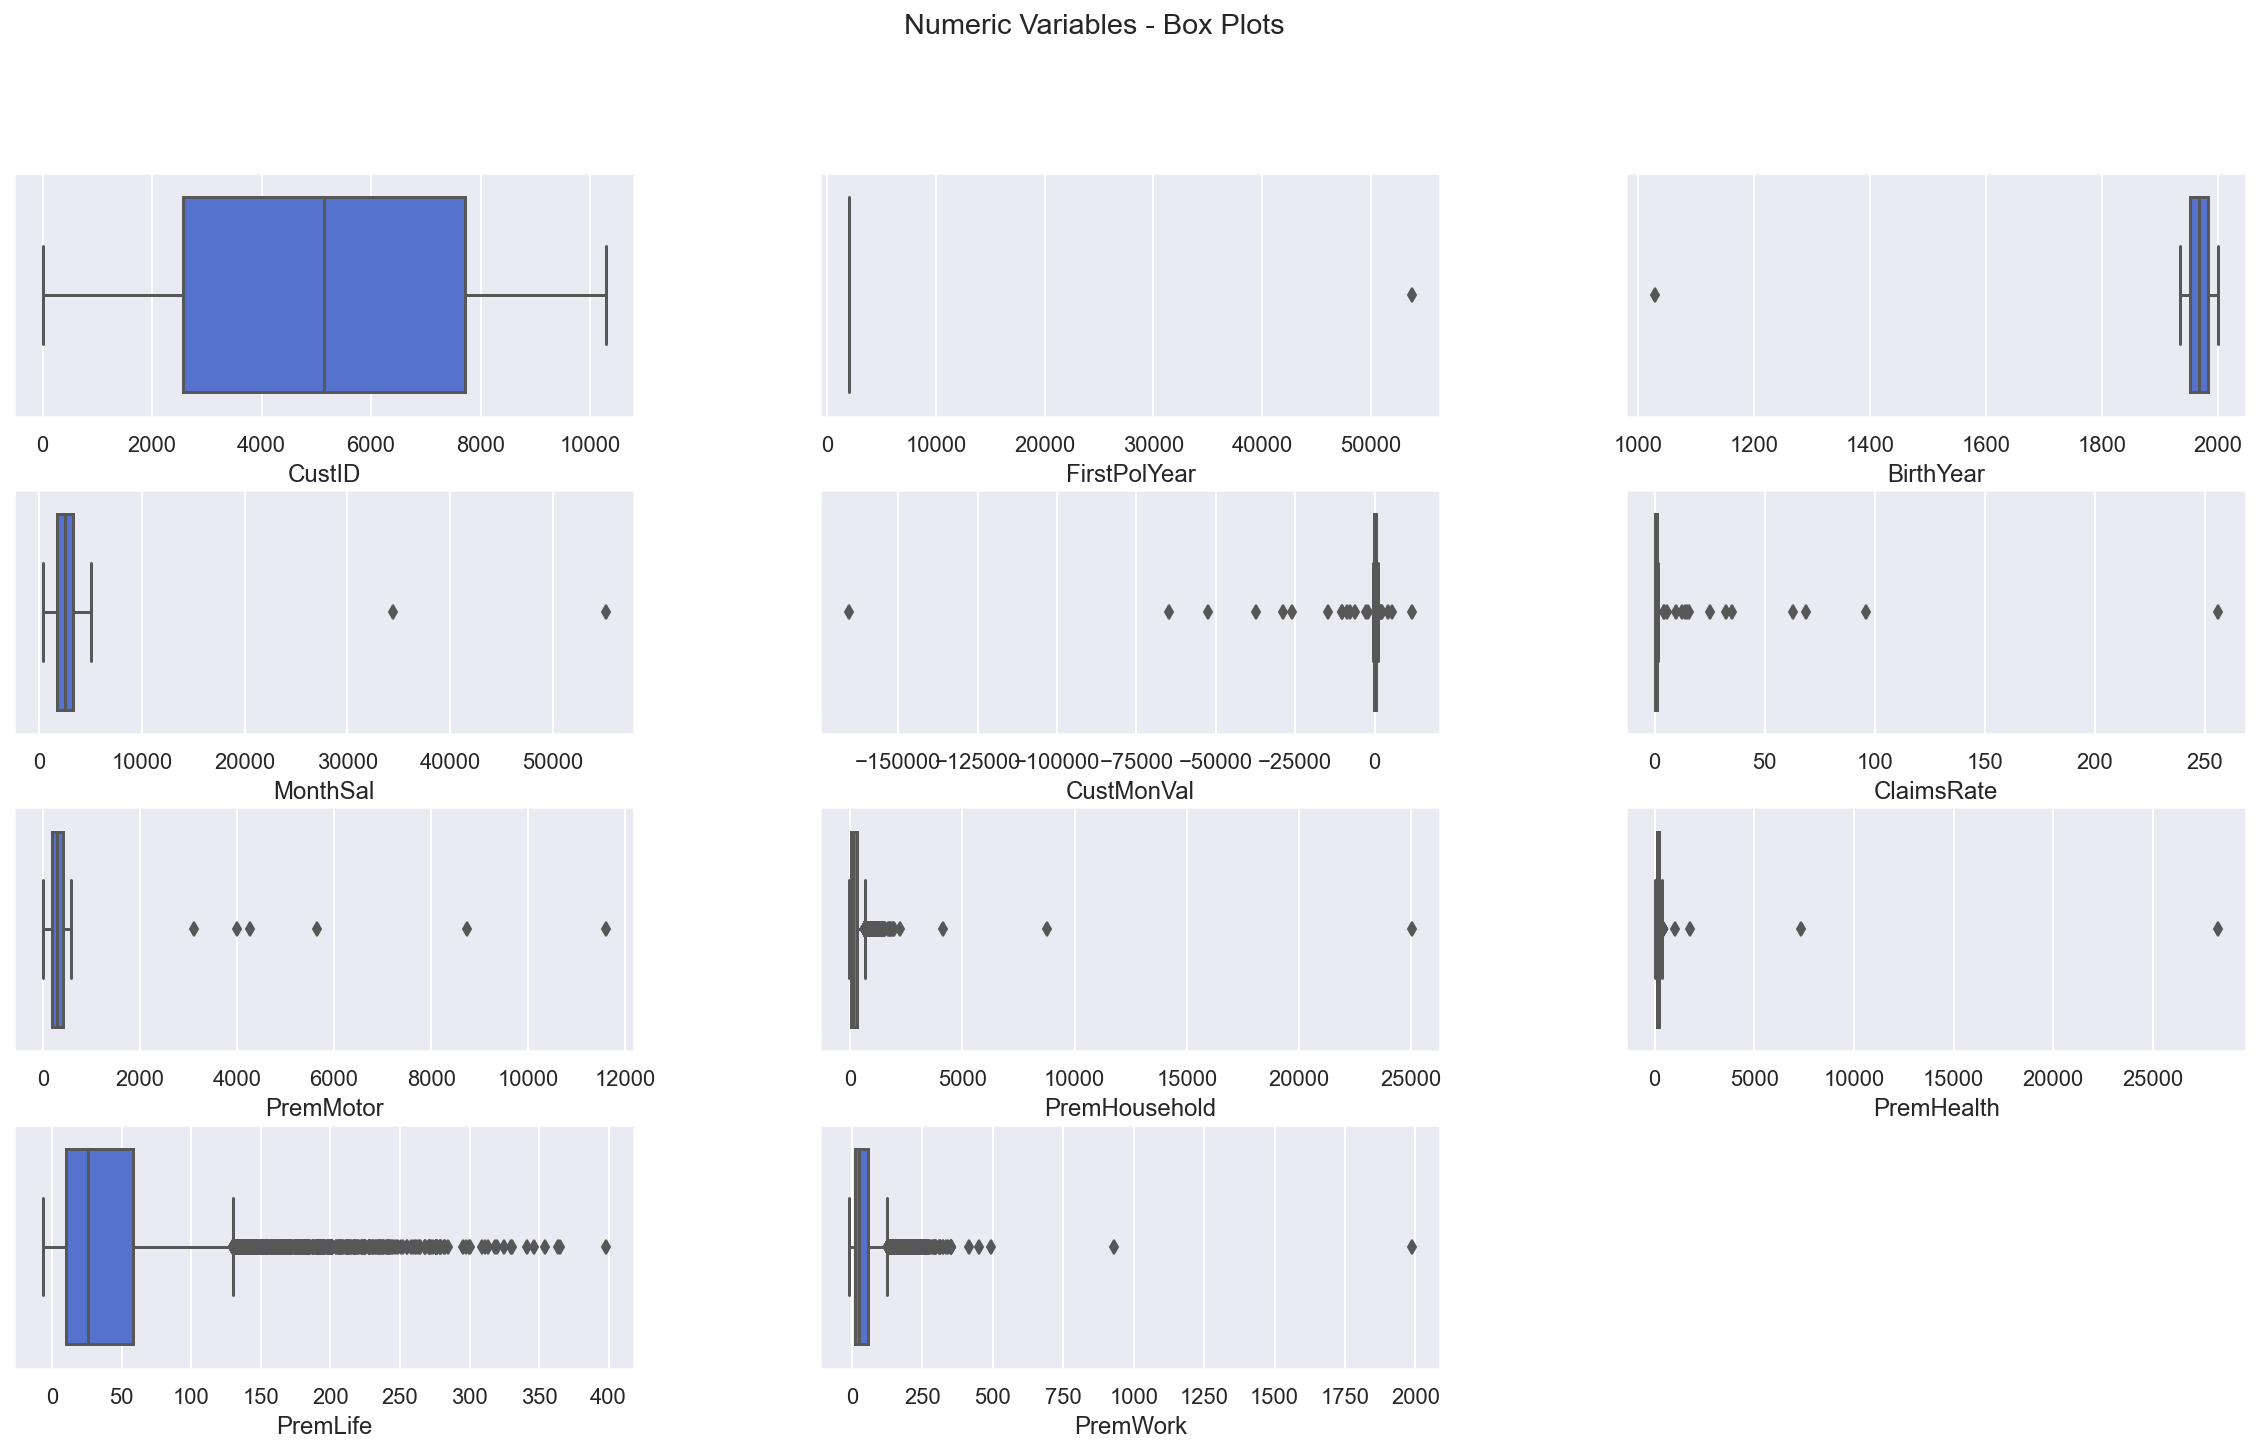

In [15]:
# Boxplots for the metric features
sns.set()

# Prepare figure and create individual axes where each box plot will be placed
fig, axes = plt.subplots(4, ceil(len(metric_features) /4), figsize=(20, 11))

# Plot the data
# Iterate across axes objects and associate each box plot
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(df[feat], ax=ax,color="royalblue")
    
# Layout
# Add a centered title to the figure
title = "Numeric Variables - Box Plots"
plt.suptitle(title)

# Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Remove the last plot
axes.flatten()[-1].remove()

# Show plots
plt.show()

## Data Preparation:

In [16]:
df=df.set_index('CustID')

In [17]:
# Drop categorical features
#To run the clustering solutions, we need only numerical features.
df.drop({"EducDeg","GeoLivArea","Children"},axis=1,inplace=True)
df

,FirstPolYear,BirthYear,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,
1.0,1985.0,1982.0,2177.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2.0,1981.0,1995.0,677.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3.0,1991.0,1970.0,2277.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4.0,1990.0,1981.0,1099.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5.0,1986.0,1973.0,1763.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...
10292.0,1984.0,1949.0,3188.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10293.0,1977.0,1952.0,2431.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10294.0,1994.0,1976.0,2918.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89


### Feature Engineering

<li>Client Seniority</li><li>Client Age</li></ul><br/><i>Reference Year: 2016</i>

In [18]:
#Calculate new columns
df['Seniority']=2016-df['FirstPolYear']
df['Age']=2016-df['BirthYear']
#Drop original data
df.drop({"FirstPolYear","BirthYear"},axis=1,inplace=True)
#Sort Columns
cols = df.columns.tolist()
cols = cols[-2:] + cols[:-2]
df=df[cols]

In [19]:
df.head()

,Seniority,Age,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,
1.0,31.0,34.0,2177.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2.0,35.0,21.0,677.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3.0,25.0,46.0,2277.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4.0,26.0,35.0,1099.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5.0,30.0,43.0,1763.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [20]:
# Remove columns with low variance -> feature is approximately constant and will not improve the performance of the model 
# Features with variance lower to 10% will be removed

# Select features with variance higher then 10%
keep_variance_features = df.columns[df.var() > 0.1]

# Features with low variance
low_variance_features = list(set(keep_variance_features) ^set(df.columns))
print("the features variance lower than 10% are:")
print(low_variance_features)

# Check result
df[keep_variance_features]

the features variance lower than 10% are:
[]


,Seniority,Age,MonthSal,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,
1.0,31.0,34.0,2177.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2.0,35.0,21.0,677.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3.0,25.0,46.0,2277.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4.0,26.0,35.0,1099.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5.0,30.0,43.0,1763.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...
10292.0,32.0,67.0,3188.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10293.0,39.0,64.0,2431.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10294.0,22.0,40.0,2918.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89


### Correlation

#### In order to perform clustering is useless and harmful to keep variables that are either highly or lowly correlated with each other. In the first case because it leads to redudancy of the data, the second because lowly correlated columns will have tha same value among all the clusters and give no information to our cluster analysis.

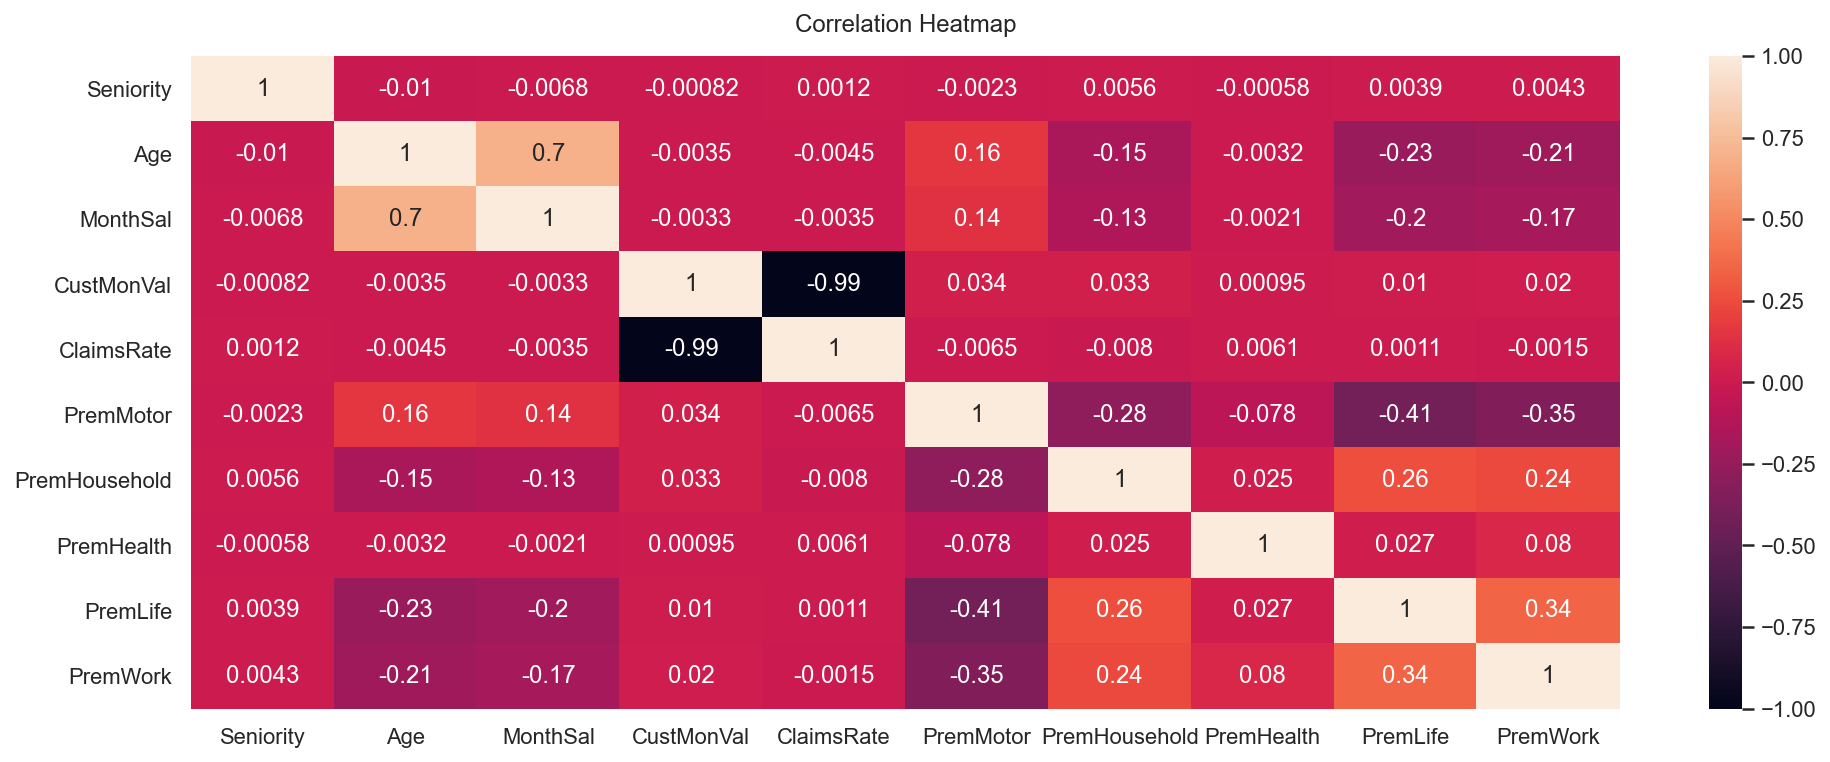

In [21]:
# Pearson correlation heatmap (numeric features) 
plt.figure(figsize=(16, 6))
corr = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
corr.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [22]:
# Droping the variables with high correlation
df.drop(['ClaimsRate'], axis=1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10296 entries, 1.0 to 10296.0
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Seniority      10266 non-null  float64
 1   Age            10279 non-null  float64
 2   MonthSal       10260 non-null  float64
 3   CustMonVal     10296 non-null  float64
 4   PremMotor      10262 non-null  float64
 5   PremHousehold  10296 non-null  float64
 6   PremHealth     10253 non-null  float64
 7   PremLife       10192 non-null  float64
 8   PremWork       10210 non-null  float64
dtypes: float64(9)
memory usage: 804.4 KB


In [24]:
#re-define non_metric and metric due to drop columns
metric_features = df.columns

### Dealing with Outliers

#### Fill missing values with median momentarily

In [25]:
df_no_nan = df[metric_features].fillna(df[metric_features].median()).copy()

In [26]:
df_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10296 entries, 1.0 to 10296.0
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Seniority      10296 non-null  float64
 1   Age            10296 non-null  float64
 2   MonthSal       10296 non-null  float64
 3   CustMonVal     10296 non-null  float64
 4   PremMotor      10296 non-null  float64
 5   PremHousehold  10296 non-null  float64
 6   PremHealth     10296 non-null  float64
 7   PremLife       10296 non-null  float64
 8   PremWork       10296 non-null  float64
dtypes: float64(9)
memory usage: 804.4 KB


In [27]:
#Standardize the data to run the outliers methods
#Select data
df_out = df_no_nan.copy()
# Create a StandardScaler
scale = StandardScaler()
# Fit and Transform data by applying the scale obtained in the previous command
scale_feat= scale.fit_transform(df_out[metric_features])
#Applying the transformation in the dataset
df_out[metric_features]=scale_feat
#Check the results
df_out.head()

,Seniority,Age,MonthSal,CustMonVal,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,
1.0,0.011847,-0.710545,-0.285319,0.104371,0.356343,-0.371495,-0.085147,0.112530,-0.472709
2.0,0.019683,-1.370704,-1.583607,-0.158822,-1.054121,0.583611,-0.185461,3.232531,1.266349
3.0,0.000094,-0.101168,-0.198767,0.167947,-0.445815,0.039903,-0.158785,0.944840,1.127793
4.0,0.002053,-0.659764,-1.218355,-0.100160,-0.557701,-0.473883,0.472072,-0.134371,-0.249578
5.0,0.009888,-0.253513,-0.643647,-0.073321,0.180360,-0.461262,0.037346,-0.484729,0.005902


In [28]:
#Check the statistics summary to check it worked
df_out.describe().apply(lambda s: s.apply(lambda x:format(x,'g')))

,Seniority,Age,MonthSal,CustMonVal,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
count,10296,10296,10296,10296,10296,10296,10296,10296,10296
mean,1.3027e-17,-9.03728e-17,1.06105e-17,-1.26739e-16,3.20364e-17,1.10807e-16,4.23046e-17,7.23111e-17,2.29981e-16
std,1.00005,1.00005,1.00005,1.00005,1.00005,1.00005,1.00005,1.00005,1.00005
min,-101.456,-1.67539,-1.88135,-85.2428,-1.4397,-0.809553,-0.587121,-1.03015,-1.0357
25%,-0.00186508,-0.761327,-0.690818,-0.0962795,-0.515808,-0.456582,-0.201622,-0.672813,-0.591778
50%,0.00988816,0.000394572,-0.00445658,0.00461393,-0.00876421,-0.220181,-0.0295301,-0.341285,-0.30161
75%,0.0216414,0.762116,0.677144,0.114038,0.506044,0.225818,0.160303,0.324098,0.289639
max,0.0333946,47.7349,45.6204,6.01218,53.4328,70.4477,95.007,7.54472,37.9528


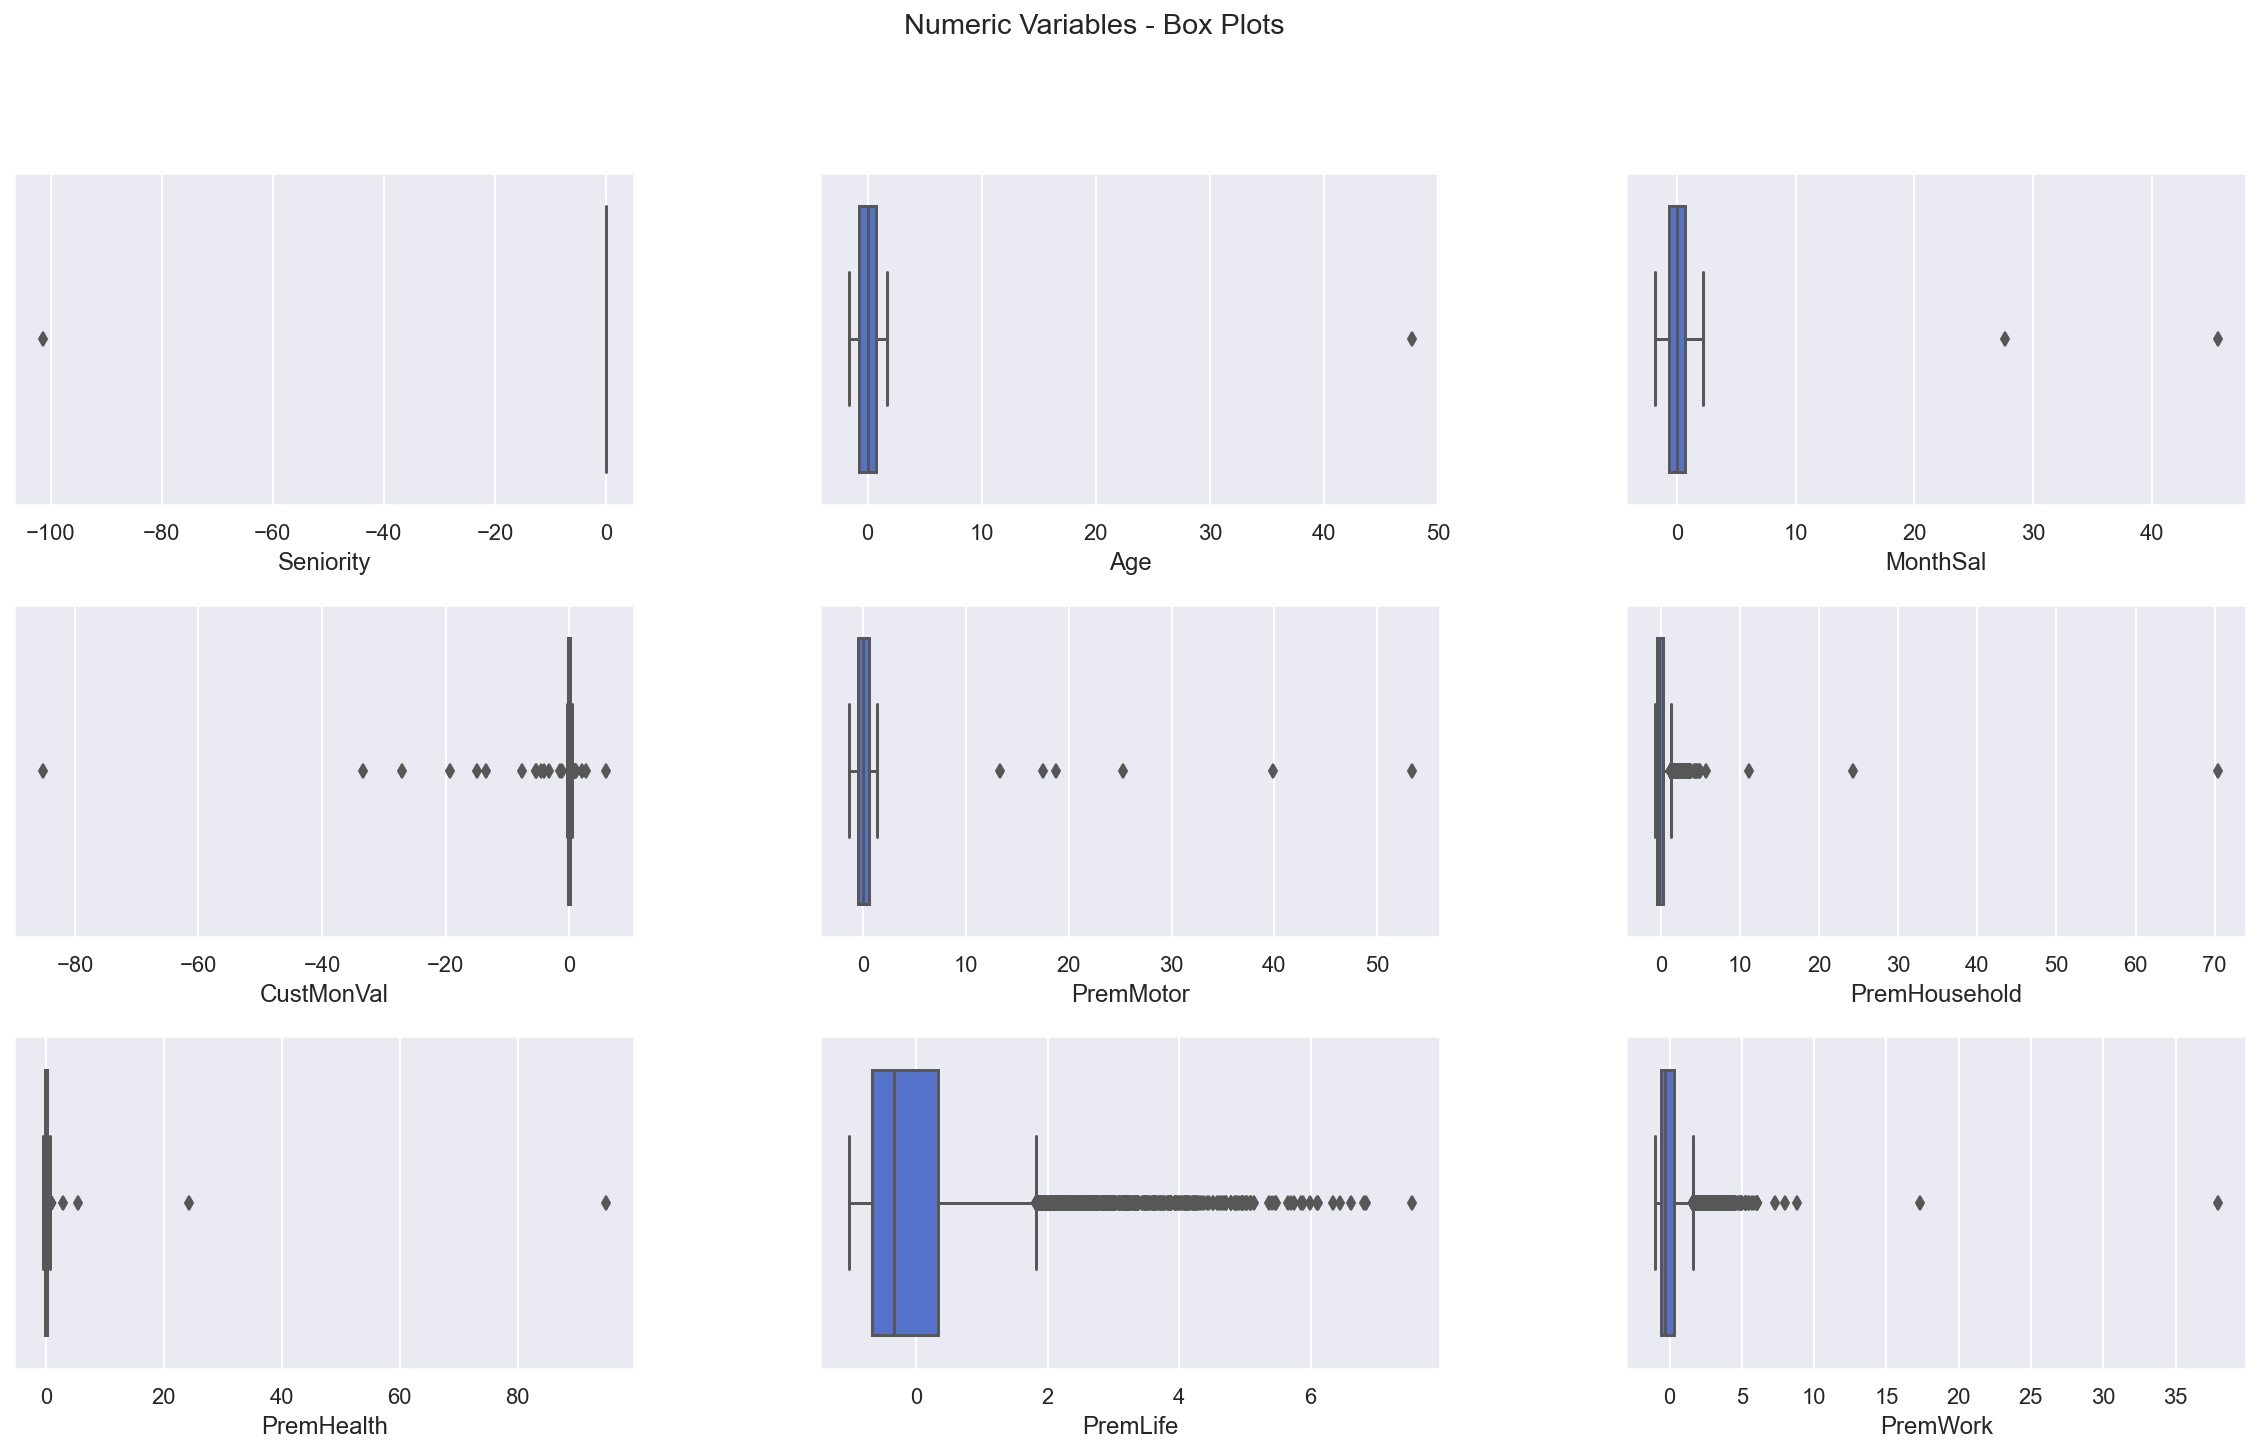

In [29]:
# Boxplots for the metric features
sns.set()

# Prepare figure and create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) /3), figsize=(20, 11))

# Plot the data
# Iterate across axes objects and associate each box plot
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(df_out[feat], ax=ax,color="royalblue")
    
# Layout
# Add a centered title to the figure
title = "Numeric Variables - Box Plots"
plt.suptitle(title)

# Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)


# Show plots
plt.show()

#### 5 methods were used to recognize outliers:

In [30]:
#1) Zscore that checks how many standard deviations is a datapoint distant from the mean;
def out_zscore(df, threshold = 3.0):
    z = pd.DataFrame(np.abs(stats.zscore(df)), columns = df.columns, index = df.index)
    z = pd.DataFrame(z > threshold)
    return z.any(axis = 1).astype(int)

In [31]:
#2) InterQuantile Range method that creates boundaries using the first and third quantile and the interquantile range;
def out_iqr(df, multiplier = 1.5):
    q75 = df.quantile(0.75, axis = 0)
    q25 = df.quantile(0.25, axis = 0)
    iqr = q75 - q25
    lower_bound = q25 - multiplier*iqr
    upper_bound = q75 + multiplier*iqr
    return df.apply(lambda x: np.any((x<lower_bound) | (x>upper_bound)), 1).astype(int)

In [32]:
#3) Local Outlier Factor (LOF) is a function that detects outliers by comparing the density of the neighborhood of a point 
#to the ones of its neighbors.
lof = LocalOutlierFactor(contamination = 'auto',metric = 'euclidean',n_neighbors=1)
lof_out = pd.Series(lof.fit_predict(df_out), index = df_out.index)
lof_out.value_counts(normalize = True)

 1    0.895493
-1    0.104507
dtype: float64

#### 4) At the basis of the Isolation Forest algorithm there is the tendency of anomalous instances in a dataset to be easier to separate from the rest of the sample (isolate), compared to normal points. In order to isolate a data point the algorithm recursively generates partitions on the sample by randomly selecting an attribute and then randomly selecting a split value for the attribute, between the minimum and maximum values allowed for that attribute. When all the trees are grown outliers are identified as points easier to isolate, therefore with a smaller path lenght in the tree, being closer to the root.

In [33]:
isolation_forest = IsolationForest(random_state = 7, contamination=  "auto")
isolation_forest.fit(df_out) #same results with scaled
isofor_outliers = pd.Series(isolation_forest.predict(df_out), index = df_out.index)
isofor_outliers.value_counts(normalize = True)

 1    0.841589
-1    0.158411
dtype: float64

#### 5) One-Class SVM is similar to support vector machine, but instead of using a hyperplane to separate two classes of instances, it uses a hypersphere to encompass all of the instances. The algorithm will try to find the smallest possible hypersphere and point outside of it will be considered outliers. One bad thing of this algorithm is that you have to set in advance the percentage of points that you think are outliers, in this case I use the one retrieved from LOF.

In [34]:
outliers_fraction =   0.11
auto_detection = svm.OneClassSVM(kernel='rbf', gamma=0.01, degree=3, nu=outliers_fraction)
auto_detection.fit(df_out)
svm_outliers = pd.Series(auto_detection.predict(df_out), index = df_out.index)
svm_outliers.value_counts(normalize = True)

 1    0.890054
-1    0.109946
dtype: float64

In [35]:
#Including columns with the results of each method in the dataset to compare the different methods and also combine them.
df_out['zscore'] = out_zscore(df_out)

df_out['iqr'] = out_iqr(df_out, multiplier = 1.5)

df_out['lof_out'] = [0 for i in range(len(df_out))]
df_out.loc[lof_out[lof_out == -1].index, 'lof_out'] = 1

df_out['isofor_out'] = [0 for i in range(len(df_out))]
df_out.loc[isofor_outliers[isofor_outliers == -1].index, 'isofor_out'] = 1

df_out['svm_out'] = [0 for i in range(len(df_out))]
df_out.loc[svm_outliers[svm_outliers == -1].index, 'svm_out'] = 1

df_out['sum_out']  = df_out[['zscore','iqr','svm_out','lof_out','isofor_out']].apply(lambda x: sum(x), axis = 1)

In [36]:
#Create a dataset for see the outliers detect by each model
outliers = df_out[['zscore','iqr','svm_out','lof_out','isofor_out']]
outliers.groupby(['zscore','iqr','svm_out','lof_out','isofor_out'])\
            .size()\
            .to_frame()

0
zscore iqr svm_out lof_out isofor_out      
0      0   0       0       0           7195
                           1            327
                   1       0            752
                           1             52
           1       0       0            308
                           1             78
                   1       0             55
                           1             21
       1   0       0       0            289
                           1            440
                   1       0             40
                           1             61
           1       0       0              2
                           1            220
                   1       0              1
                           1             38
1      1   0       0       0              2
                           1              5
                   1       1              1
           1       0       0             13
                           1            341
                   1       0              8
                           1             47

In [37]:
#Show the number of outliers detect by z-score individually
df_out['zscore'].value_counts()

0    9879
1     417
Name: zscore, dtype: int64

In [38]:
#Show the number of outliers detect by IQR individually
df_out['iqr'].value_counts()

0    8788
1    1508
Name: iqr, dtype: int64

In [39]:
#Show the number of outliers detect by combined methods. 
df_out['sum_out'].value_counts()

0    7195
1    1676
2     669
4     388
3     321
5      47
Name: sum_out, dtype: int64

In [40]:
#Chose the number 3 with the best possible solution of combined methods
df1_out = df.loc[df_out.query('sum_out >= 3').index]
df1 = df.drop(index = df_out.query('sum_out >= 3').index)

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 9540 entries, 1.0 to 10296.0
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Seniority      9510 non-null   float64
 1   Age            9525 non-null   float64
 2   MonthSal       9505 non-null   float64
 3   CustMonVal     9540 non-null   float64
 4   PremMotor      9507 non-null   float64
 5   PremHousehold  9540 non-null   float64
 6   PremHealth     9499 non-null   float64
 7   PremLife       9440 non-null   float64
 8   PremWork       9456 non-null   float64
dtypes: float64(9)
memory usage: 745.3 KB


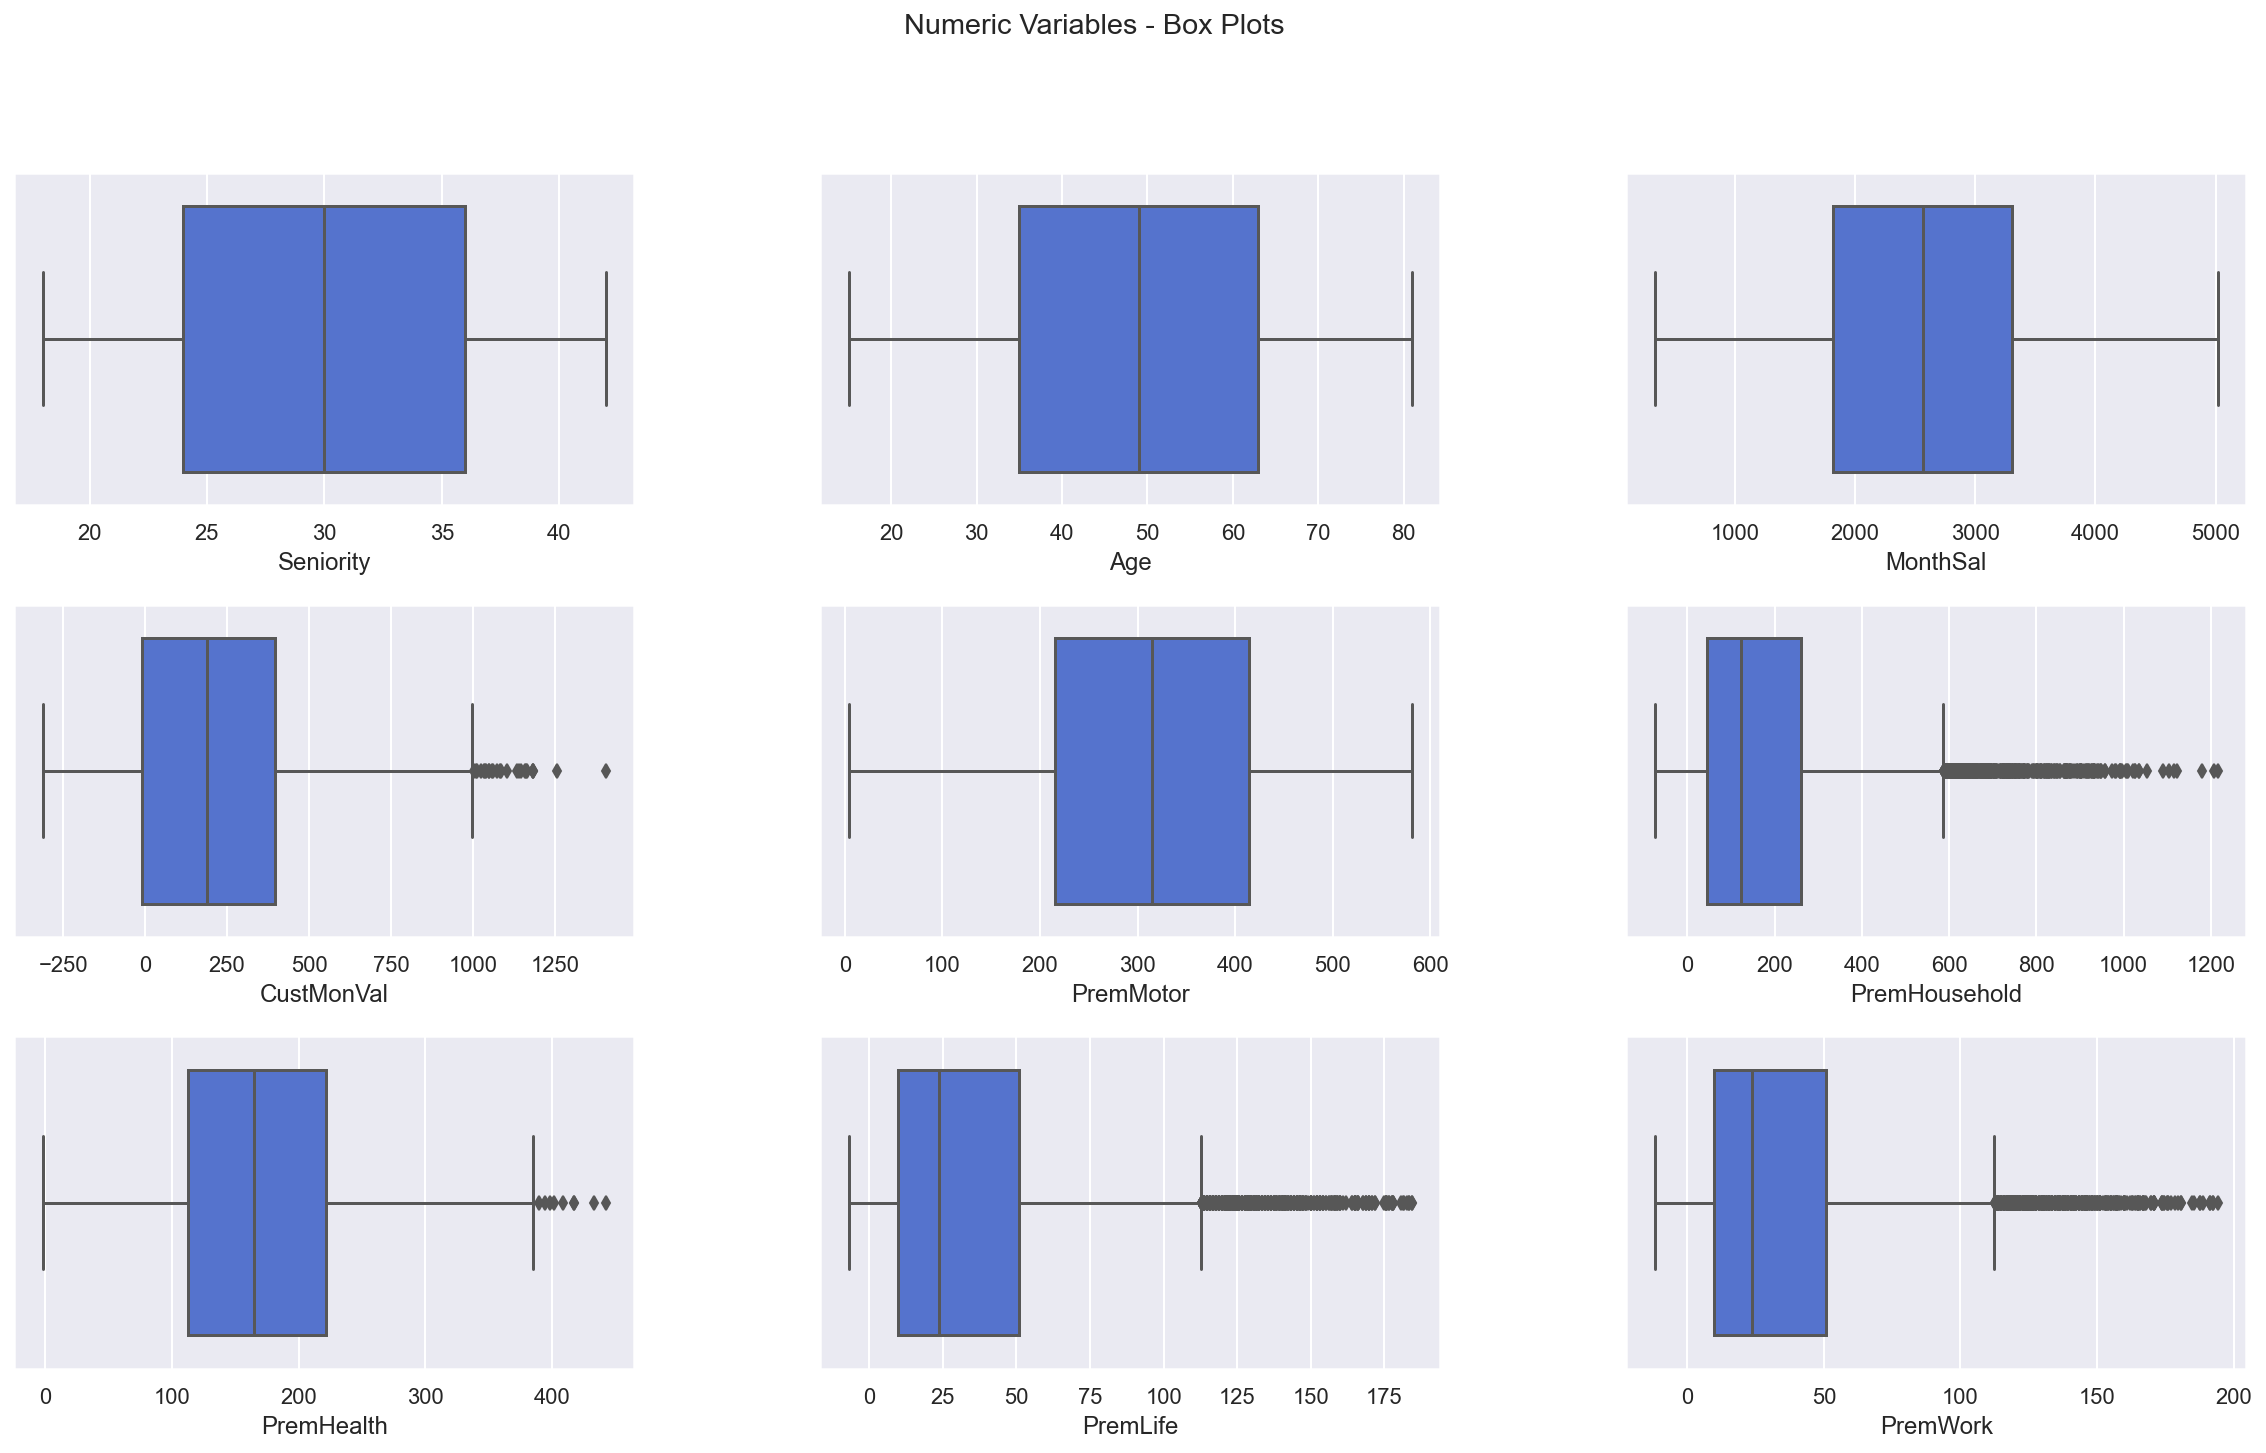

In [42]:
#Check boxplots after outliers removal
# Box plots for the metric features
sns.set()

# Prepare figure and create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) /3), figsize=(20, 11))

# Plot the data
# Iterate across axes objects and associate each box plot
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(df1[feat], ax=ax,color="royalblue")
    
# Layout
# Add a centered title to the figure
title = "Numeric Variables - Box Plots"

plt.suptitle(title)

# Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show plots
plt.show()

In [43]:
#Chose the number 4 with the best possible solution of combined methods
df2_out = df.loc[df_out.query('sum_out == 4').index]
df2 = df.drop(index = df_out.query('sum_out == 4').index)

In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 9908 entries, 1.0 to 10296.0
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Seniority      9878 non-null   float64
 1   Age            9891 non-null   float64
 2   MonthSal       9872 non-null   float64
 3   CustMonVal     9908 non-null   float64
 4   PremMotor      9875 non-null   float64
 5   PremHousehold  9908 non-null   float64
 6   PremHealth     9865 non-null   float64
 7   PremLife       9805 non-null   float64
 8   PremWork       9822 non-null   float64
dtypes: float64(9)
memory usage: 774.1 KB


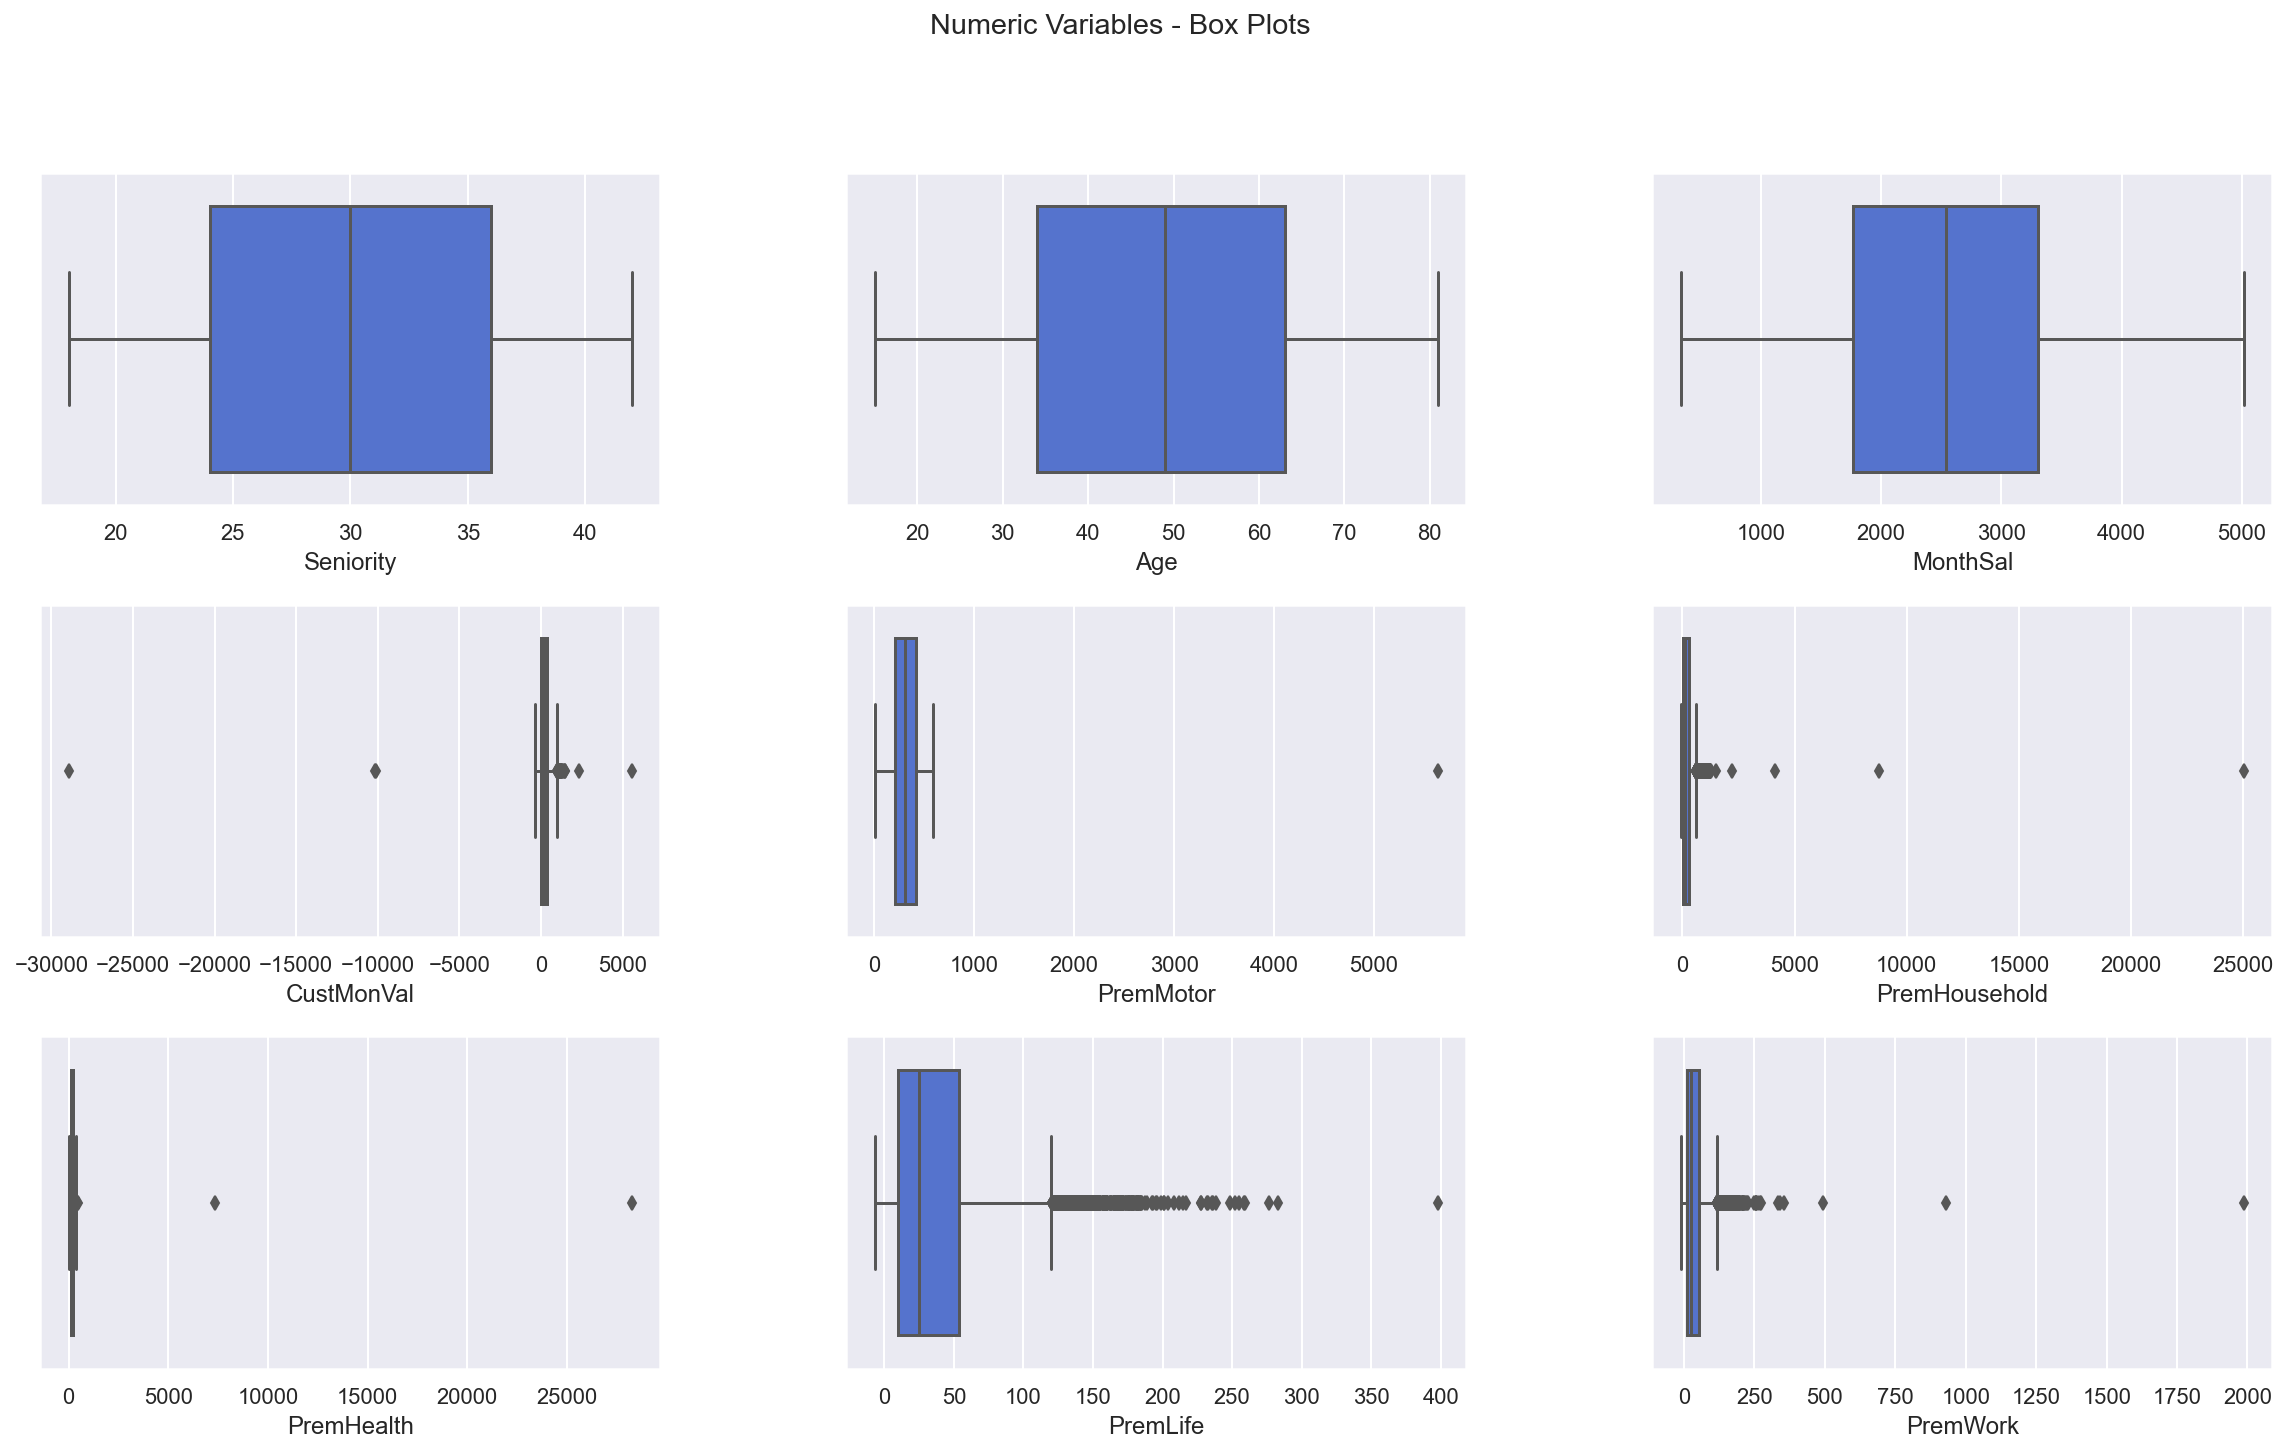

In [45]:
#Check boxplots after outliers removal
# Box plots for the metric features
sns.set()

# Prepare figure and create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) /3), figsize=(20, 11))

# Plot the data
# Iterate across axes objects and associate each box plot
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(df2[feat], ax=ax,color="royalblue")
    
# Layout
# Add a centered title to the figure
title = "Numeric Variables - Box Plots"

plt.suptitle(title)

# Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show plots
plt.show()

In [46]:
#Chose the number 5 with the best possible solution of combined methods
df3_out = df.loc[df_out.query('sum_out == 5').index]
df3 = df.drop(index = df_out.query('sum_out == 5').index)

In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10249 entries, 1.0 to 10296.0
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Seniority      10219 non-null  float64
 1   Age            10232 non-null  float64
 2   MonthSal       10213 non-null  float64
 3   CustMonVal     10249 non-null  float64
 4   PremMotor      10215 non-null  float64
 5   PremHousehold  10249 non-null  float64
 6   PremHealth     10206 non-null  float64
 7   PremLife       10145 non-null  float64
 8   PremWork       10163 non-null  float64
dtypes: float64(9)
memory usage: 800.7 KB


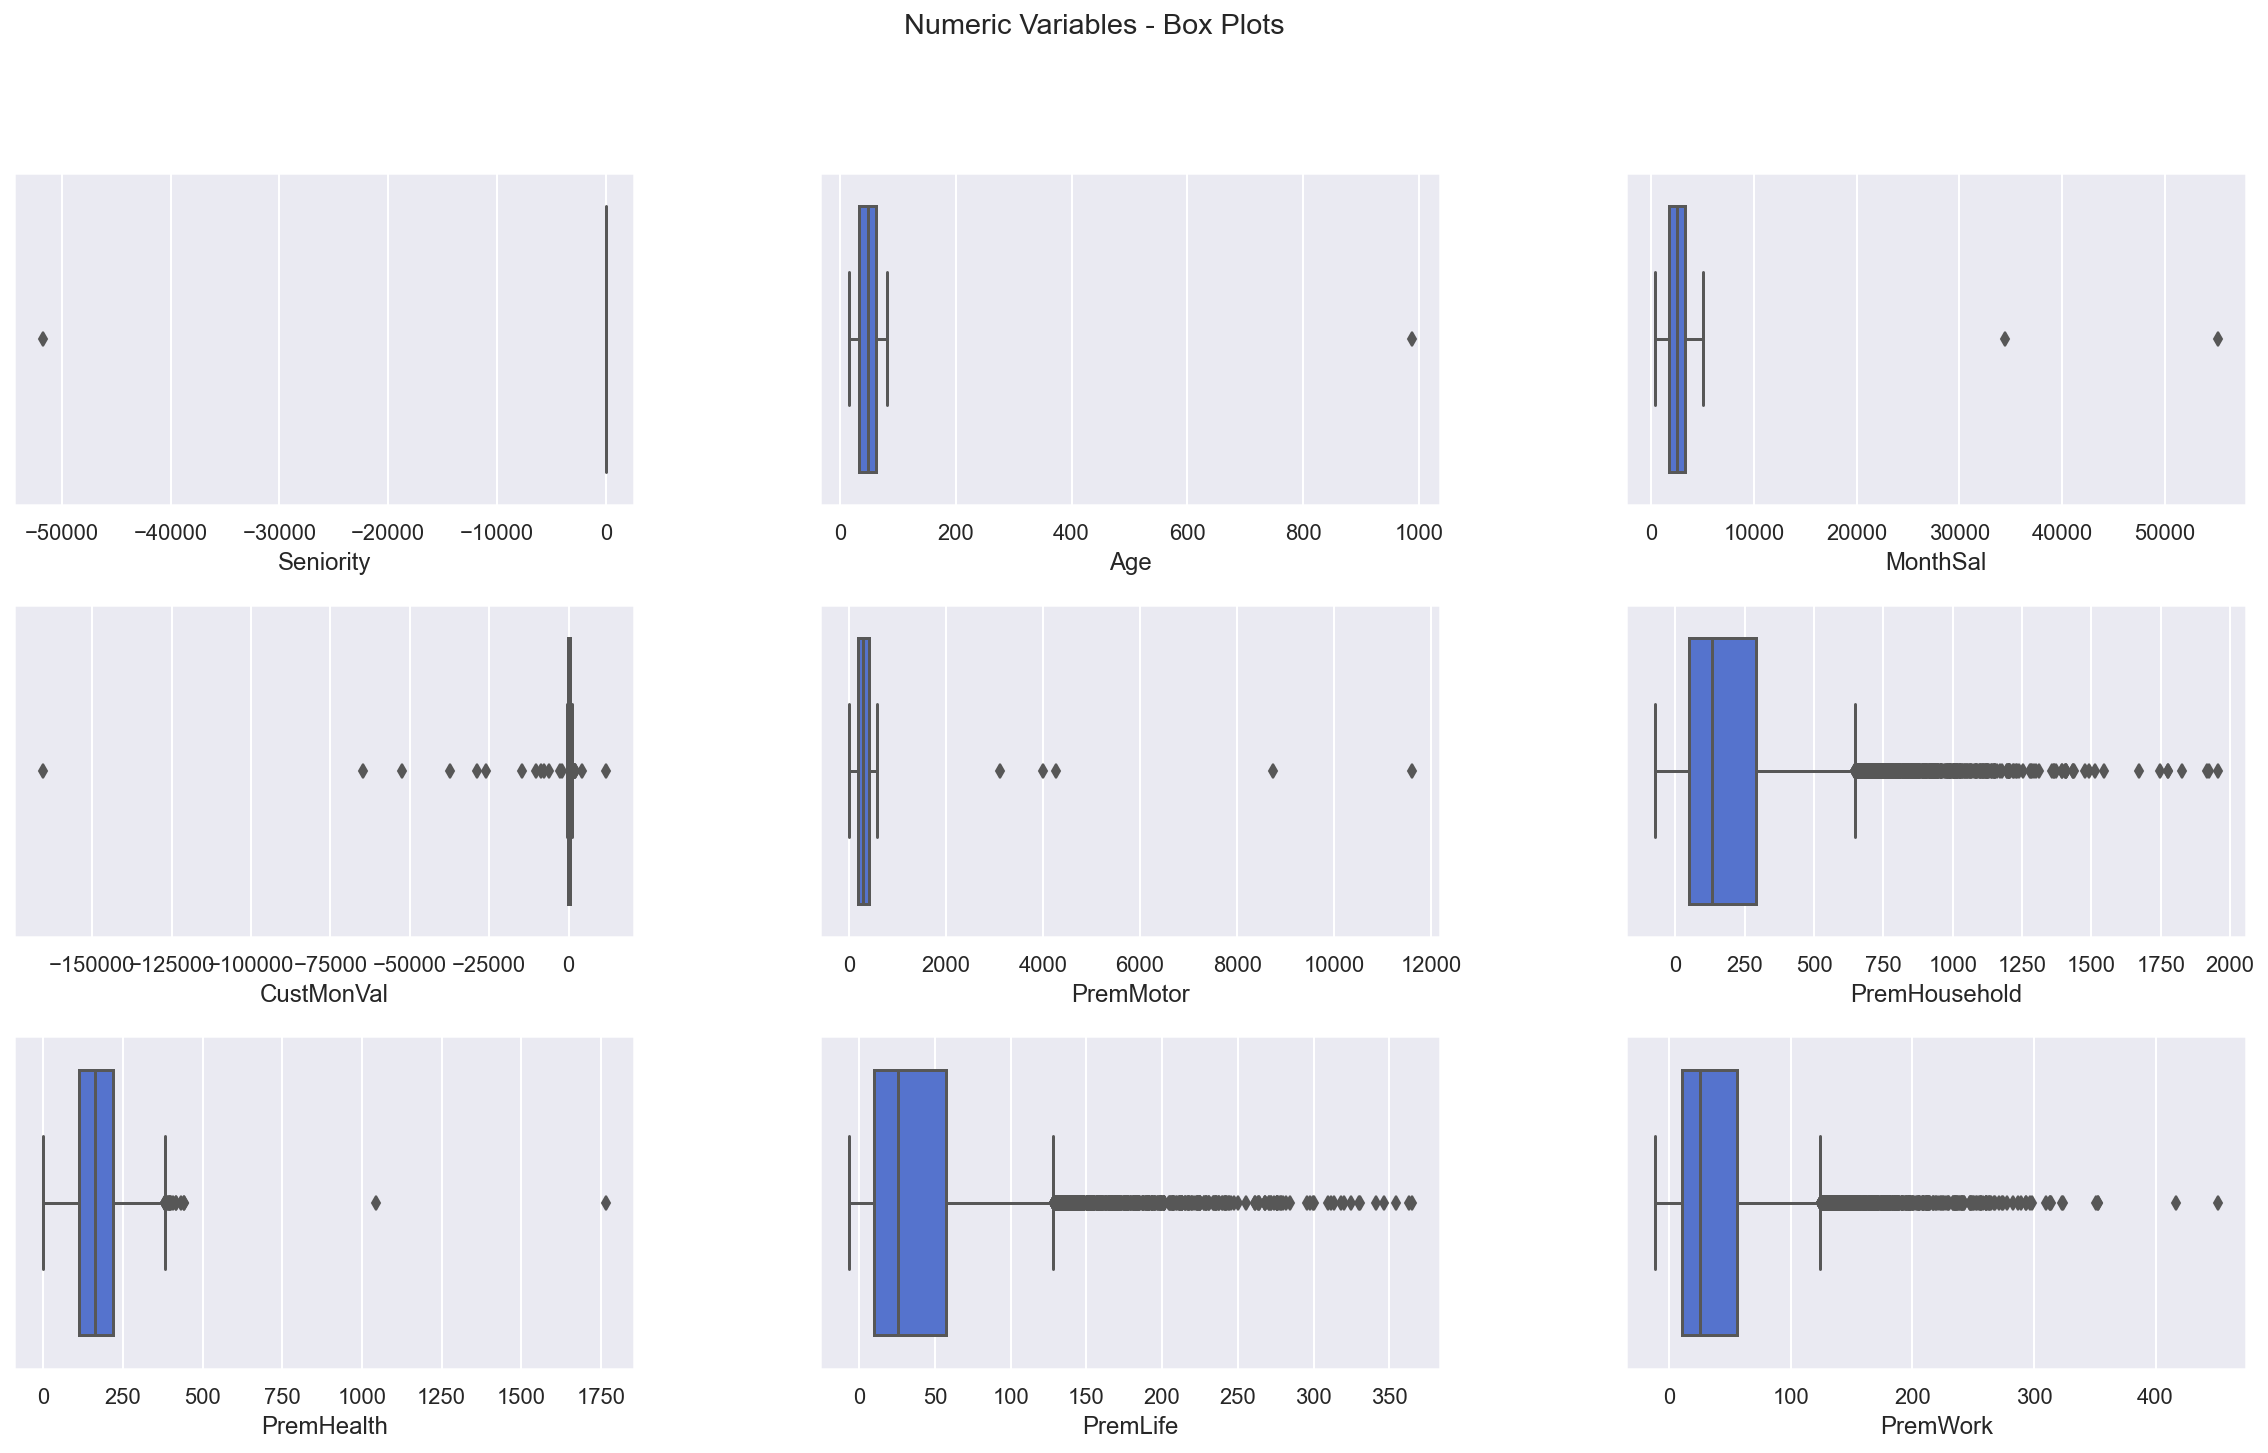

In [48]:
#Check boxplots after outliers removal
# Box plots for the metric features
sns.set()

# Prepare figure and create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) /3), figsize=(20, 11))

# Plot the data
# Iterate across axes objects and associate each box plot
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(df3[feat], ax=ax,color="royalblue")
    
# Layout
# Add a centered title to the figure
title = "Numeric Variables - Box Plots"

plt.suptitle(title)

# Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show plots
plt.show()

#### After testing removing based on 3 , 4  and 5 combined methods and realising that did not seem to make a big difference on the box plots in terms of outliers, we have dropped this approach and decided to apply Inter quartile range (IQR) on 5 features and later manual filter on other 3 features.

In [49]:
#Create a copy of the dataset
df2_iqr = df.copy()
#Define the features to apply the IQR method
iqr_features= ['PremMotor','PremHealth','Age','Seniority','MonthSal']
#Run the function setting the multiplier =1 and create a new columns to store the results
df2_iqr['out'] = out_iqr(df2_iqr[iqr_features], multiplier = 1)
#Show the results
df2_iqr['out'].value_counts()

0    10080
1      216
Name: out, dtype: int64

In [50]:
#Filter the data excluding the outliers detected
df2_iqr1 = df2_iqr[df2_iqr['out']==0]
#Create a dataset to the outliers detected
df2_iqr_out = df2_iqr[df2_iqr['out']==1]
#Drop the column create in both datasets
df2_iqr1.drop(['out'], axis=1, inplace=True)
df2_iqr_out.drop(['out'], axis=1, inplace=True)

In [51]:
print('Percentage of data kept after removing outliers:', np.round(df2_iqr1.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 0.979


In [52]:
df2_iqr1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10080 entries, 1.0 to 10296.0
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Seniority      10050 non-null  float64
 1   Age            10063 non-null  float64
 2   MonthSal       10044 non-null  float64
 3   CustMonVal     10080 non-null  float64
 4   PremMotor      10046 non-null  float64
 5   PremHousehold  10080 non-null  float64
 6   PremHealth     10037 non-null  float64
 7   PremLife       9977 non-null   float64
 8   PremWork       9996 non-null   float64
dtypes: float64(9)
memory usage: 787.5 KB


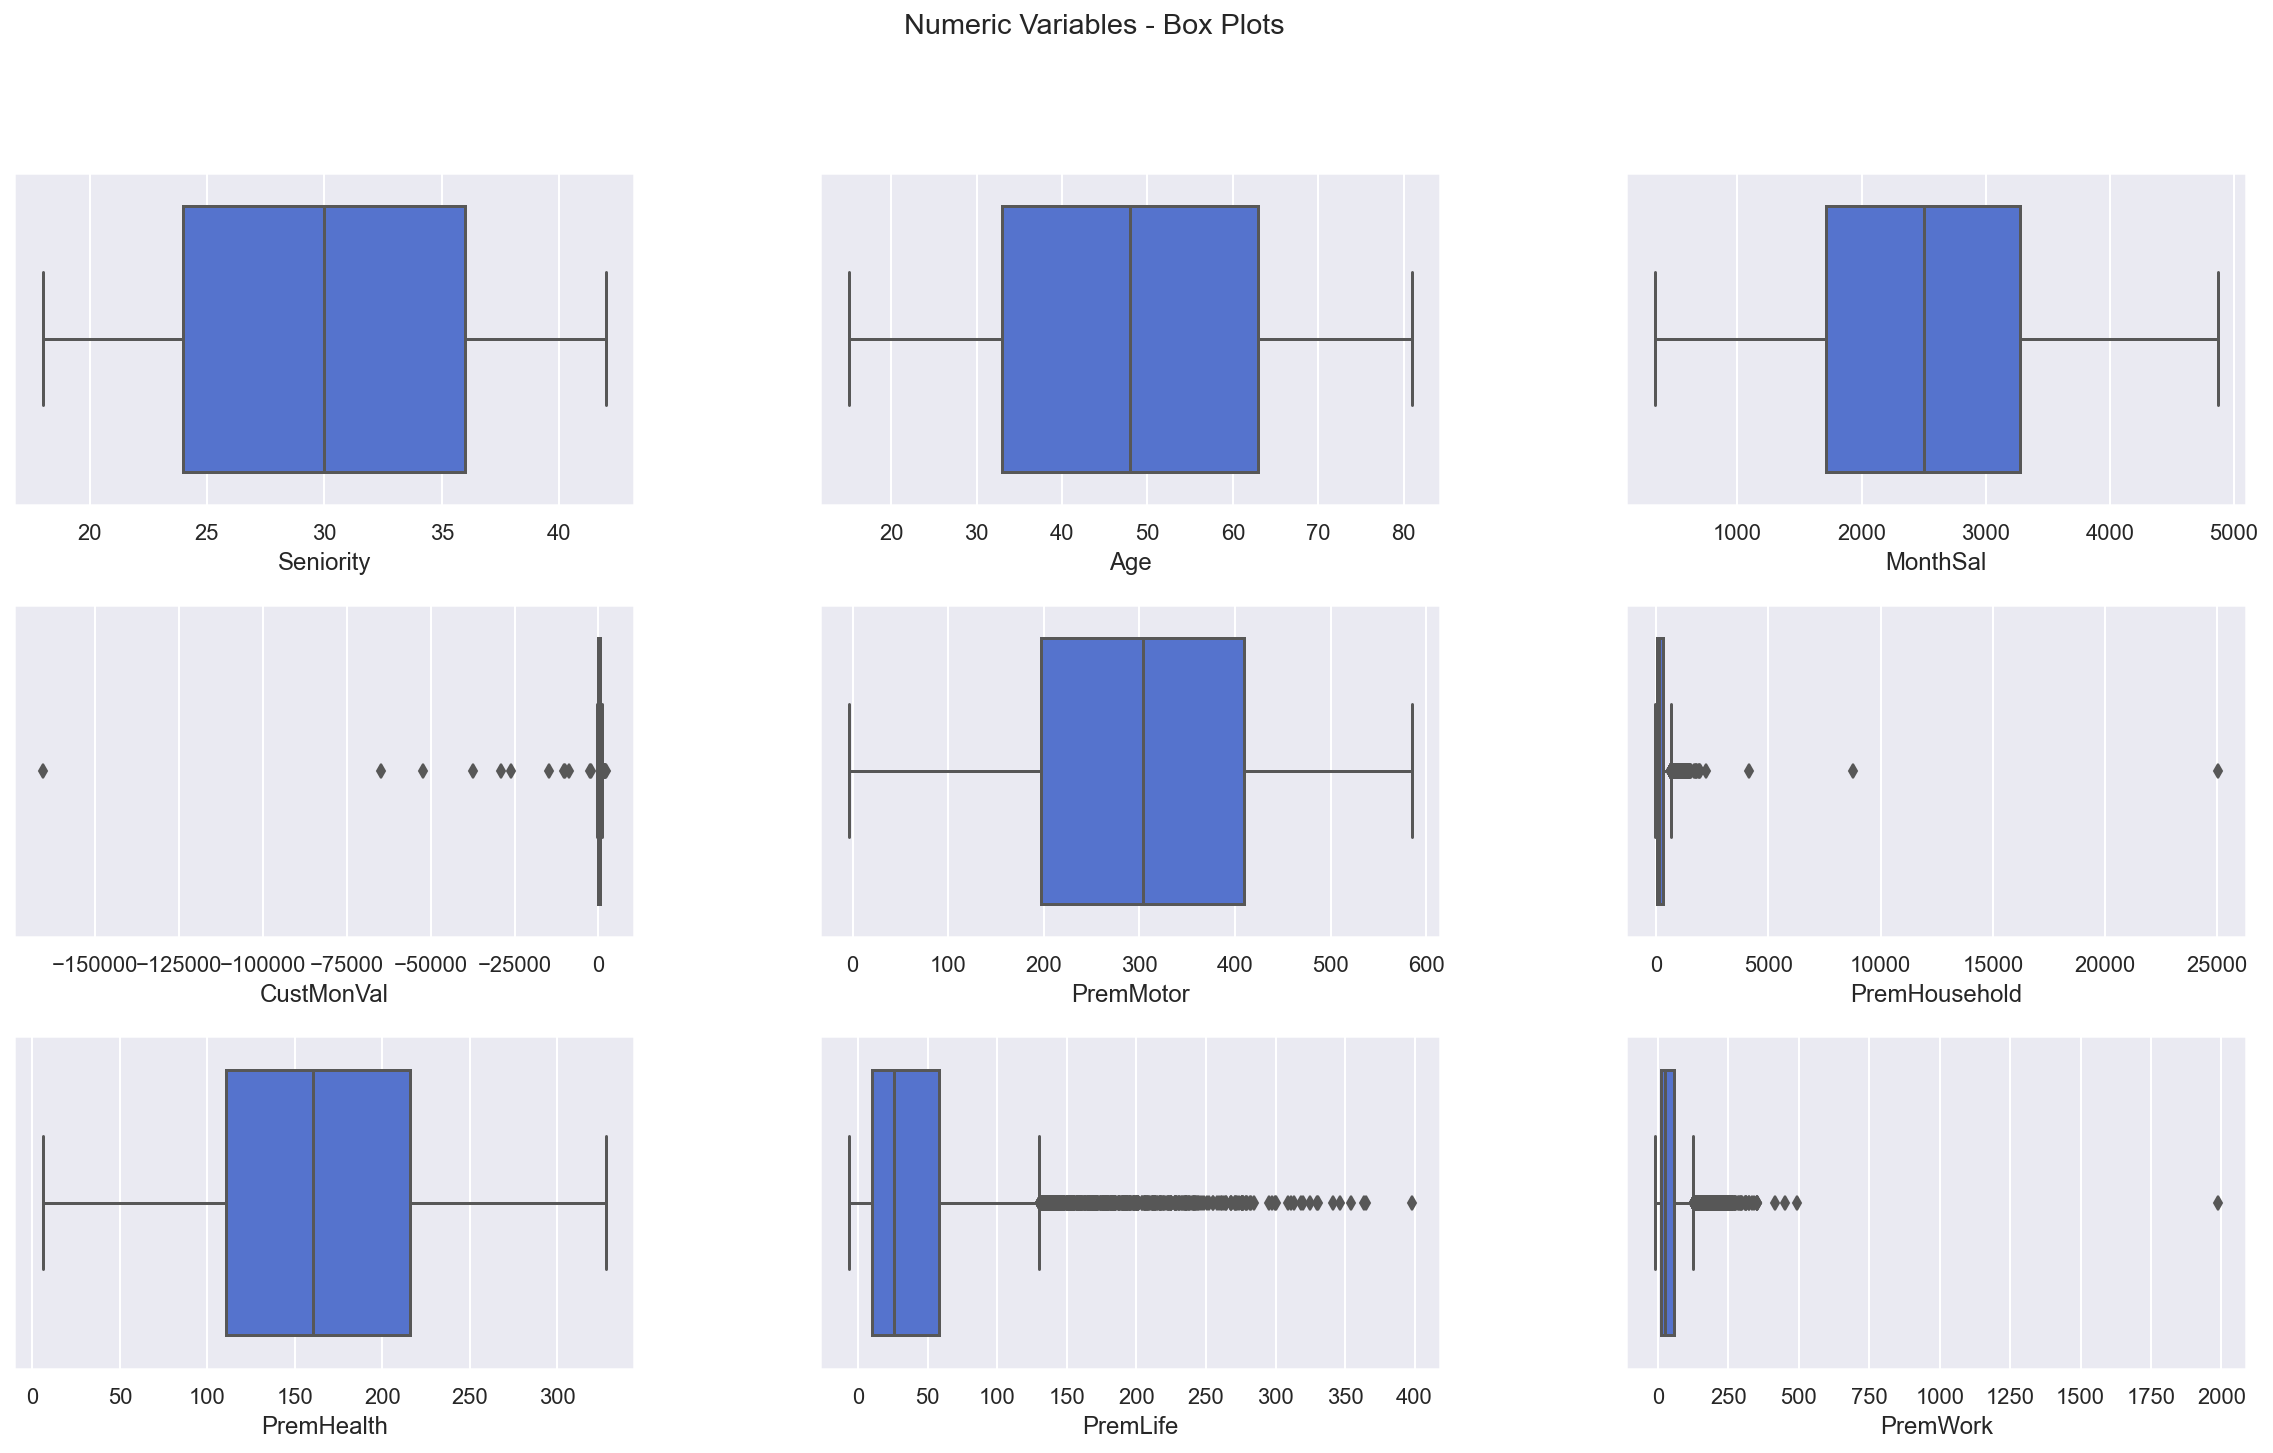

In [53]:
#Check boxplots after outliers removal
# Box plots for the metric features
sns.set()

# Prepare figure and create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) /3), figsize=(20, 11))

# Plot the data
# Iterate across axes objects and associate each box plot
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(df2_iqr1[feat], ax=ax,color="royalblue")
    
# Layout
# Add a centered title to the figure
title = "Numeric Variables - Box Plots"

plt.suptitle(title)

# Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show plots
plt.show()

In [54]:
#hand made outliers
filters1 = (

    
    ((df2_iqr1['CustMonVal']>=-1000)|(df2_iqr1['CustMonVal'].isnull()))
   &
    ((df2_iqr1['PremWork']<=400)|(df2_iqr1['PremWork'].isnull()))
   &
     ((df2_iqr1['PremHousehold']<=2000)|(df2_iqr1['PremHousehold'].isnull()))
    &
    ((df2_iqr1['PremLife']<=390)|(df2_iqr1['PremLife'].isnull()))
)
   
df2_outfilter = df2_iqr1[filters1].copy()
print('Percentage of data kept after removing outliers:', np.round(df2_outfilter.shape[0] / df.shape[0], 4))

Percentage of data kept after removing outliers: 0.977


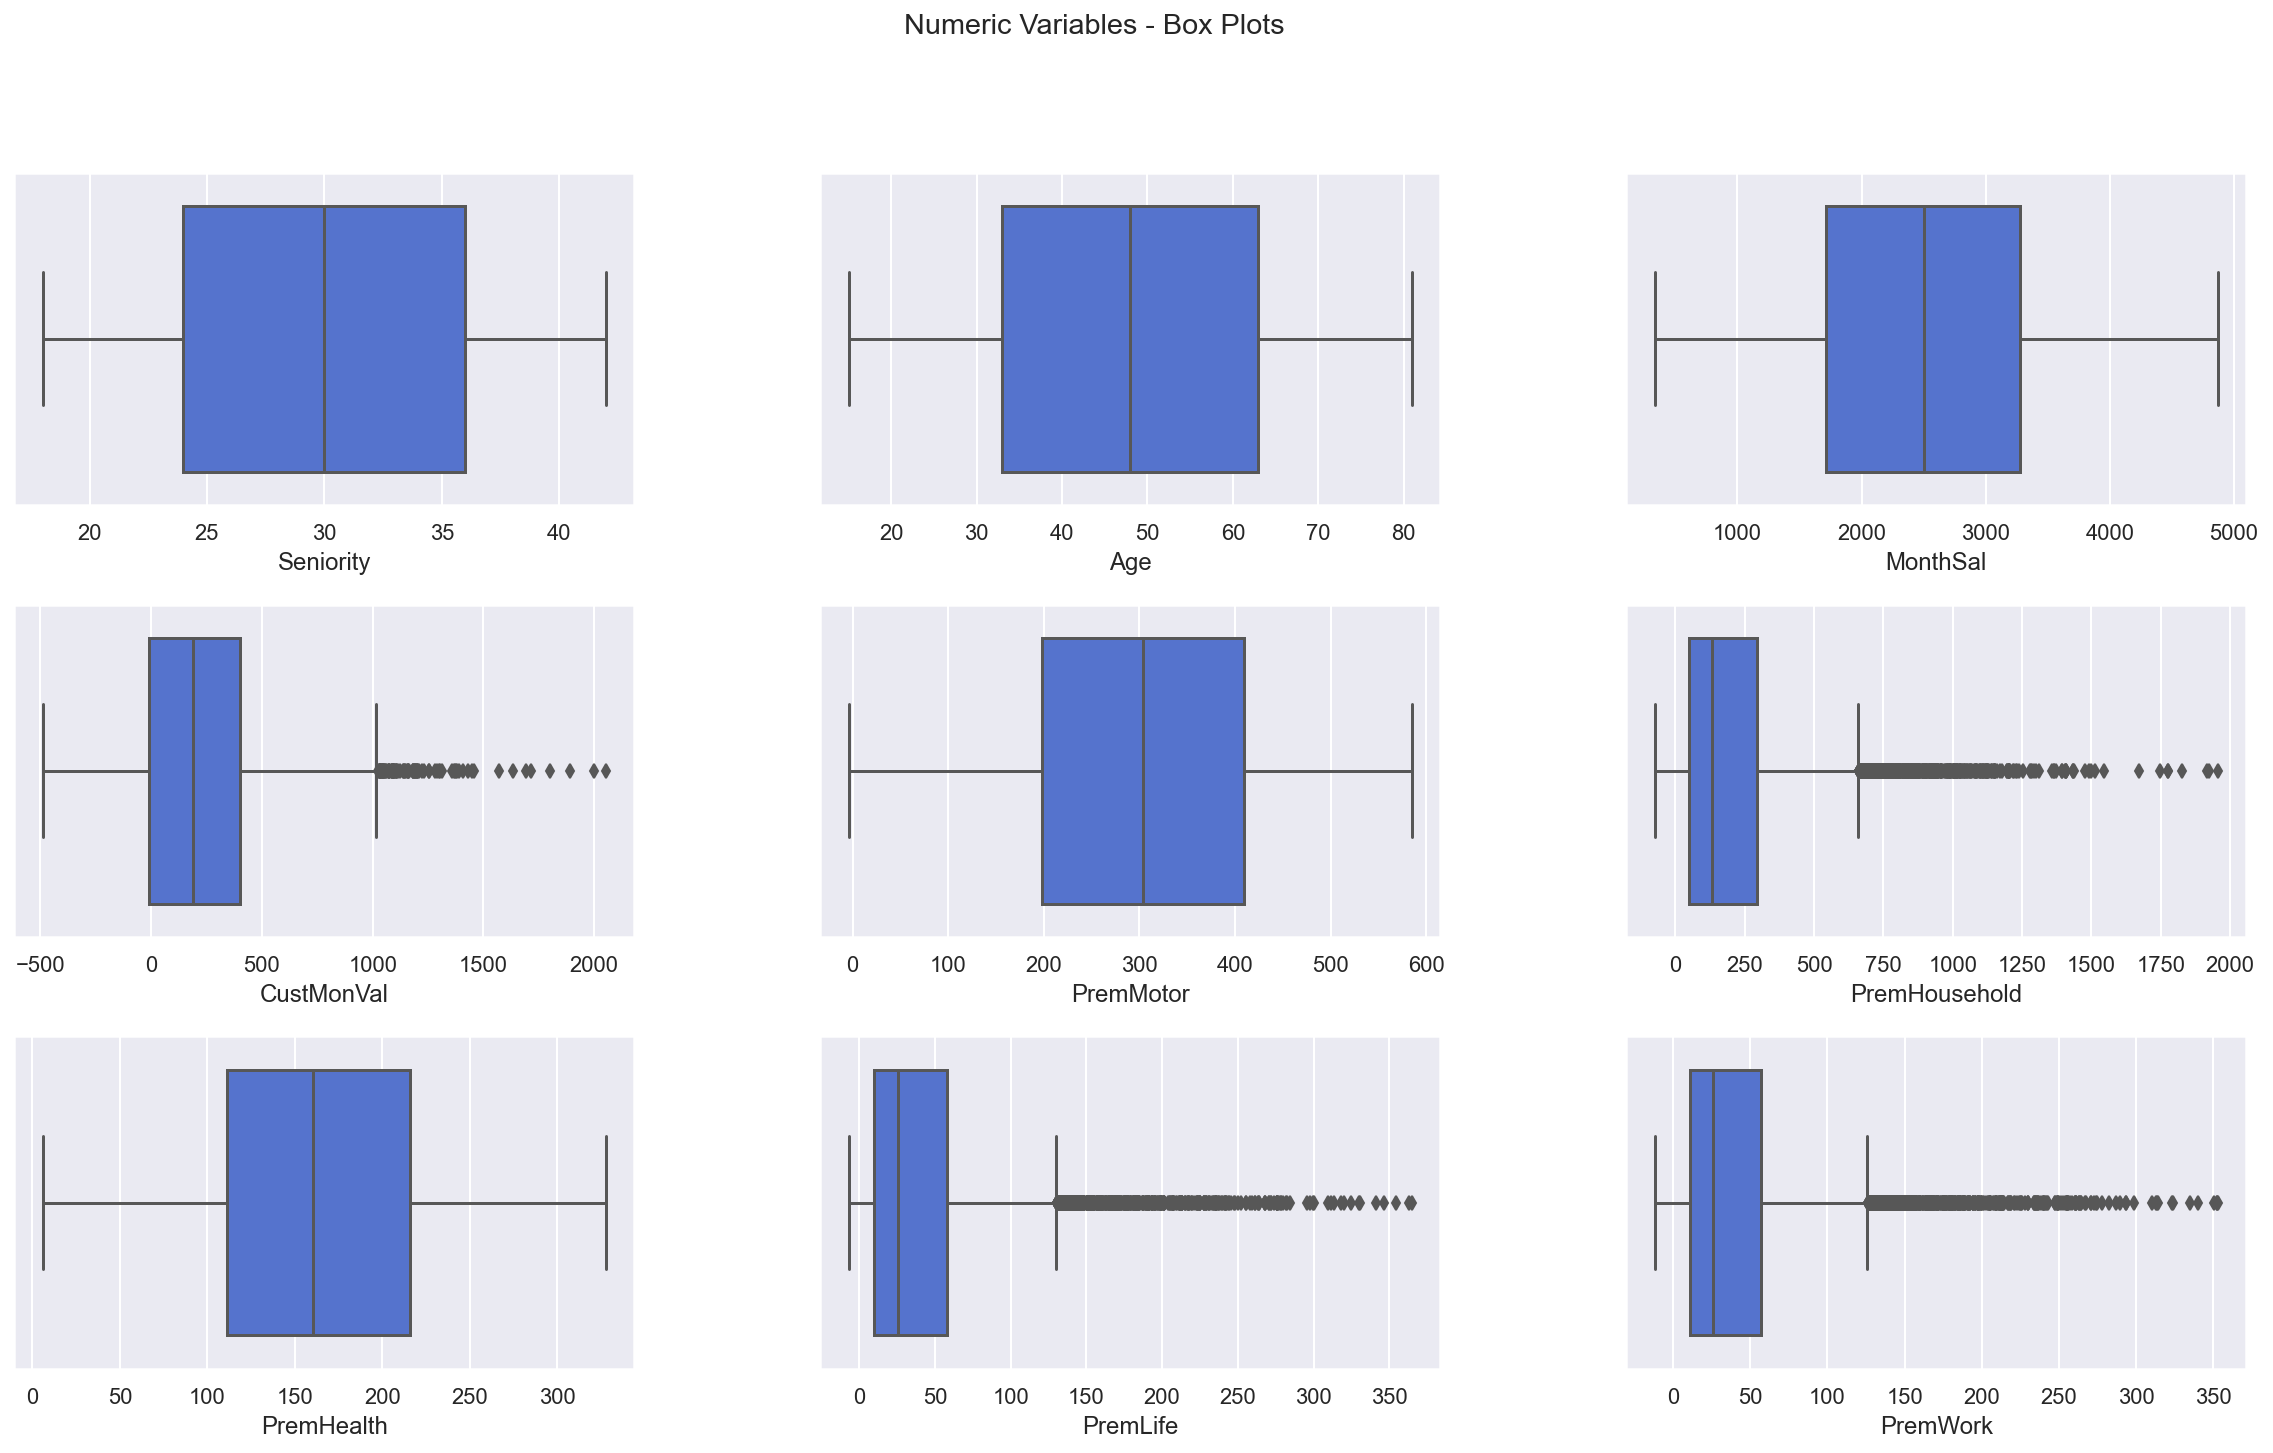

In [55]:
#Check boxplots after outliers removal
# Box plots for the metric features
sns.set()

# Prepare figure and create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) /3), figsize=(20, 11))

# Plot the data
# Iterate across axes objects and associate each box plot
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(df2_outfilter[feat], ax=ax,color="royalblue")
    
# Layout
# Add a centered title to the figure
title = "Numeric Variables - Box Plots"

plt.suptitle(title)

# Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show plots
plt.show()

In [56]:
filters2 = (

    
    (df2_iqr1['CustMonVal']<-1000)
   |
    (df2_iqr1['PremWork']>400)
   |
     (df2_iqr1['PremHousehold']>2000)
    |
    (df2_iqr1['PremLife']>390)
)
   
df2_out = df2_iqr1[filters2].copy()

In [57]:
df2 = df2_outfilter.copy()

In [58]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10059 entries, 1.0 to 10296.0
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Seniority      10029 non-null  float64
 1   Age            10042 non-null  float64
 2   MonthSal       10023 non-null  float64
 3   CustMonVal     10059 non-null  float64
 4   PremMotor      10025 non-null  float64
 5   PremHousehold  10059 non-null  float64
 6   PremHealth     10016 non-null  float64
 7   PremLife       9956 non-null   float64
 8   PremWork       9975 non-null   float64
dtypes: float64(9)
memory usage: 785.9 KB


### Missing data

In [59]:
df2.head()


,Seniority,Age,MonthSal,CustMonVal,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,
1.0,31.0,34.0,2177.0,380.97,375.85,79.45,146.36,47.01,16.89
2.0,35.0,21.0,677.0,-131.13,77.46,416.20,116.69,194.48,106.13
3.0,25.0,46.0,2277.0,504.67,206.15,224.50,124.58,86.35,99.02
4.0,26.0,35.0,1099.0,-16.99,182.48,43.35,311.17,35.34,28.34
5.0,30.0,43.0,1763.0,35.23,338.62,47.80,182.59,18.78,41.45


In [60]:
# Check the percentage of missing values
df2_missing = missing_data(df2)
df2_missing = df2_missing[df2_missing['missing']>0]
df2_missing

,Feature,missing,percentage
7,PremLife,103,1.023959
8,PremWork,84,0.835073
6,PremHealth,43,0.427478
2,MonthSal,36,0.357888
4,PremMotor,34,0.338006
0,Seniority,30,0.298240
1,Age,17,0.169003


In [61]:
#RUN KNN IMPUTER TO REPLACE MISSING VALUES
scaler = StandardScaler()
scaled = scaler.fit_transform(df2[metric_features])
imputer = KNNImputer(weights='distance', n_neighbors=100)
imputer.fit(scaled)
imputed_metric = imputer.transform(scaled)
df2.loc[:,metric_features] = scaler.inverse_transform(imputed_metric)

In [62]:
#Check Missing data
df2.isna().sum().sum()

0

In [63]:
#Remove all contracts with work insurance and age equal 15.
#Check contracts with age equal 15
df2_15 = df2[df2['Age']<=15]
df2_15

,Seniority,Age,MonthSal,CustMonVal,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,
660.0,25.0,15.0,1284.0,243.50,46.23,1079.65,72.68,252.27,-10.00
690.0,19.0,15.0,1180.0,436.10,54.90,406.20,65.79,112.02,256.05
866.0,37.0,15.0,562.0,1113.78,40.34,847.95,94.24,178.70,112.13
1437.0,27.0,15.0,823.0,281.28,129.58,177.80,58.01,176.70,218.15
2580.0,30.0,15.0,1006.0,267.95,48.23,396.75,291.50,127.58,24.45
3147.0,22.0,15.0,372.0,488.76,60.68,270.60,177.59,182.48,107.13
4466.0,38.0,15.0,958.0,-204.59,28.56,1359.15,68.79,38.23,179.59
4484.0,33.0,15.0,1241.0,909.17,43.34,589.55,142.47,121.80,179.48
5348.0,36.0,15.0,1119.0,796.71,148.14,628.45,221.82,45.12,30.23


In [64]:
#select all rows with age different of 15
df2 = df2[df2['Age']!=15]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10047 entries, 1.0 to 10296.0
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Seniority      10047 non-null  float64
 1   Age            10047 non-null  float64
 2   MonthSal       10047 non-null  float64
 3   CustMonVal     10047 non-null  float64
 4   PremMotor      10047 non-null  float64
 5   PremHousehold  10047 non-null  float64
 6   PremHealth     10047 non-null  float64
 7   PremLife       10047 non-null  float64
 8   PremWork       10047 non-null  float64
dtypes: float64(9)
memory usage: 784.9 KB


In [65]:
#Replace by missing value all contracts that seniority is higher than age
#Create a column dif to check seniority higher than age
df2_sen = df2.copy()
df2_sen['dif'] = df2_sen["Seniority"] - df2_sen["Age"]
df2_sen.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10047 entries, 1.0 to 10296.0
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Seniority      10047 non-null  float64
 1   Age            10047 non-null  float64
 2   MonthSal       10047 non-null  float64
 3   CustMonVal     10047 non-null  float64
 4   PremMotor      10047 non-null  float64
 5   PremHousehold  10047 non-null  float64
 6   PremHealth     10047 non-null  float64
 7   PremLife       10047 non-null  float64
 8   PremWork       10047 non-null  float64
 9   dif            10047 non-null  float64
dtypes: float64(10)
memory usage: 863.4 KB


In [66]:
#Check number of contracts with seniority higher than age.
df2_sen.loc[df2_sen['dif']>=1]

,Seniority,Age,MonthSal,CustMonVal,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,dif
CustID,,,,,,,,,,
2.0,35.0,21.0,677.0,-131.13,77.46,416.20,116.69,194.48,106.130000,14.0
14.0,33.0,16.0,1043.0,-75.12,44.34,342.85,127.69,267.94,94.460000,17.0
19.0,35.0,34.0,1414.0,230.38,313.17,373.40,121.80,14.78,72.570000,1.0
23.0,40.0,30.0,1495.0,-89.79,209.04,308.95,192.48,64.79,54.900000,10.0
41.0,22.0,21.0,1177.0,121.36,52.01,455.65,135.47,146.36,148.030000,1.0
...,...,...,...,...,...,...,...,...,...,...
10269.0,29.0,28.0,1414.0,50.46,129.58,167.80,184.48,165.92,75.460000,1.0
10274.0,27.0,24.0,1035.0,293.51,235.71,195.60,103.13,170.92,58.120000,3.0
10285.0,36.0,29.0,1504.0,-1.55,390.63,29.45,179.70,-6.00,14.435558,7.0


In [67]:
#Replace all contracts with seniority higher than age by missing values
df2_sen.loc[df2_sen['dif'] >= 1, 'Seniority'] = np.nan
df2_sen.drop(['dif'], axis=1, inplace=True)
df2_sen.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10047 entries, 1.0 to 10296.0
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Seniority      8126 non-null   float64
 1   Age            10047 non-null  float64
 2   MonthSal       10047 non-null  float64
 3   CustMonVal     10047 non-null  float64
 4   PremMotor      10047 non-null  float64
 5   PremHousehold  10047 non-null  float64
 6   PremHealth     10047 non-null  float64
 7   PremLife       10047 non-null  float64
 8   PremWork       10047 non-null  float64
dtypes: float64(9)
memory usage: 784.9 KB


In [68]:
#Copy para df2 again
df2 = df2_sen.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10047 entries, 1.0 to 10296.0
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Seniority      8126 non-null   float64
 1   Age            10047 non-null  float64
 2   MonthSal       10047 non-null  float64
 3   CustMonVal     10047 non-null  float64
 4   PremMotor      10047 non-null  float64
 5   PremHousehold  10047 non-null  float64
 6   PremHealth     10047 non-null  float64
 7   PremLife       10047 non-null  float64
 8   PremWork       10047 non-null  float64
dtypes: float64(9)
memory usage: 784.9 KB


In [69]:
#RUN KNN IMPUTER TO REPLACE MISSING VALUES
scaler = StandardScaler()
scaled = scaler.fit_transform(df2[metric_features])
imputer = KNNImputer(weights='distance', n_neighbors=100)
imputer.fit(scaled)
imputed_metric = imputer.transform(scaled)
df2.loc[:,metric_features] = scaler.inverse_transform(imputed_metric)

In [70]:
#Check Missing data
df2.isna().sum().sum()

0

In [71]:
#Check df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10047 entries, 1.0 to 10296.0
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Seniority      10047 non-null  float64
 1   Age            10047 non-null  float64
 2   MonthSal       10047 non-null  float64
 3   CustMonVal     10047 non-null  float64
 4   PremMotor      10047 non-null  float64
 5   PremHousehold  10047 non-null  float64
 6   PremHealth     10047 non-null  float64
 7   PremLife       10047 non-null  float64
 8   PremWork       10047 non-null  float64
dtypes: float64(9)
memory usage: 784.9 KB


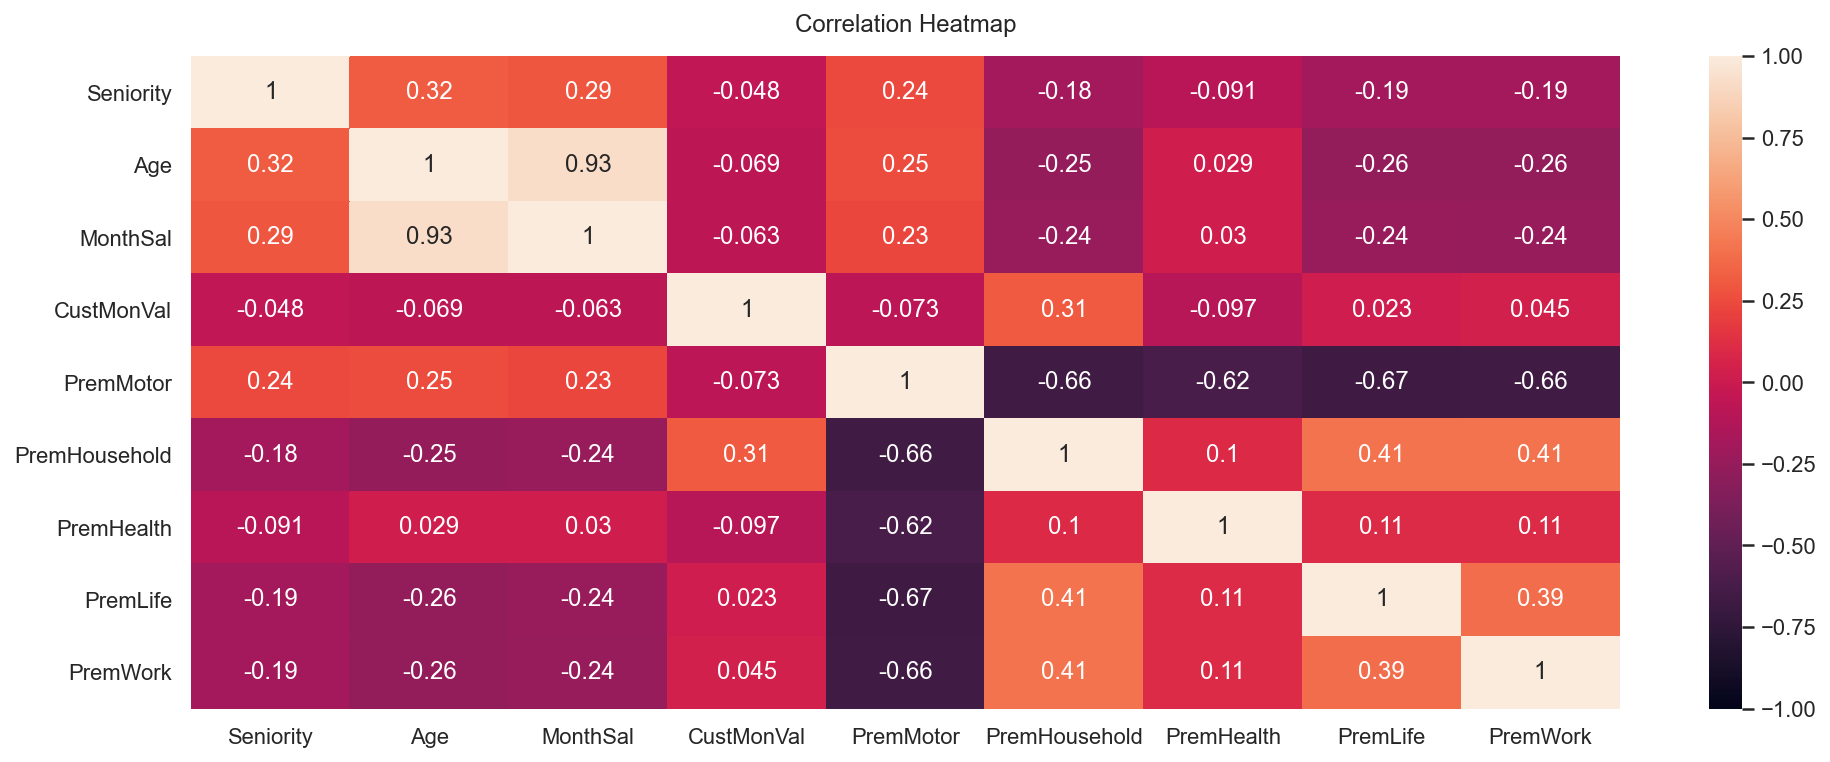

In [72]:
# Check Pearson correlation heatmap (numeric features) again to see if there is any change. 
plt.figure(figsize=(16, 6))
corr = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)
corr.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Normalize data

In [73]:
#Standardize nummerical variables
# Create a StandardScaler
sds = StandardScaler()
# Fit and Transform data by applying the scale obtained in the previous command
scaled_feat = sds.fit_transform(df2[metric_features])
#Applying the transformation in the dataset
df2[metric_features]= scaled_feat
#Check the results
df2.head()

,Seniority,Age,MonthSal,CustMonVal,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,
1.0,0.438805,-0.808231,-0.329558,0.621716,0.548610,-0.538986,-0.258656,0.113987,-0.513698
2.0,-0.823198,-1.562515,-1.868402,-1.350610,-1.629389,0.886022,-0.682190,3.228305,1.408072
3.0,-0.545139,-0.111970,-0.226969,1.098140,-0.690059,0.074815,-0.569562,0.944782,1.254959
4.0,-0.381148,-0.750209,-1.435474,-0.911006,-0.862830,-0.691749,2.093979,-0.132463,-0.267124
5.0,0.274814,-0.286035,-0.754279,-0.709883,0.276862,-0.672918,0.258521,-0.482183,0.015198


In [74]:
#Check the statistics summary
df2.describe().apply(lambda s: s.apply(lambda x:format(x,'g')))

,Seniority,Age,MonthSal,CustMonVal,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
count,10047,10047,10047,10047,10047,10047,10047,10047,10047
mean,1.54798e-16,3.24503e-16,-2.83506e-16,7.98715e-17,5.54393e-17,-1.13696e-16,-2.06044e-16,-1.39234e-18,1.38239e-17
std,1.00005,1.00005,1.00005,1.00005,1.00005,1.00005,1.00005,1.00005,1.00005
min,-1.69307,-1.85262,-2.22131,-2.73355,-2.22478,-1.19256,-2.26541,-1.02661,-1.13584
25%,-0.759899,-0.866253,-0.79788,-0.881927,-0.743598,-0.668263,-0.764699,-0.669925,-0.662073
50%,-0.217158,0.00407374,0.00590986,-0.11495,0.020515,-0.315555,-0.0508145,-0.341324,-0.326991
75%,0.766786,0.874401,0.800979,0.703001,0.794373,0.354527,0.734444,0.341643,0.331114
max,2.2427,1.91879,2.43523,7.06557,2.07684,7.40869,2.33194,6.8332,6.72826


## Clustering

In [75]:
df_cluster = df2.copy()

### Kmeans - Clustering

#### K means is the most popular clustering algorithm. It’s efficient in terms of time, easy to understand and easy to implement. But its major problem is to define the number of clusters and its very sensitive to the initial position of seeds. 

#### To define the number of clusters, we plot 3 metrics to help us:
#### 1) The Inertia plot shows the dispersion of the points within the cluster, meaning a small inertia is the best outcome. 
#### 2) The Average silhouette plot determines how well each object lies within its cluster, being the best outcome a higher number. 
#### At last, the Davies-Bouldin score plot which index is based on a ratio between distances within the cluster and distances between clusters, the best outcome is the smallest index.

In [76]:
def kmeans_elbows_plot(data, k):

    K = range(2, k) 

    inertia = []
    avg_silhouette = []
    db_scores =[]
    for k in K:
        kmeanModel = KMeans(n_clusters=k, init='k-means++', n_init=15, random_state=1)
        kmeanModel.fit(data)
        clusters = kmeanModel.labels_
        inertia.append(kmeanModel.inertia_)
        avg_silhouette.append(silhouette_score(data, clusters))
        db_scores.append(davies_bouldin_score(data, clusters))

    # The inertia plot
    plt.figure(figsize=(9,5))
    plt.plot(inertia)
    plt.ylabel("Inertia: SSw")
    plt.xlabel("Number of clusters+2")
    plt.title("Inertia plot over clusters", size=15)
    plt.show()

    # The average silhouette plot
    plt.figure(figsize=(9,5))
    plt.plot(avg_silhouette)
    plt.ylabel("Average silhouette")
    plt.xlabel("Number of clusters+2")
    plt.title("Average silhouette plot over clusters", size=15)
    plt.show()

    # The Davies Bouldin score
    plt.figure(figsize=(9,5))
    plt.plot(db_scores)
    plt.ylabel("Davies-Bouldin")
    plt.xlabel("Number of clusters+2")
    plt.title("Davies-Bouldin plot over clusters", size=15)
    plt.show()

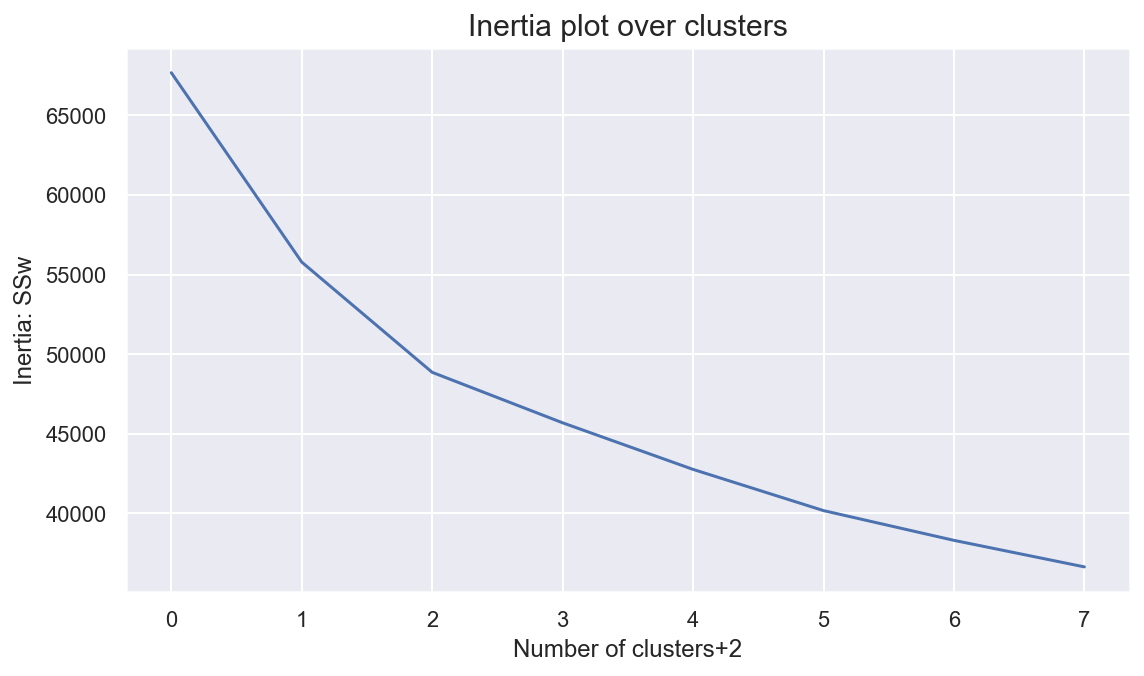

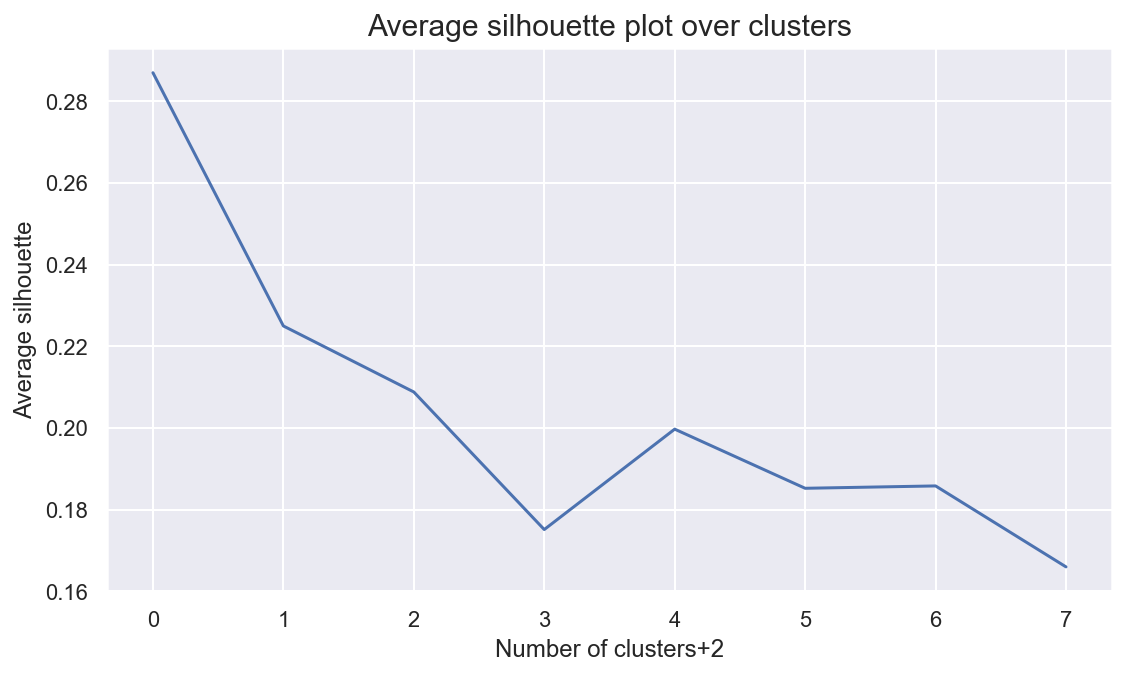

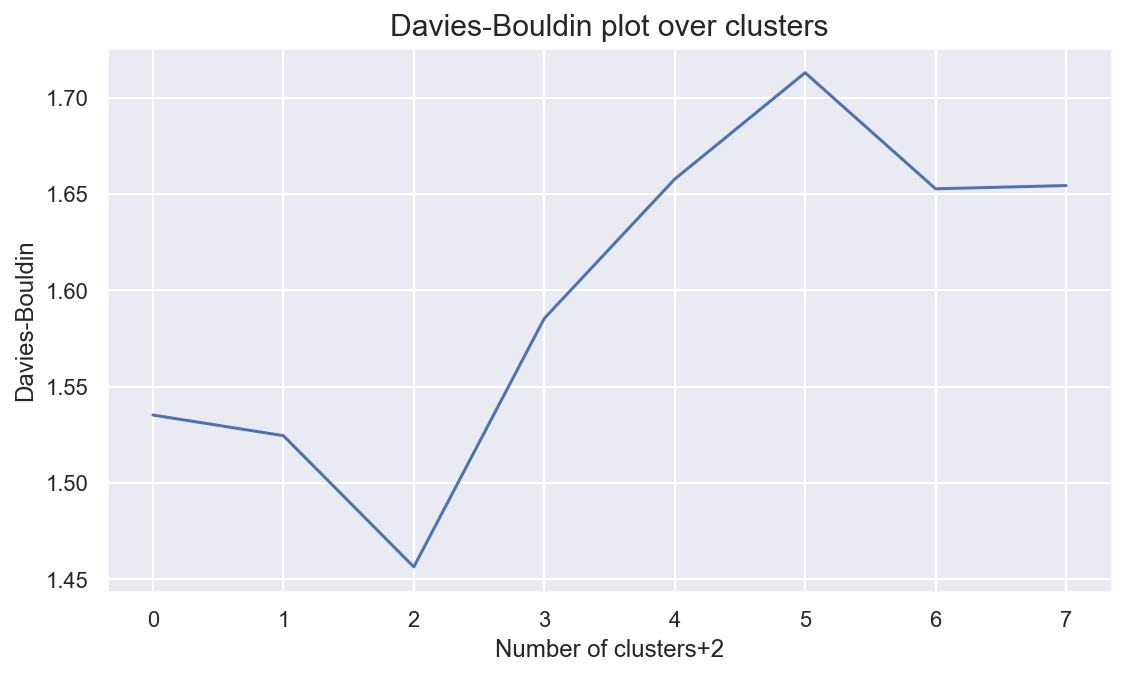

In [77]:
kmeans_elbows_plot(df_cluster, 10)

#### We also ran the silhouette plot that shows a coefficient for the clusters’ quality depending on the number of clusters chosen. We applied in with some possible cluster numbers.

In [78]:
def complete_sh_score(data, k):
    # Storing average silhouette metric
    range_clusters = range(1, k)
    avg_silhouette = []
    for nclus in range_clusters:
        # Skip nclus == 1
        if nclus == 1:
            continue

        # Create a figure
        fig = plt.figure(figsize=(13, 7))

        # Initialize the KMeans object with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
        cluster_labels = kmclust.fit_predict(data)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(data, cluster_labels)
        avg_silhouette.append(silhouette_avg)
        print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(data, cluster_labels)

        y_lower = 10
        for i in range(nclus):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            # Get y_upper to demarcate silhouette y range size
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            # Filling the silhouette
            color = cm.nipy_spectral(float(i) / nclus)
            plt.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        plt.title("The silhouette plot for the various clusters.")
        plt.xlabel("The silhouette coefficient values")
        plt.ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        plt.axvline(x=silhouette_avg, color="red", linestyle="--")

        # The silhouette coefficient can range from -1, 1
        xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
        plt.xlim([xmin, xmax])

        # The (nclus+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        plt.ylim([0, len(data) + (nclus + 1) * 10])

        plt.yticks([])  # Clear the yaxis labels / ticks
        plt.xticks(np.arange(xmin, xmax, 0.1))

For n_clusters = 2, the average silhouette_score is : 0.28695680748139785
For n_clusters = 3, the average silhouette_score is : 0.22496412403737154
For n_clusters = 4, the average silhouette_score is : 0.20880307270321877
For n_clusters = 5, the average silhouette_score is : 0.17512734772123495


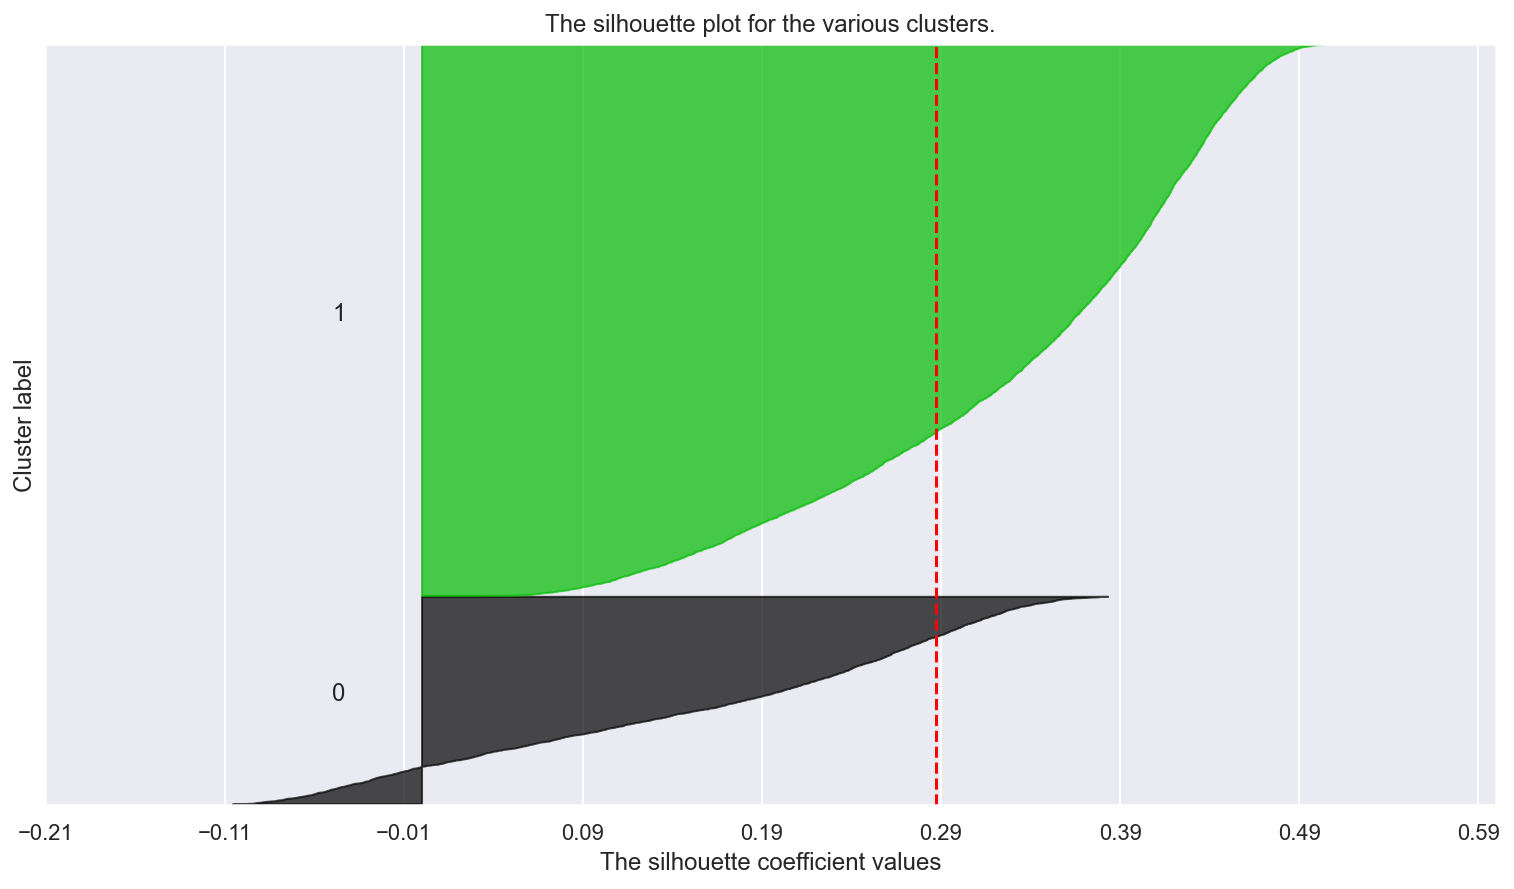

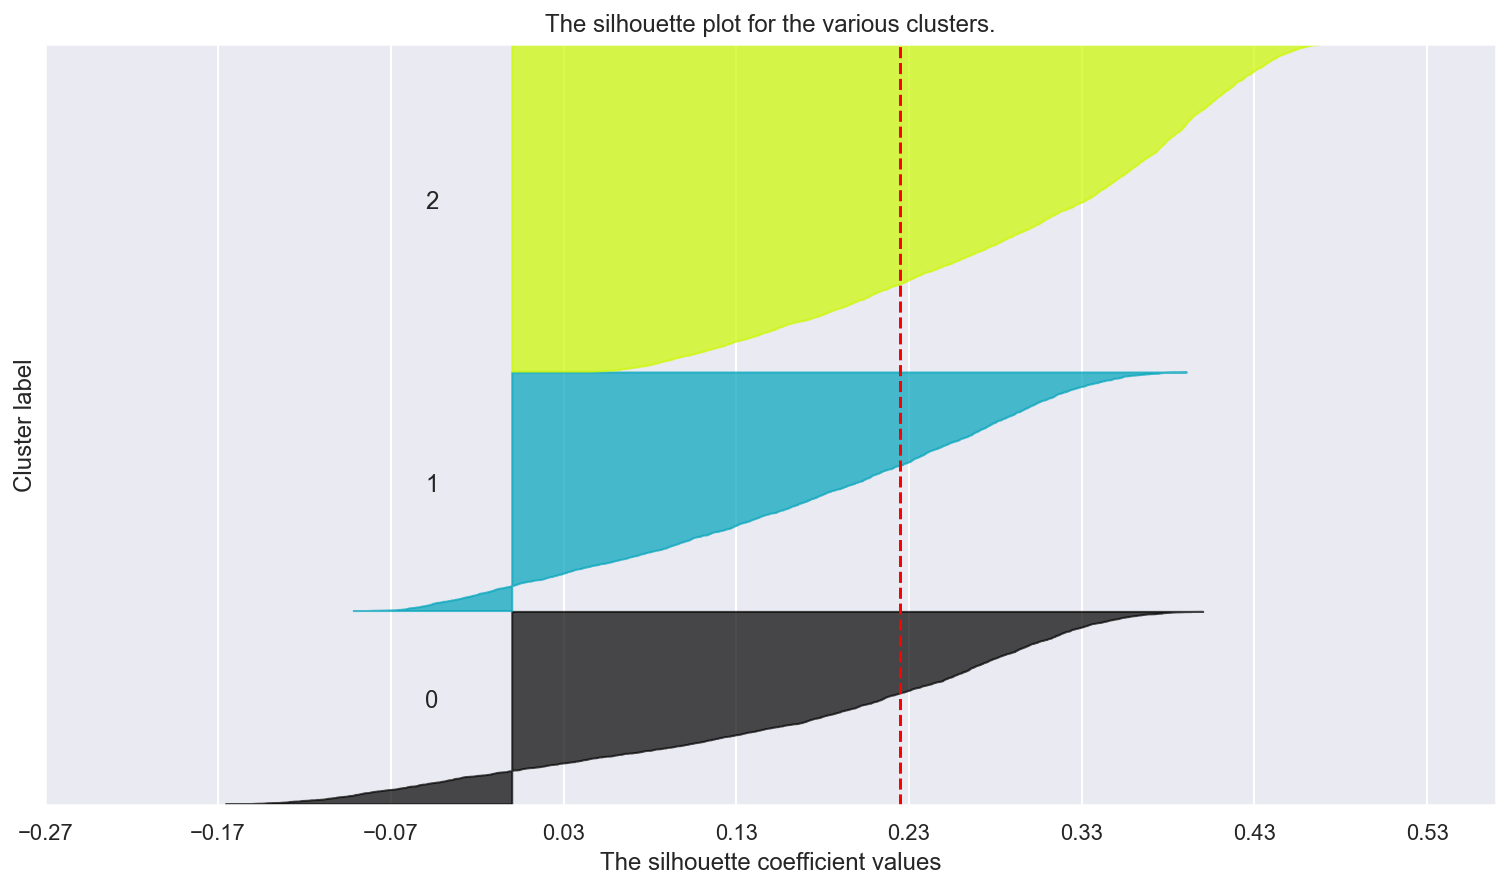

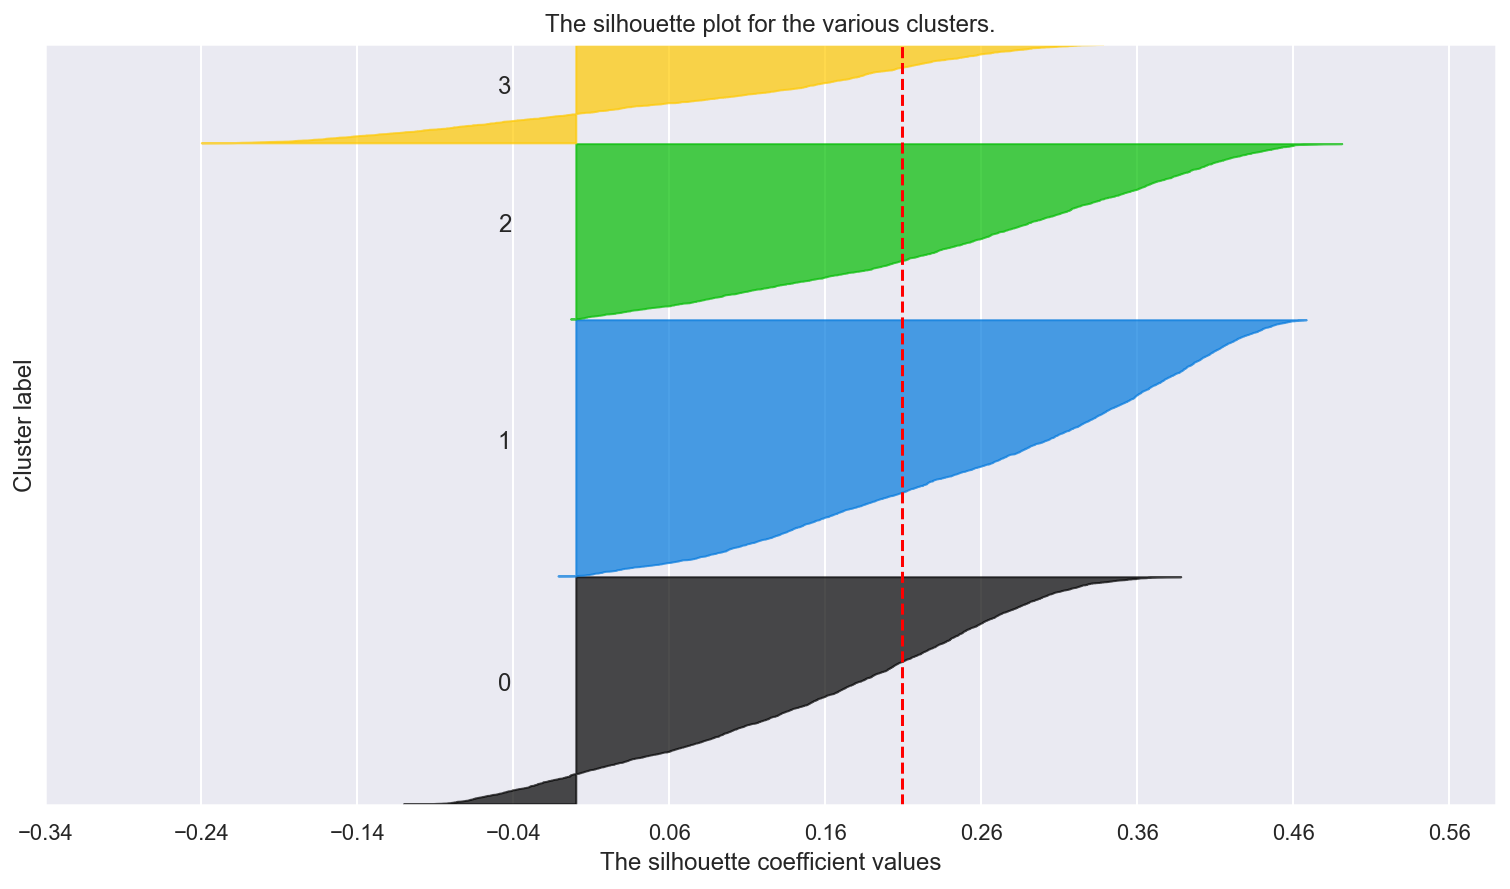

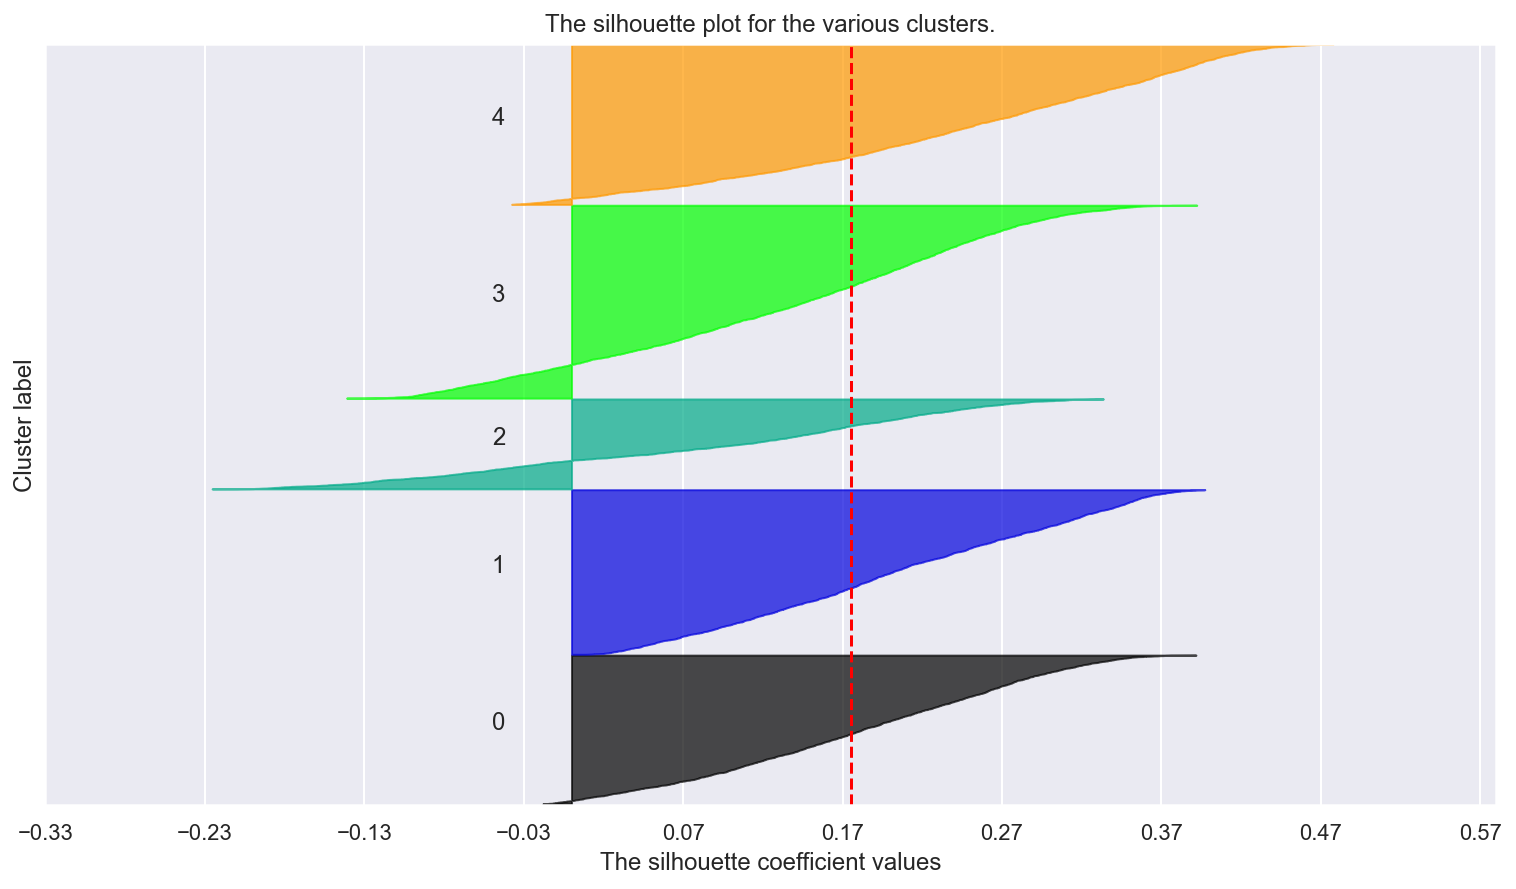

In [79]:
complete_sh_score(df_cluster, 6)

#### After looking to the plots, we decided to proceed with 5 clusters

In [80]:
#We set the ‘k-means++’ as the initialization method (init parameter) 
#with 15 number of iterations to choose the best centroid in terms of inertia (n_init parameter).
kmeans_cluster = KMeans(
    n_clusters=5 ,
    init='k-means++',
    n_init=15,
    random_state=1
)
kmeans_cluster_labels = kmeans_cluster.fit_predict(df_cluster)

In [81]:
#Check the partion cluster
df_cluster['kmeans_cluster_labels'] = kmeans_cluster_labels
df_cluster.groupby('kmeans_cluster_labels').count()

,Seniority,Age,MonthSal,CustMonVal,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
kmeans_cluster_labels,,,,,,,,,
0,1976,1976,1976,1976,1976,1976,1976,1976,1976
1,2187,2187,2187,2187,2187,2187,2187,2187,2187
2,1195,1195,1195,1195,1195,1195,1195,1195,1195
3,2563,2563,2563,2563,2563,2563,2563,2563,2563
4,2126,2126,2126,2126,2126,2126,2126,2126,2126


## Evaluation

#### The R2 is a measure of the homogenity of a cluster solution. 

In [82]:
#Functions to get the R2.

def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable
def adjusted_r2(df, labels):
    """Return the overall adjusted R-squared"""
    
    # 1. calculate sst
    sst = get_ss(df)
    
    # 2. calculate ssw
    grouped_var = df.groupby(labels).var()
    grouped_count = df.groupby(labels).count() - 1
    ssw = np.sum(np.sum(grouped_var * grouped_count))
    
    # 3. return adjusted R-squared
    return 1 - ssw/sst

In [83]:
#R2 for k-means algorithm
adjusted_r2(df_cluster,kmeans_cluster_labels)

0.5903941935311425

#### Describe clusters - Visualizations

In [84]:
def cluster_profiles(df,label_columns, figsize, compar_titles=None, frequency = True):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    if frequency:
        fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    else:
        fig, axes = plt.subplots(nrows=len(label_columns), ncols=1, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        if frequency:    
            sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=18, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels, fontsize=18) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=18)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-90, fontsize=18)
        if frequency:
            ax[1].set_xticklabels(cluster_labels, fontsize=18)
            ax[1].set_xlabel("", fontsize=18)
            ax[1].set_ylabel("Absolute Frequency",fontsize=18)
            ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=18)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.show()

In [85]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10047 entries, 1.0 to 10296.0
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Seniority              10047 non-null  float64
 1   Age                    10047 non-null  float64
 2   MonthSal               10047 non-null  float64
 3   CustMonVal             10047 non-null  float64
 4   PremMotor              10047 non-null  float64
 5   PremHousehold          10047 non-null  float64
 6   PremHealth             10047 non-null  float64
 7   PremLife               10047 non-null  float64
 8   PremWork               10047 non-null  float64
 9   kmeans_cluster_labels  10047 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 824.2 KB


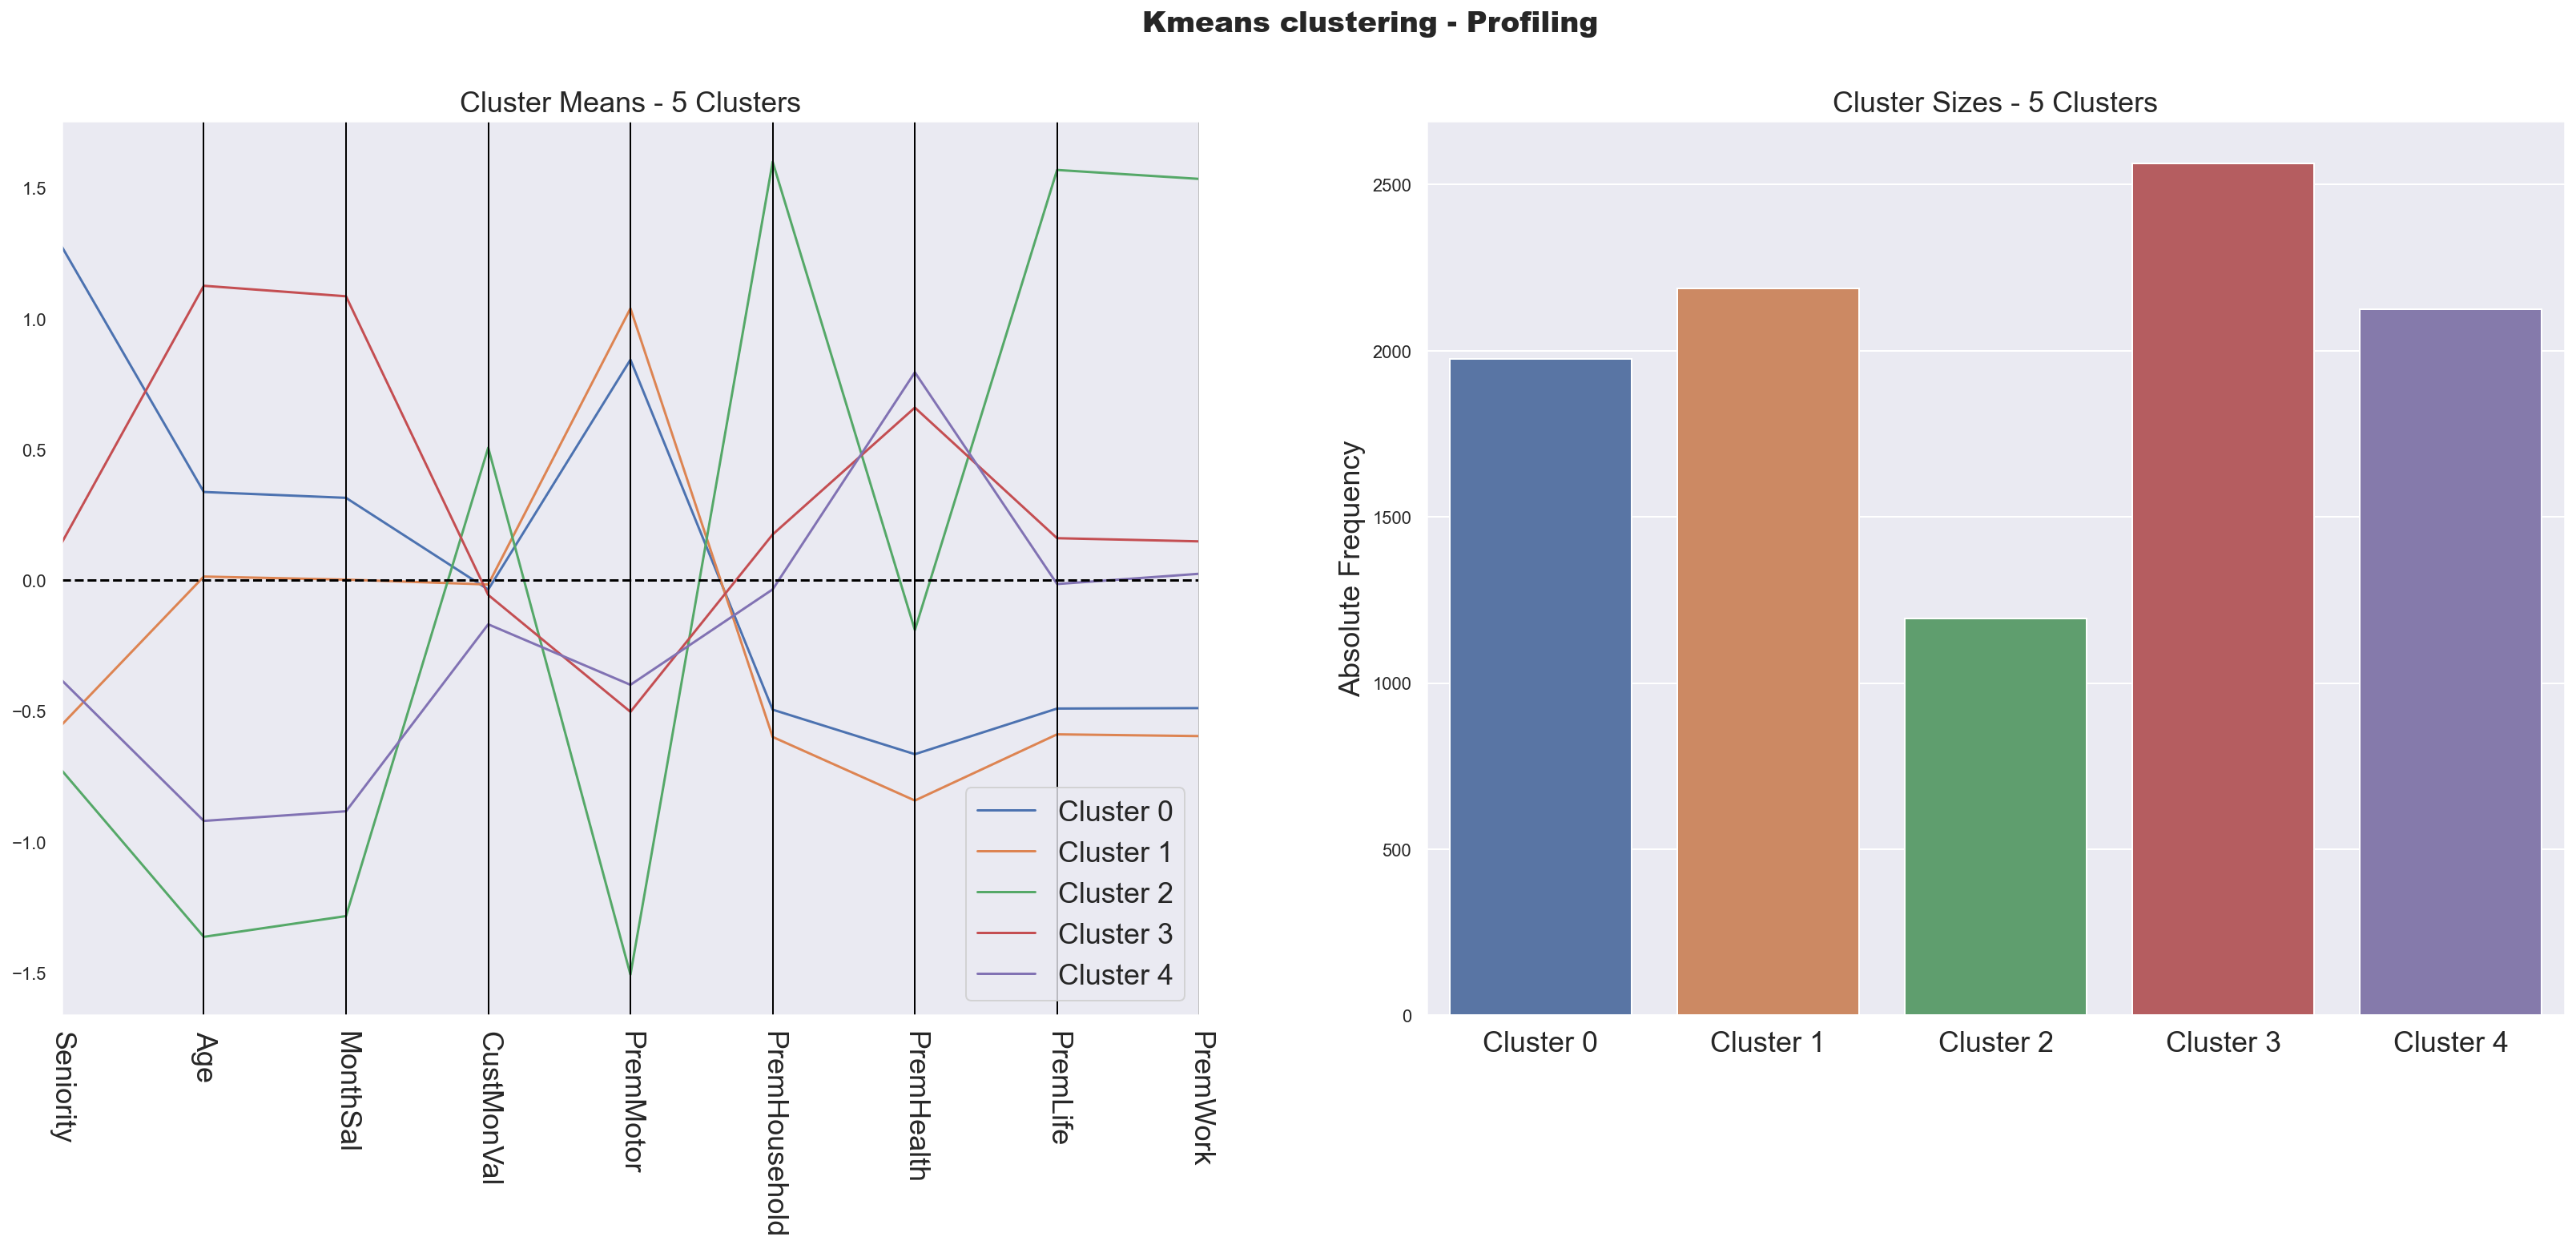

In [86]:
# Profilling cluster
cluster_profiles(df_cluster,
    label_columns = ['kmeans_cluster_labels'], 
    figsize = (28, 10), 
    compar_titles = ["Kmeans clustering - Profiling"]
)

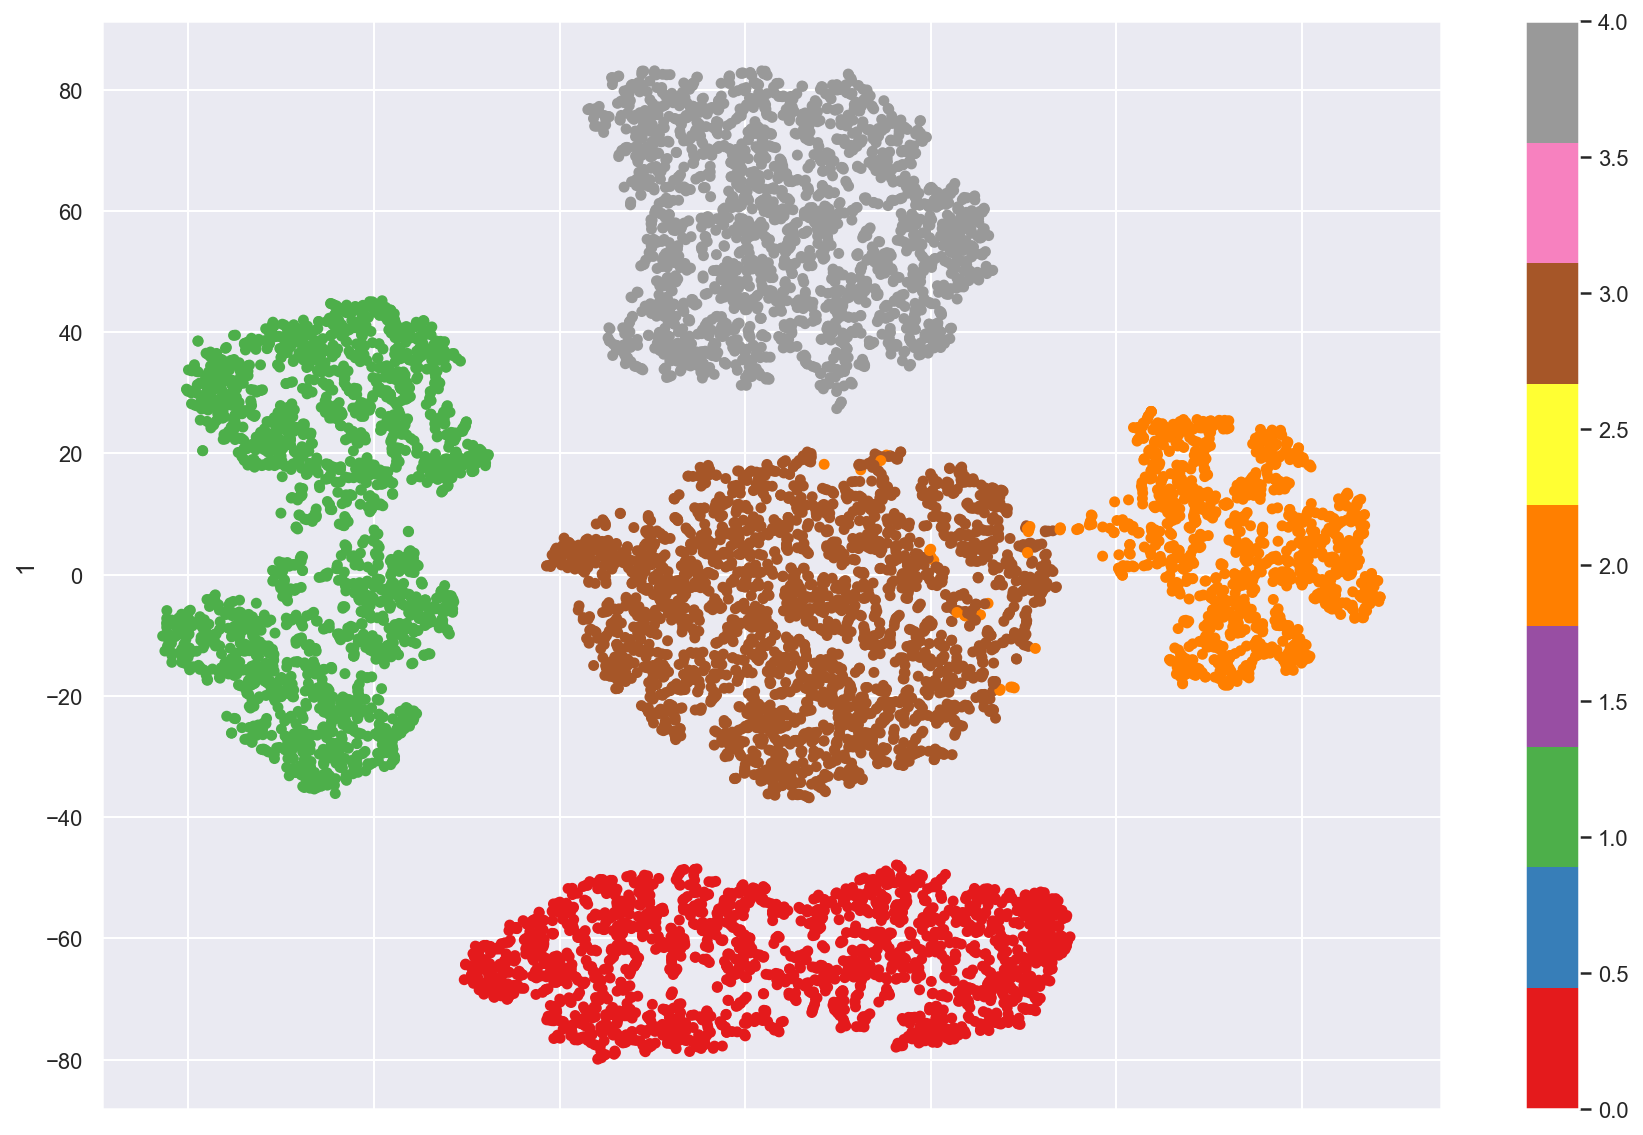

In [87]:
# Run the algorithm, fit and tranform the data
two_dim = TSNE(random_state=42).fit_transform( df_cluster)
#Plot the data
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c= df_cluster['kmeans_cluster_labels'], colormap='Set1', figsize=(15,10))
plt.show()

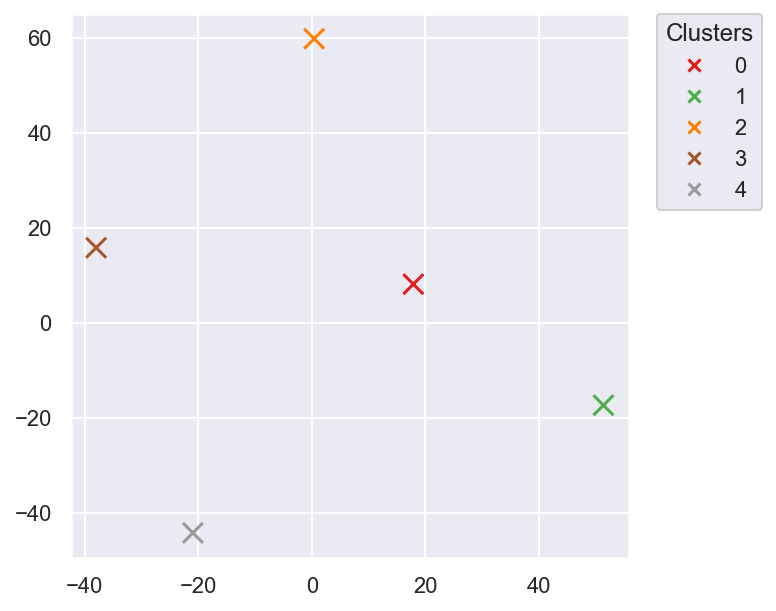

In [88]:
#Visualizing centroids with t-SNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=200)
#Run the algorithm, transform and fit the data
df_tsne = tsne.fit_transform( df_cluster)
#Create a data frame to store the results of tnse
df_tsne = pd.DataFrame(df_tsne, index =  df_cluster.index)\
            .merge(df_cluster['kmeans_cluster_labels'], right_index = True, left_index = True)
#Store the centroids
centroids = df_tsne.groupby('kmeans_cluster_labels').mean()
#Plot the data
fig, ax = plt.subplots(figsize = (5,5))
data = pd.DataFrame(centroids)
scatter = ax.scatter(x = data.iloc[:,0], y = data.iloc[:,1], c = range(5),marker = 'x', s = 100, cmap = 'Set1')
legend1 = ax.legend(*scatter.legend_elements(), title = 'Clusters', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.add_artist(legend1)
plt.show()

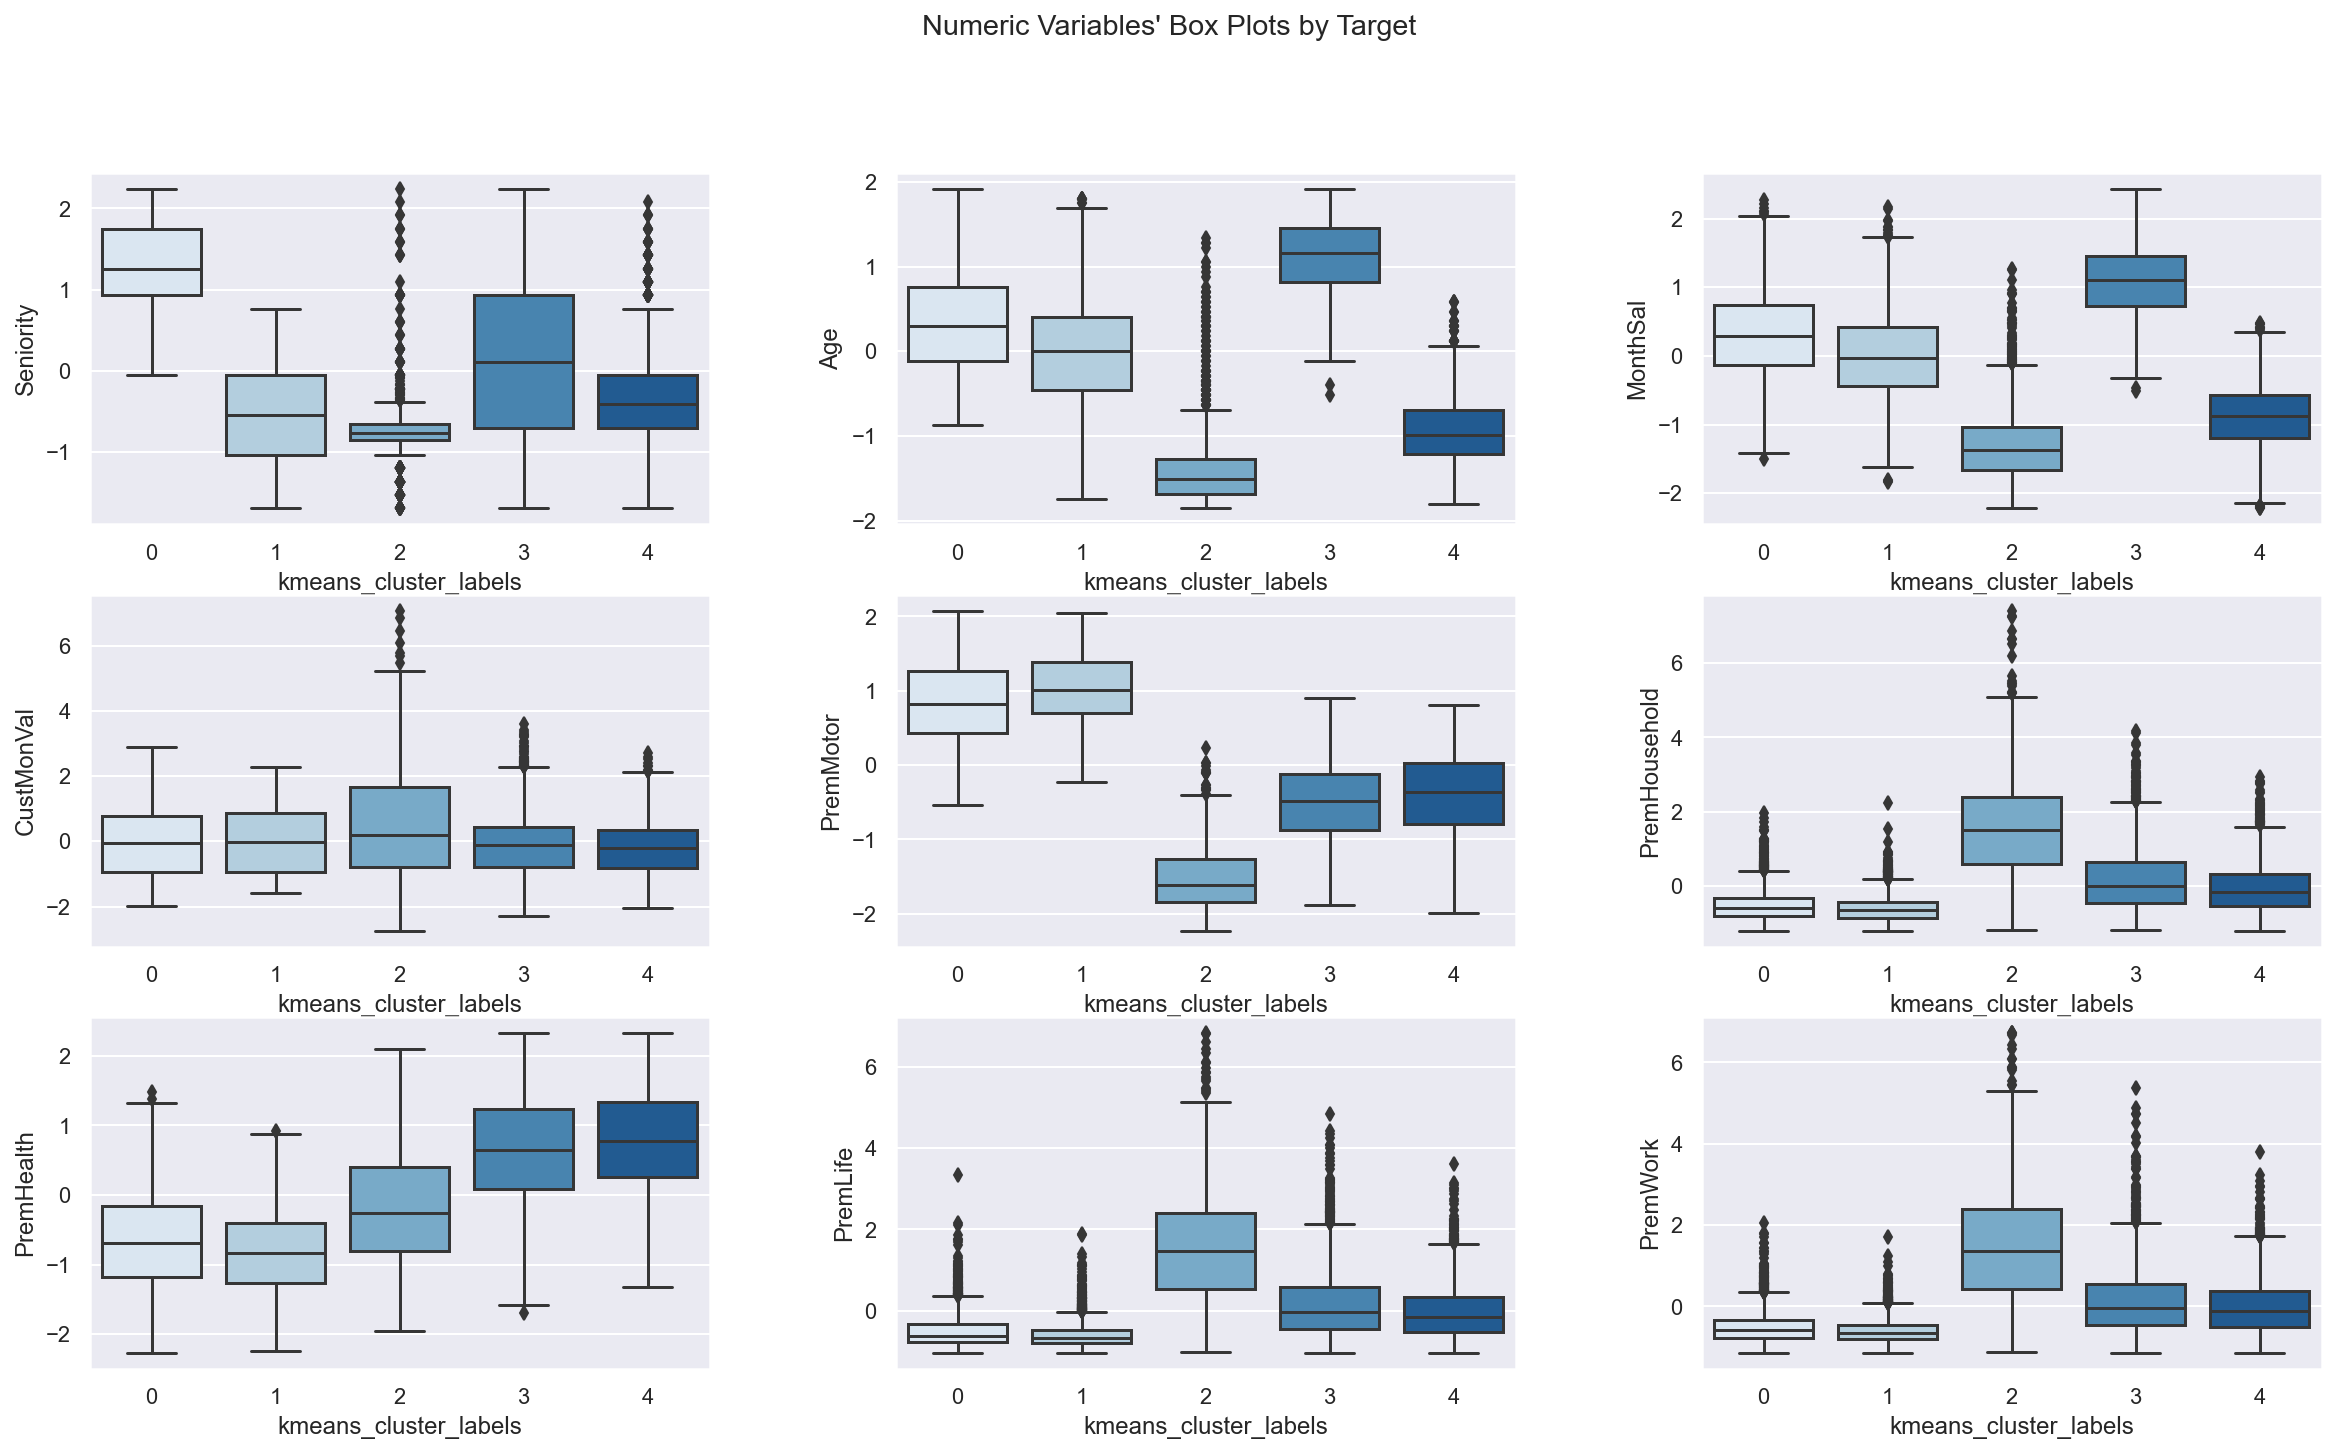

In [89]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df_cluster['kmeans_cluster_labels'], y=df_cluster[feat], ax=ax,palette="Blues")
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots by Target"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.3)


plt.show()

#### We also tried Hierarchical clustering whose outcome was reasonable, but as K means clustering has a higher R2, we decided for proceeding the analysis with the latter method. 

### Hierarquical Cluster

In [90]:
#Create a new data to run hierarquical cluster solution. Filtering the metric features. 
df_cluster_hier = df2[metric_features].copy()

In [91]:
#Funtion to get the R2s for the 4 different linkages of Hierarquical cluster
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        hclabels = cluster.fit_predict(df) #get cluster labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  # concat df with labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
        ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

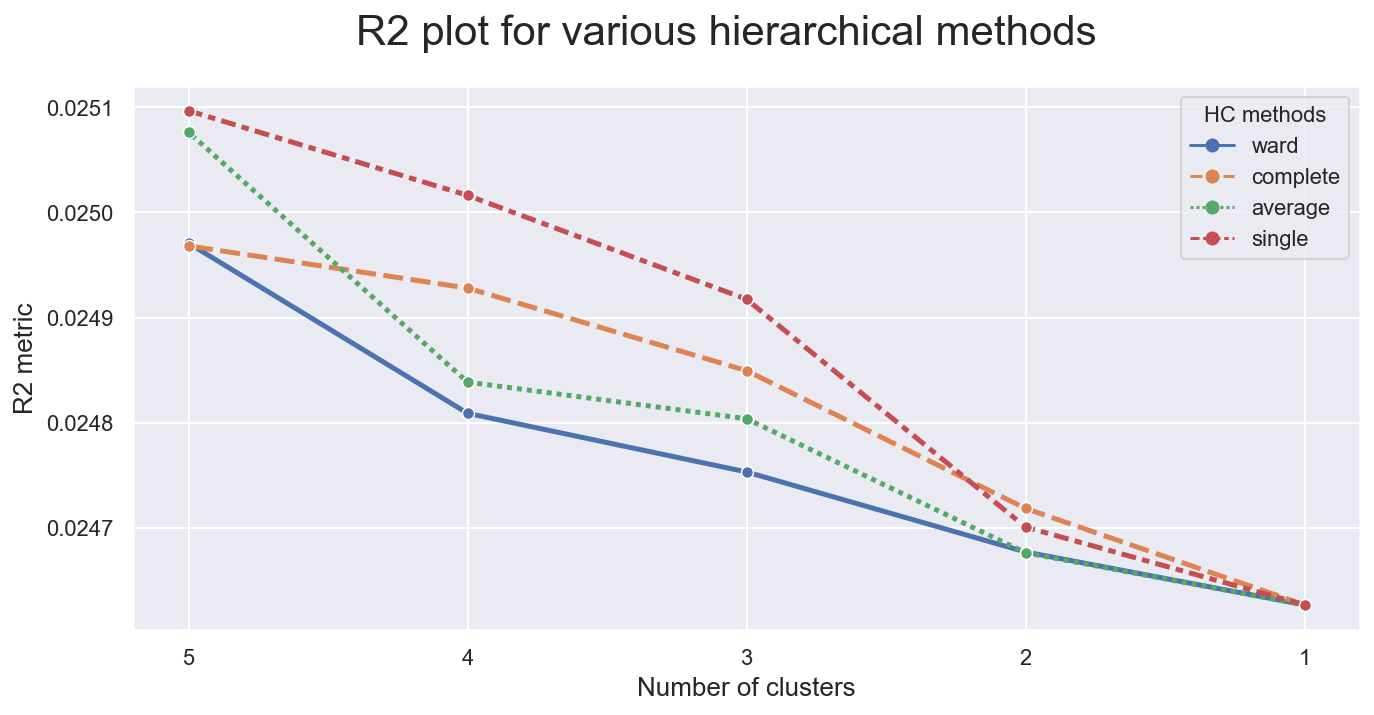

In [92]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 5
r2_hc_methods = np.vstack([get_r2_hc(df=df_cluster_hier, link_method=link, max_nclus=max_nclus) for link in hc_methods]).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

#### After looking to R2 plot, we decide to proceed with complete linkage.

In [93]:
#Functions to create the dendogram to decide the number of clusters
def full_tree(data, distance = 'euclidean', linkage = 'complete'):
    
    hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
    hclust.fit_predict(data)
    return hclust

def full_tree_visual(full_tree, thresh = 5, distance = 'euclidean', linkage = 'complete'):
    
    hclust = full_tree

    counts = np.zeros(hclust.children_.shape[0])
    n_samples = len(hclust.labels_)

    for i, merge in enumerate(hclust.children_):

        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:

                current_count += 1  
            else:

                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [hclust.children_, hclust.distances_, counts]
    ).astype(float)
#Plot the data
    sns.set()
    fig = plt.figure(figsize=(11,5))
    y_threshold = thresh
    dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
#Set the threshold
    plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
#Layout
    plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
    plt.xlabel('Number of points in node (or index of point if no parenthesis)')
    plt.ylabel(f'{distance.title()} Distance', fontsize=13)
    plt.show()

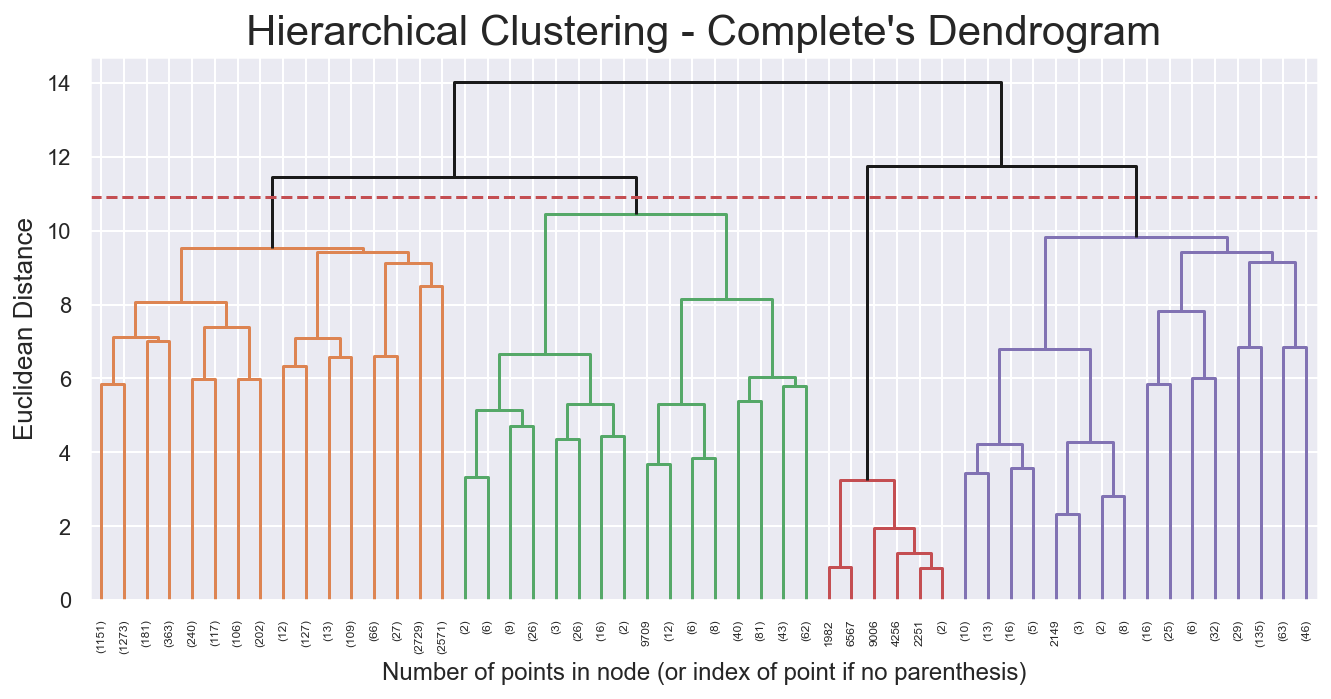

In [94]:
#We define the threshold as 11, after looking at the dendogram once. 
full_tree_mil = full_tree(df_cluster_hier, linkage='complete', distance = 'euclidean')
full_tree_visual(full_tree_mil, thresh= 10.9)

In [95]:
# Looking to the dendogram we concluded the best number of clusters is 4
#hc cluster solution
linkage = 'complete'
distance = 'euclidean'
hclust_complete = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=4)
hclust_complete_labels = hclust_complete.fit_predict(df_cluster_hier)

In [96]:
#Check the partion cluster
df_cluster_hier['hclust_complete_labels']=hclust_complete_labels
df_cluster_hier.groupby('hclust_complete_labels').count()

,Seniority,Age,MonthSal,CustMonVal,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
hclust_complete_labels,,,,,,,,,
0,343,343,343,343,343,343,343,343,343
1,410,410,410,410,410,410,410,410,410
2,7,7,7,7,7,7,7,7,7
3,9287,9287,9287,9287,9287,9287,9287,9287,9287


In [97]:
#Get the R2 for Hierarquical cluster
adjusted_r2(df_cluster_hier,hclust_complete_labels)

0.2149056051700171

### Decision tree classifier to evaluate the results

In [98]:
# Preparing the data
X = df_cluster.drop(columns=['kmeans_cluster_labels'])
y = df_cluster.kmeans_cluster_labels


In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10047 entries, 1.0 to 10296.0
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Seniority      10047 non-null  float64
 1   Age            10047 non-null  float64
 2   MonthSal       10047 non-null  float64
 3   CustMonVal     10047 non-null  float64
 4   PremMotor      10047 non-null  float64
 5   PremHousehold  10047 non-null  float64
 6   PremHealth     10047 non-null  float64
 7   PremLife       10047 non-null  float64
 8   PremWork       10047 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [100]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the decision tree
dt = DecisionTreeClassifier(random_state=42, max_depth = 12,criterion='entropy')
dt.fit(X_train, y_train)
print("It is estimated that in average, we are able to predict {0:.2f}% of the customers correctly".format(dt.score(X_test, y_test)*100))

It is estimated that in average, we are able to predict 93.38% of the customers correctly


In [101]:
# Assessing feature importance
fi_col = []
fi = []
for i,column in enumerate(X):
    print('The feature importance for {} is : {}'.format(column,dt.feature_importances_[i]))
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

The feature importance for Seniority is : 0.18483411733661725
The feature importance for Age is : 0.2666985952374076
The feature importance for MonthSal is : 0.046394345545838725
The feature importance for CustMonVal is : 0.013752070254006293
The feature importance for PremMotor is : 0.40652768626008495
The feature importance for PremHousehold is : 0.005702835202759776
The feature importance for PremHealth is : 0.06233298659352334
The feature importance for PremLife is : 0.008524063490963414
The feature importance for PremWork is : 0.005233300078798696


In [102]:
#Create a dataframe to the feature importance, putting the feature in order from the highest importance to the lowest. 
df_fi = zip(fi_col,fi)
df_fi = pd.DataFrame(df_fi,columns = ['Features','Features Importance'])
df_fi = df_fi.sort_values('Features Importance',ascending= False).reset_index().drop('index',axis=1)
df_fi

,Features,Features Importance
0,PremMotor,0.406528
1,Age,0.266699
2,Seniority,0.184834
3,PremHealth,0.062333
4,MonthSal,0.046394
5,CustMonVal,0.013752
6,PremLife,0.008524
7,PremHousehold,0.005703
8,PremWork,0.005233


<AxesSubplot:xlabel='Features Importance', ylabel='Features'>

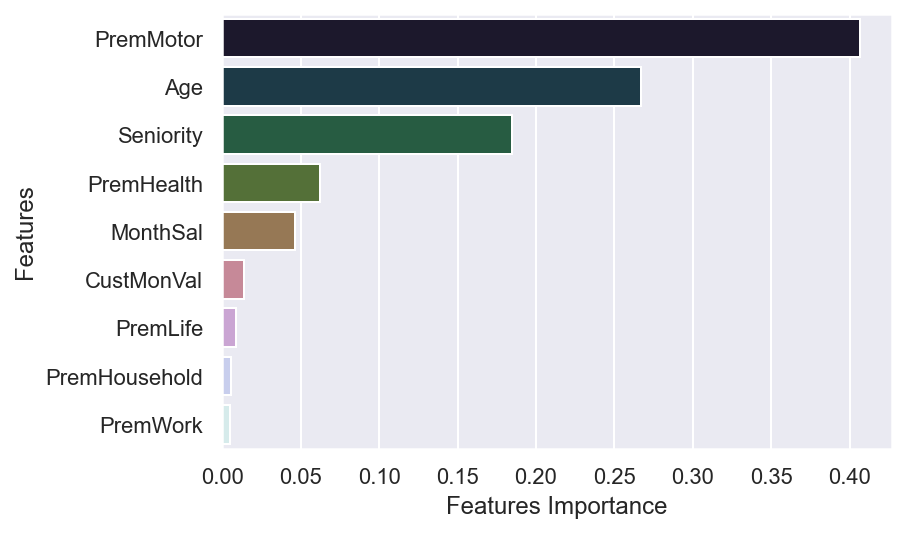

In [103]:
#Graphic to show the features with high importance
df_fi_10 = df_fi[0:15]
sns.barplot(df_fi_10['Features Importance'], df_fi_10['Features'], palette = 'cubehelix', orient = 'h')

### We use DT to set the cluster for the outliers.

In [104]:
#Check outliers data set
df2_iqr_out.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 216 entries, 39.0 to 10264.0
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Seniority      216 non-null    float64
 1   Age            216 non-null    float64
 2   MonthSal       216 non-null    float64
 3   CustMonVal     216 non-null    float64
 4   PremMotor      216 non-null    float64
 5   PremHousehold  216 non-null    float64
 6   PremHealth     216 non-null    float64
 7   PremLife       215 non-null    float64
 8   PremWork       214 non-null    float64
dtypes: float64(9)
memory usage: 16.9 KB


In [105]:
#Check outliers data set
df2_out.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 21 entries, 52.0 to 9649.0
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Seniority      21 non-null     float64
 1   Age            21 non-null     float64
 2   MonthSal       21 non-null     float64
 3   CustMonVal     21 non-null     float64
 4   PremMotor      21 non-null     float64
 5   PremHousehold  21 non-null     float64
 6   PremHealth     21 non-null     float64
 7   PremLife       21 non-null     float64
 8   PremWork       21 non-null     float64
dtypes: float64(9)
memory usage: 1.6 KB


In [106]:
#Combining both datasets
df1_out_final = df2_iqr_out.append(df2_out)

In [107]:
#Checking data
df1_out_final.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 237 entries, 39.0 to 9649.0
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Seniority      237 non-null    float64
 1   Age            237 non-null    float64
 2   MonthSal       237 non-null    float64
 3   CustMonVal     237 non-null    float64
 4   PremMotor      237 non-null    float64
 5   PremHousehold  237 non-null    float64
 6   PremHealth     237 non-null    float64
 7   PremLife       236 non-null    float64
 8   PremWork       235 non-null    float64
dtypes: float64(9)
memory usage: 18.5 KB


In [108]:
#Replace the missing values with the mean
df1_out_final.PremLife = df1_out_final.PremLife.fillna(df1_out_final.PremLife.mean())
df1_out_final.PremWork = df1_out_final.PremWork.fillna(df1_out_final.PremWork.mean())

In [109]:
#Normalize the dataset
#Standardize nummerical variables
# Create a StandardScaler
sds = StandardScaler()
# Fit and Transform data by applying the scale obtained in the previous command
scaled_feat = sds.fit_transform(df1_out_final[metric_features])
#Applying the transformation in the dataset
df1_out_final[metric_features]= scaled_feat
#Check the results
df1_out_final.head()

,Seniority,Age,MonthSal,CustMonVal,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,
39.0,0.065385,0.348840,0.248932,0.126373,-0.193421,-0.114629,-0.063223,0.395886,-0.102909
106.0,0.065087,-0.377057,-0.220968,0.127293,-0.207220,-0.149594,-0.035832,-0.484228,-0.102175
133.0,0.062704,-0.284389,-0.363420,0.122160,-0.133763,-0.097941,-0.068394,-0.431605,-0.233445
146.0,0.065980,-0.346168,-0.093096,0.119865,-0.155759,-0.203500,-0.050033,0.243807,-0.286100
307.0,0.062108,-0.423391,-0.315378,0.133951,-0.194457,-0.146707,-0.065720,0.422198,-0.137011


In [110]:
#Check the statistics summary
df1_out_final.describe().apply(lambda s: s.apply(lambda x:format(x,'g')))

,Seniority,Age,MonthSal,CustMonVal,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
count,237,237,237,237,237,237,237,237,237
mean,1.3058e-17,-5.80876e-17,-5.96101e-17,-6.3709e-17,2.05642e-17,-3.73588e-17,2.52962e-17,-2.54836e-16,-1.27886e-16
std,1.00212,1.00212,1.00212,1.00212,1.00212,1.00212,1.00212,1.00212,1.00212
min,-15.3623,-0.546948,-0.613667,-13.039,-0.274973,-0.225963,-0.255329,-1.15675,-0.444799
25%,0.0632997,-0.392501,-0.360552,0.126462,-0.193524,-0.148641,-0.077248,-0.659724,-0.265345
50%,0.0650868,-0.191722,-0.140899,0.137465,-0.155862,-0.112059,-0.0720188,-0.221114,-0.147422
75%,0.0668738,0.287061,0.198978,0.146985,-0.121831,-0.0523792,-0.0615016,0.293535,-0.0168855
max,0.0686608,14.4498,12.4936,1.07127,10.5436,14.2675,14.8623,9.48093,12.9005


In [111]:
#Predict the clusters for the outliers
df1_out_final['kmeans_cluster_labels'] = dt.predict(df1_out_final)
df1_out_final.groupby('kmeans_cluster_labels').count()

,Seniority,Age,MonthSal,CustMonVal,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
kmeans_cluster_labels,,,,,,,,,
1,8,8,8,8,8,8,8,8,8
3,101,101,101,101,101,101,101,101,101
4,128,128,128,128,128,128,128,128,128


In [112]:
#Merging the datasets (Non-outliers and Outliers) 
df_final = df_cluster.append(df1_out_final)

In [113]:
df_final.groupby('kmeans_cluster_labels').count()

,Seniority,Age,MonthSal,CustMonVal,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
kmeans_cluster_labels,,,,,,,,,
0,1976,1976,1976,1976,1976,1976,1976,1976,1976
1,2195,2195,2195,2195,2195,2195,2195,2195,2195
2,1195,1195,1195,1195,1195,1195,1195,1195,1195
3,2664,2664,2664,2664,2664,2664,2664,2664,2664
4,2254,2254,2254,2254,2254,2254,2254,2254,2254


In [114]:
#Visualize dataset
df_final

,Seniority,Age,MonthSal,CustMonVal,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,kmeans_cluster_labels
CustID,,,,,,,,,,
1.0,0.438805,-0.808231,-0.329558,0.621716,0.548610,-0.538986,-0.258656,0.113987,-0.513698,1
2.0,-0.823198,-1.562515,-1.868402,-1.350610,-1.629389,0.886022,-0.682190,3.228305,1.408072,2
3.0,-0.545139,-0.111970,-0.226969,1.098140,-0.690059,0.074815,-0.569562,0.944782,1.254959,2
4.0,-0.381148,-0.750209,-1.435474,-0.911006,-0.862830,-0.691749,2.093979,-0.132463,-0.267124,4
5.0,0.274814,-0.286035,-0.754279,-0.709883,0.276862,-0.672918,0.258521,-0.482183,0.015198,4
...,...,...,...,...,...,...,...,...,...,...
6344.0,0.066576,0.225283,-0.072063,0.127565,0.105496,2.188210,-0.190739,-0.586579,-0.094767,3
6836.0,0.068363,-0.037276,-0.026650,0.125040,0.209043,4.863046,-0.232214,-1.156746,-0.306121,4
8426.0,0.068065,-0.500614,-0.601477,0.122628,-0.274973,1.087029,-0.234177,-0.042724,0.081017,4


In [115]:
#Check results
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 10284 entries, 1.0 to 9649.0
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Seniority              10284 non-null  float64
 1   Age                    10284 non-null  float64
 2   MonthSal               10284 non-null  float64
 3   CustMonVal             10284 non-null  float64
 4   PremMotor              10284 non-null  float64
 5   PremHousehold          10284 non-null  float64
 6   PremHealth             10284 non-null  float64
 7   PremLife               10284 non-null  float64
 8   PremWork               10284 non-null  float64
 9   kmeans_cluster_labels  10284 non-null  int32  
dtypes: float64(9), int32(1)
memory usage: 843.6 KB


In [116]:
#Export the final data to import it in our application developed to make a cluster analysis
df_final.to_csv(os.path.join("insurance_final.csv"), index=False)